In [1]:
import pandas as pd
# installing libraries
!pip install pywaffle
!pip install geopandas

In [74]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywaffle as pyw
import geopandas as gpd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from pandas import DataFrame, Series
from pylab import rcParams

In [48]:
df = pd.read_csv('Dellliote- Customer survey.csv')
df.head()

record - Record number  Q1r1 - To begin, what is your age?  \
0                     4.0                                36.0   
1                     6.0                                26.0   
2                     9.0                                32.0   
3                    11.0                                25.0   
4                     3.0                                28.0   

  Q4 - What is your gender? age - you are...  \
0                      Male            34-50   
1                    Female            20-26   
2                    Female            27-33   
3                    Female            20-26   
4                      Male            27-33   

  Q2 - In which state do you currently reside? region - Region  \
0                                      Georgia           South   
1                                     New York       Northeast   
2                                   New Jersey       Northeast   
3                                   California            West   
4                                      Indiana         Midwest   

  QNEW3 - What is your employment status?  \
0         Employed full-time or part-time   
1         Employed full-time or part-time   
2         Employed full-time or part-time   
3         Employed full-time or part-time   
4                                 Student   

  Q5 - Which category best describes your ethnicity?  \
0                  White or Caucasian (Non-Hispanic)   
1                  White or Caucasian (Non-Hispanic)   
2                  White or Caucasian (Non-Hispanic)   
3                  White or Caucasian (Non-Hispanic)   
4                  White or Caucasian (Non-Hispanic)   

  QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?  \
0                                                Yes                                           
1                                                Yes                                           
2                                                Yes                                           
3                                                Yes                                           
4                                                Yes                                           

  QNEW2 - How old are the children in your home?-0-4 years  ...  \
0                                                 No        ...   
1                                                Yes        ...   
2                                                Yes        ...   
3                                                Yes        ...   
4                                                Yes        ...   

  Q39rNEW1 - I would rather pay for sports information online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, c  \
0                                     Agree strongly                                                                                                                                                                                                                 
1                                     Agree somewhat                                                                                                                                                                                                                 
2                                     Agree somewhat                                                                                                                                                                                                                 
3                                     Agree strongly                                                                                                                                                                                                                 
4                           

In [49]:
internet_df = df[df['Q26 - Which of the following subscriptions does your household purchase?-Home internet']=='Yes']
internet_df

record - Record number  Q1r1 - To begin, what is your age?  \
1                        6.0                                26.0   
3                       11.0                                25.0   
4                        3.0                                28.0   
9                       13.0                                16.0   
10                       5.0                                32.0   
...                      ...                                 ...   
2126                  3584.0                                14.0   
2127                  3591.0                                70.0   
2128                  3620.0                                18.0   
2129                  3610.0                                79.0   
2130                  3673.0                                77.0   

     Q4 - What is your gender? age - you are...  \
1                       Female            20-26   
3                       Female            20-26   
4                         Male            27-33   
9                       Female            14-19   
10                      Female            27-33   
...                        ...              ...   
2126                      Male            14-19   
2127                      Male      70 or older   
2128                      Male            14-19   
2129                    Female      70 or older   
2130                    Female      70 or older   

     Q2 - In which state do you currently reside? region - Region  \
1                                        New York       Northeast   
3                                      California            West   
4                                         Indiana         Midwest   
9                                     Connecticut       Northeast   
10                                       New York       Northeast   
...                                           ...             ...   
2126                                       Oregon            West   
2127                                Massachusetts       Northeast   
2128                                      Alabama           South   
2129                                     Illinois         Midwest   
2130                                 Pennsylvania       Northeast   

     QNEW3 - What is your employment status?  \
1            Employed full-time or part-time   
3            Employed full-time or part-time   
4                                    Student   
9                                    Student   
10           Employed full-time or part-time   
...                                      ...   
2126                              Unemployed   
2127                                 Retired   
2128                              Unemployed   
2129                                 Retired   
2130                                 Retired   

     Q5 - Which category best describes your ethnicity?  \
1                     White or Caucasian (Non-Hispanic)   
3                     White or Caucasian (Non-Hispanic)   
4                     White or Caucasian (Non-Hispanic)   
9                     White or Caucasian (Non-Hispanic)   
10                    White or Caucasian (Non-Hispanic)   
...                                                 ...   
2126                  White or Caucasian (Non-Hispanic)   
2127                  White or Caucasian (Non-Hispanic)   
2128                  White or Caucasian (Non-Hispanic)   
2129                  White or Caucasian (Non-Hispanic)   
2130                                        Multiracial   

     QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?  \
1                                                   Yes                                           
3                                                   Yes                                           
4                                                   Yes                                           
9                                                   Yes          

# WE WANT TO FOCUS ON DEMOGRAPHIC DATA FOR NOW
We want to slice the the dataframe to it only contains the demographic data. We see that it is from first column excluding (record number) to column 16. 

In [76]:
demo_df = internet_df.iloc[:,1:17]

In [77]:
demo_df

Q1r1 - To begin, what is your age? Q4 - What is your gender?  \
1                                   26.0                    Female   
3                                   25.0                    Female   
4                                   28.0                      Male   
9                                   16.0                    Female   
10                                  32.0                    Female   
...                                  ...                       ...   
2126                                14.0                      Male   
2127                                70.0                      Male   
2128                                18.0                      Male   
2129                                79.0                    Female   
2130                                77.0                    Female   

     age - you are... Q2 - In which state do you currently reside?  \
1               20-26                                     New York   
3               20-26                                   California   
4               27-33                                      Indiana   
9               14-19                                  Connecticut   
10              27-33                                     New York   
...               ...                                          ...   
2126            14-19                                       Oregon   
2127      70 or older                                Massachusetts   
2128            14-19                                      Alabama   
2129      70 or older                                     Illinois   
2130      70 or older                                 Pennsylvania   

     region - Region QNEW3 - What is your employment status?  \
1          Northeast         Employed full-time or part-time   
3               West         Employed full-time or part-time   
4            Midwest                                 Student   
9          Northeast                                 Student   
10         Northeast         Employed full-time or part-time   
...              ...                                     ...   
2126            West                              Unemployed   
2127       Northeast                                 Retired   
2128           South                              Unemployed   
2129         Midwest                                 Retired   
2130       Northeast                                 Retired   

     Q5 - Which category best describes your ethnicity?  \
1                     White or Caucasian (Non-Hispanic)   
3                     White or Caucasian (Non-Hispanic)   
4                     White or Caucasian (Non-Hispanic)   
9                     White or Caucasian (Non-Hispanic)   
10                    White or Caucasian (Non-Hispanic)   
...                                                 ...   
2126                  White or Caucasian (Non-Hispanic)   
2127                  White or Caucasian (Non-Hispanic)   
2128                  White or Caucasian (Non-Hispanic)   
2129                  White or Caucasian (Non-Hispanic)   
2130                                        Multiracial   

     QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?  \
1                                                   Yes                                           
3                                                   Yes                                           
4                                                   Yes                                           
9                                                   Yes                                           
10                                                  Yes                                           
...                                                 ...                                           
2126                                                Yes                                           
2127                                                 N

# AGE DISTRIBUTION

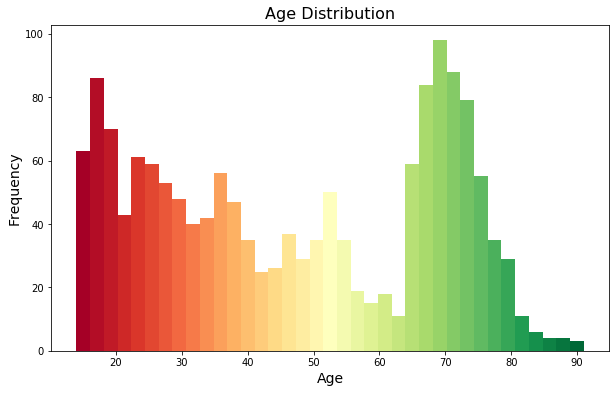

In [54]:
# plot histogram of age distribution
plt.figure(figsize=(10,6))

# color map
cm = plt.cm.get_cmap('RdYlGn')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age Distribution', fontsize=16)

n, bins, patches = plt.hist(demo_df['Q1r1 - To begin, what is your age?'].astype(float), 37, color='green')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
plt.show()

# GENDER DISTRIBUTION

In [55]:
# get gender count
counts = demo_df['Q4 - What is your gender?'].value_counts()
gender_df = pd.DataFrame(counts)
gender_df['percent'] = (gender_df['Q4 - What is your gender?'] /gender_df['Q4 - What is your gender?'].sum()) * 100

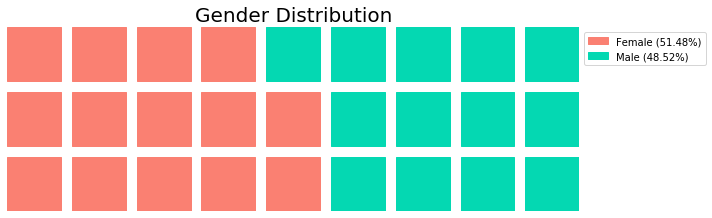

In [68]:
# plot waffle chart of gender distribution
fig = plt.figure(
    FigureClass=pyw.Waffle, 
    rows=3, 
    columns = 9,
    values=gender_df['percent'], 
    colors=("#FA8072", "#04D8B2"),
    title={'label': 'Gender Distribution', 'loc': 'center','size':20},
    labels=[f"{k} ({'{:.2f}'.format(v)}%)" for k, v in zip(gender_df.index, gender_df.percent)],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icon_size=45,
    icon_legend=True,
    figsize=(10, 8))

plt.show()

# REGION

In [70]:
# get region count
counts = demo_df['region - Region'].value_counts()
region_df = pd.DataFrame(counts)
region_df['percent'] = (region_df['region - Region'] /region_df['region - Region'].sum())

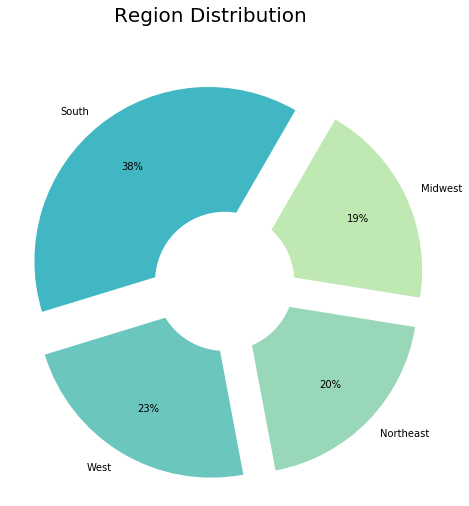

In [71]:
# plot distribution
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Region Distribution', size = 20, color = 'black')
explode = (0.15, 0.15, 0.15, 0.15)
labels = ['South', 'West', 'Northeast', 'Midwest']
sizes = region_df['percent']
colors = ['#41B7C4', '#6BC6BE', '#98D7B7', '#BFE8B2']
ax.pie(sizes, explode=explode, startangle=60,colors = colors, labels=labels,autopct='%1.0f%%', pctdistance=0.7)
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
# adjust the data label size
plt.rcParams['font.size'] = 15
plt.show()

# EMPLOYMENT STATUS

In [73]:
# get employment status count
counts = demo_df['QNEW3 - What is your employment status?'].value_counts()
status_df = pd.DataFrame(counts)
status_df['percent'] = (status_df['QNEW3 - What is your employment status?'] /status_df['QNEW3 - What is your employment status?'].sum()) * 100
status_df['percent']

Employed full-time or part-time    39.666239
Retired                            32.220796
Student                            11.617458
Unemployed                          9.948652
Self-employed                       6.546855
Name: percent, dtype: float64

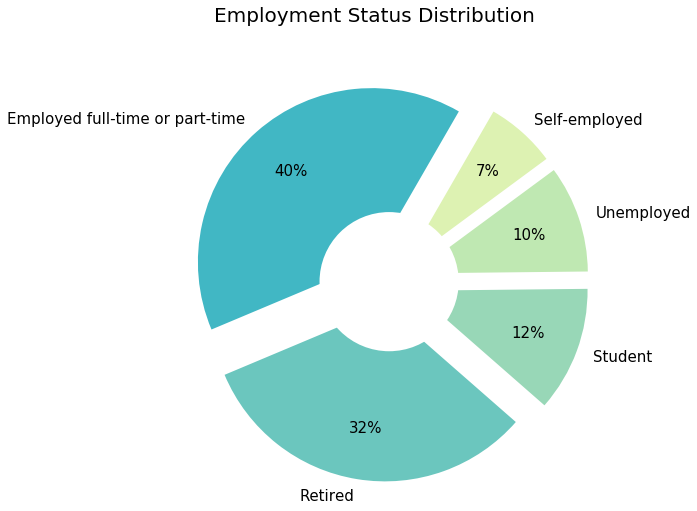

In [75]:
# plot distribution
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Employment Status Distribution', size = 20, color = 'black')
explode = (0.15, 0.15, 0.15, 0.15, 0.15)
labels = ['Employed full-time or part-time', 'Retired', 'Student','Unemployed','Self-employed']
sizes = status_df['percent']
colors = ['#41B7C4', '#6BC6BE', '#98D7B7', '#BFE8B2','#DDF2B2']
ax.pie(sizes, explode=explode, startangle=60,colors = colors, labels=labels,autopct='%1.0f%%', pctdistance=0.7)
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
# Adjust the data label size
plt.rcParams['font.size'] = 15
plt.show()

# ANNUAL HOUSEHOLD INCOME

In [80]:
# get income count 
counts = demo_df['Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.'].value_counts()
income_df = pd.DataFrame(counts)
income_df['percent'] = (income_df['Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.'] /income_df['Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.'].sum()) * 100
income_df['percent']

$50,000 to $99,999      36.649551
$30,000 to $49,999      20.860077
Less than $29,999       19.576380
$100,000 to $299,999    16.559692
Do not know              5.327343
More than $300,000       1.026958
Name: percent, dtype: float64

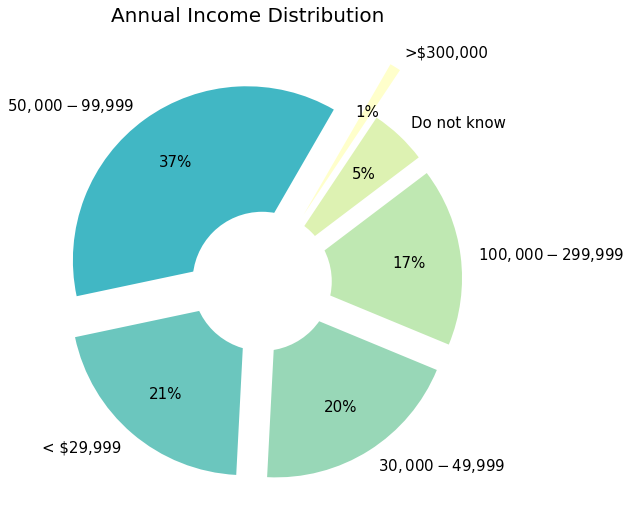

In [81]:
# plot distribution
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Annual Income Distribution', size = 20, color = 'black')
explode = (0.15, 0.15, 0.15, 0.15, 0.15, 0.45)
labels = ['$50,000 - $99,999', '< $29,999', '$30,000 - $49,999','$100,000 - $299,999','Do not know','>$300,000']
sizes = income_df['percent']
colors = ['#41B7C4', '#6BC6BE', '#98D7B7', '#BFE8B2','#DDF2B2','#FFFFCB']
ax.pie(sizes, explode=explode, startangle=60,colors = colors, labels=labels,autopct='%1.0f%%', pctdistance=0.7)
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
# adjust the data label size
plt.rcParams['font.size'] = 15
plt.show()

# ETHNICITY

In [82]:
# get ethnicity count 
counts = demo_df['Q5 - Which category best describes your ethnicity?'].value_counts()
eth_df = pd.DataFrame(counts)
eth_df['percent'] = (eth_df['Q5 - Which category best describes your ethnicity?'] /eth_df['Q5 - Which category best describes your ethnicity?'].sum()) * 100
eth_df['percent']

White or Caucasian (Non-Hispanic)                                                   70.860077
African American                                                                    12.066752
Hispanic                                                                             9.820282
Multiracial                                                                          2.053915
East Asian or Southeast Asian                                                        1.925546
Caribbean                                                                            0.962773
Something else not listed here                                                       0.898588
South Asian (India, Pakistan, Sri Lanka)                                             0.641849
Pacific Islander (including Native Hawaiian, Native American, or Native Alaskan)     0.513479
Middle Eastern                                                                       0.256739
Name: percent, dtype: float64

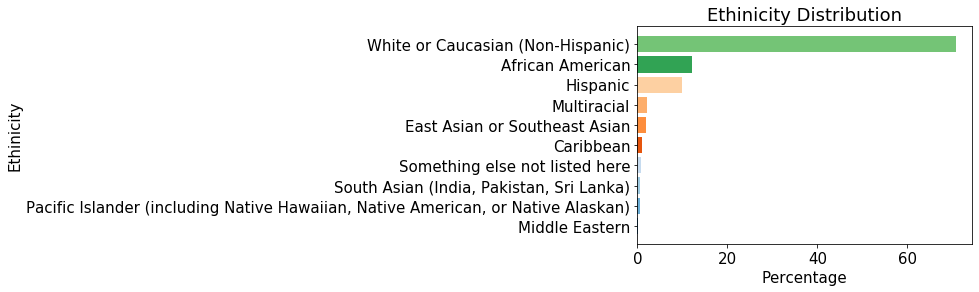

In [83]:
# sort the dataframe 
eth_df.sort_values(by='percent', ascending=True, inplace=True)

# create a color palette
palette = sns.color_palette("tab20c", len(eth_df['percent']))

# create a horizontal bar plot
plt.barh(eth_df.index, eth_df['percent'], color=palette)

# add labels and title
plt.title('Ethinicity Distribution')
plt.xlabel('Percentage')
plt.ylabel('Ethinicity')
plt.show()

# HANDLE MISSING VALUES
We want to remove columns that have more than 60% of null values and irrelevant columns.

In [84]:
internet_df = internet_df.replace("#NULL!", np.nan)

In [90]:
missing_count = internet_df.isna().sum()
missing_df = (pd.concat([missing_count.rename('Missing count'),
                     missing_count.div(len(internet_df))
                          .rename('Missing ratio')],axis = 1)
             .loc[missing_count.ne(0)])

#color the background of cells in a dataframe depending on the value of the data in each column 
missing_df.style.background_gradient(cmap="cool")

In [91]:
#Dropping the columns
internet_df = internet_df.drop(missing_df[missing_df['Missing ratio'] > 0.60].index, axis=1)

In [92]:
internet_df = internet_df.drop('record - Record number', axis=1)
internet_df = internet_df.drop('FINAL WEIGHTS', axis=1)

In [93]:
missing_count1 = internet_df.isna().sum()
missing_df1 = (pd.concat([missing_count1.rename('Missing count'),
                     missing_count1.div(len(internet_df))
                          .rename('Missing ratio')],axis = 1)
             .loc[missing_count1.ne(0)])

#color the background of cells in a dataframe depending on the value of the data in each column 
missing_df1.style.background_gradient(cmap="cool")

For the rest columns, we will clean the data based on the background information of each question group that current column belongs to.

For question 11, now we only have options of "smartphone" and "laptop". We will replace None value with 4 since those are the people who do not think that "smartphone" and "laptop" are their first three choices.

In [94]:
internet_df.iloc[:, 51:53] = internet_df.iloc[:,51:53].fillna(value=4)

For question 22, we have 412 missing values, which indicates that 412 people do not have smart phone. Then we will replace the None value with string "No Smart Phone".

In [96]:
internet_df.iloc[:, 65:102] = internet_df.iloc[:, 65:102].fillna(value=-999)

For question 36, now we only have options of "Pay TV" and "Home Internet". We will replace None value with 4 since those are the people who do not think that "Pay TV" and "Home Internet" are their first three choices.

In [97]:
internet_df.iloc[:, 114:116] = internet_df.iloc[:,114:116].fillna(value=4)

For question 37, now we only have options of "Watching television (video content on any device)" and "Using the Internet for social or personal interests". We will replace None value with 4 since those are the people who do not think that "Watching television (video content on any device" and "Using the Internet for social or personal interests" are their first three choices.

In [98]:
internet_df.iloc[:, 117:119] = internet_df.iloc[:,117:119].fillna(value=4)

# Summary Statistics, Univariate Analysis, Bivariate Analysis

We divided the data into 2 groups: Data with only numeric values and data with only categorical values

In [99]:
df_num_age = pd.DataFrame(internet_df.iloc[:, 0])
df_num_age

Q1r1 - To begin, what is your age?
1                                   26.0
3                                   25.0
4                                   28.0
9                                   16.0
10                                  32.0
...                                  ...
2126                                14.0
2127                                70.0
2128                                18.0
2129                                79.0
2130                                77.0

[1558 rows x 1 columns]

In [100]:
df_num_time = internet_df.iloc[:, 53:65]
df_num_time

Q15r1 - Smartphone - Of the time you spend watching movies, what percentage of time do you watch on the following devices?  \
1                                                  40.0                                                                            
3                                                  10.0                                                                            
4                                                  10.0                                                                            
9                                                   5.0                                                                            
10                                                 30.0                                                                            
...                                                 ...                                                                            
2126                                                0.0                                                                            
2127                                                0.0                                                                            
2128                                                0.0                                                                            
2129                                                0.0                                                                            
2130                                                0.0                                                                            

      Q15r2 - Tablet - Of the time you spend watching movies, what percentage of time do you watch on the following devices?  \
1                                                  30.0                                                                        
3                                                  25.0                                                                        
4                                                   0.0                                                                        
9                                                  80.0                                                                        
10                                                  0.0                                                                        
...                                                 ...                                                                        
2126                                               25.0                                                                        
2127                                                0.0                                                                        
2128                                                0.0                                                                        
2129                                                0.0                                                                        
2130                                                0.0                                                                        

      Q15r3 - Laptop/Desktop - Of the time you spend watching movies, what percentage of time do you watch on the following devices?  \
1                                                  30.0                                                                                
3                                                  15.0                                                                                
4                                                  10.0                                                                                
9                                                   0.0                                                                                
10                                                 70.0                                                                                
...                                                 ...             

In [101]:
# concat numerical data
df_num = pd.concat([df_num_age,df_num_time], axis = 1)
df_num[:] = df_num[:].astype('float64') 

In [102]:
# get the categorical columns
cat_cols = [col for col in internet_df.columns if col not in df_num.columns]

# create dataframe of categorical data
df_cat = internet_df[cat_cols]
df_cat 

Q4 - What is your gender? age - you are...  \
1                       Female            20-26   
3                       Female            20-26   
4                         Male            27-33   
9                       Female            14-19   
10                      Female            27-33   
...                        ...              ...   
2126                      Male            14-19   
2127                      Male      70 or older   
2128                      Male            14-19   
2129                    Female      70 or older   
2130                    Female      70 or older   

     Q2 - In which state do you currently reside? region - Region  \
1                                        New York       Northeast   
3                                      California            West   
4                                         Indiana         Midwest   
9                                     Connecticut       Northeast   
10                                       New York       Northeast   
...                                           ...             ...   
2126                                       Oregon            West   
2127                                Massachusetts       Northeast   
2128                                      Alabama           South   
2129                                     Illinois         Midwest   
2130                                 Pennsylvania       Northeast   

     QNEW3 - What is your employment status?  \
1            Employed full-time or part-time   
3            Employed full-time or part-time   
4                                    Student   
9                                    Student   
10           Employed full-time or part-time   
...                                      ...   
2126                              Unemployed   
2127                                 Retired   
2128                              Unemployed   
2129                                 Retired   
2130                                 Retired   

     Q5 - Which category best describes your ethnicity?  \
1                     White or Caucasian (Non-Hispanic)   
3                     White or Caucasian (Non-Hispanic)   
4                     White or Caucasian (Non-Hispanic)   
9                     White or Caucasian (Non-Hispanic)   
10                    White or Caucasian (Non-Hispanic)   
...                                                 ...   
2126                  White or Caucasian (Non-Hispanic)   
2127                  White or Caucasian (Non-Hispanic)   
2128                  White or Caucasian (Non-Hispanic)   
2129                  White or Caucasian (Non-Hispanic)   
2130                                        Multiracial   

     QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?  \
1                                                   Yes                                           
3                                                   Yes                                           
4                                                   Yes                                           
9                                                   Yes                                           
10                                                  Yes                                           
...                                                 ...                                           
2126                                                Yes                                           
2127                                                 No                                           
2128                                                 No                                           
2129                                                 No                                           
2130                                                 No                                           

     Q6 - Into which of the following categories does your total annual household income

In [103]:
# statistics of numerical data
df_num.astype(float).describe()

Q1r1 - To begin, what is your age?  \
count                         1558.000000   
mean                            47.308087   
std                             21.493291   
min                             14.000000   
25%                             27.000000   
50%                             47.000000   
75%                             69.000000   
max                             91.000000   

       Q15r1 - Smartphone - Of the time you spend watching movies, what percentage of time do you watch on the following devices?  \
count                                        1558.000000                                                                            
mean                                            9.435815                                                                            
std                                            19.208739                                                                            
min                                             0.000000                                                                            
25%                                             0.000000                                                                            
50%                                             0.000000                                                                            
75%                                            10.000000                                                                            
max                                           100.000000                                                                            

       Q15r2 - Tablet - Of the time you spend watching movies, what percentage of time do you watch on the following devices?  \
count                                        1558.000000                                                                        
mean                                            7.626444                                                                        
std                                            17.758325                                                                        
min                                             0.000000                                                                        
25%                                             0.000000                                                                        
50%                                             0.000000                                                                        
75%                                             5.000000                                                                        
max                                           100.000000                                                                        

       Q15r3 - Laptop/Desktop - Of the time you spend watching movies, what percentage of time do you watch on the following devices?  \
count                                        1558.000000                                                                                
mean                                           23.329910                                                                                
std                                            33.136552                                                                                
min                                             0.000000                                                                                
25%                                             0.000000                                                                                
50%                                             0.500000                                                                                
75%                                            40.000000                                                                                
max                                           100.000000                                                                                

       

In [104]:
df_cat.astype(str).describe()

Q4 - What is your gender? age - you are...  \
count                       1558             1558   
unique                         2                6   
top                       Female      70 or older   
freq                         802              369   

       Q2 - In which state do you currently reside? region - Region  \
count                                          1558            1558   
unique                                           50               4   
top                                      California           South   
freq                                            168             593   

       QNEW3 - What is your employment status?  \
count                                     1558   
unique                                       5   
top            Employed full-time or part-time   
freq                                       618   

       Q5 - Which category best describes your ethnicity?  \
count                                                1558   
unique                                                 10   
top                     White or Caucasian (Non-Hispanic)   
freq                                                 1104   

       QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?  \
count                                                1558                                           
unique                                                  2                                           
top                                                    No                                           
freq                                                  978                                           

       Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.  \
count                                                1558                                                                                                                                      
unique                                                  6                                                                                                                                      
top                                    $50,000 to $99,999                                                                                                                                      
freq                                                  571                                                                                                                                      

       Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television  \
count                                                1558                                                                 
unique                                                  2                                                                 
top                                                   Yes                                                                 
freq                                                 1045                                                                 

       Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR)  \
count                                                1558                                                                        
unique                                                  2                                                                        
top                                                    No                                                                        
freq                                                  998                                                                        

        ...  \
count   ...   
unique  ...   
top     ...   
freq    ...   

       Q39r1 - I w

# Univariate analysis

In [110]:
# plotting histogram + KDE and boxplot for specified column
def plot_distribution(x,c, title=None):
    fig, ax = plt.subplots(1,2,figsize=(12,6))
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    fig.suptitle(title, fontsize=15)
    plt.tight_layout(pad=3.0)
    plt.show()
    
custom_colors = ['#41B7C4', '#6BC6BE', '#98D7B7', '#BFE8B2','#DDF2B2','#FFFFCB']

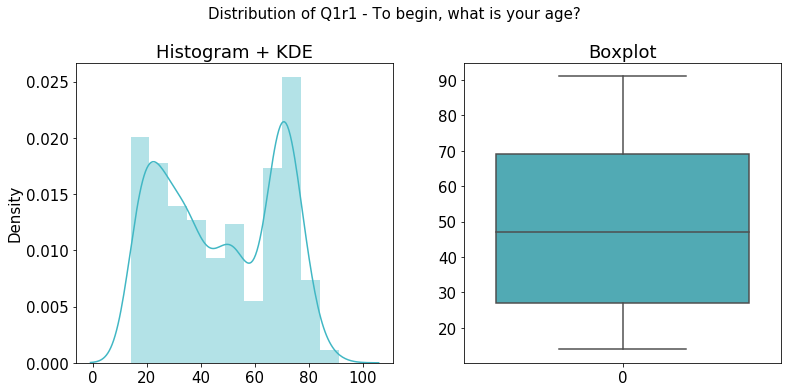

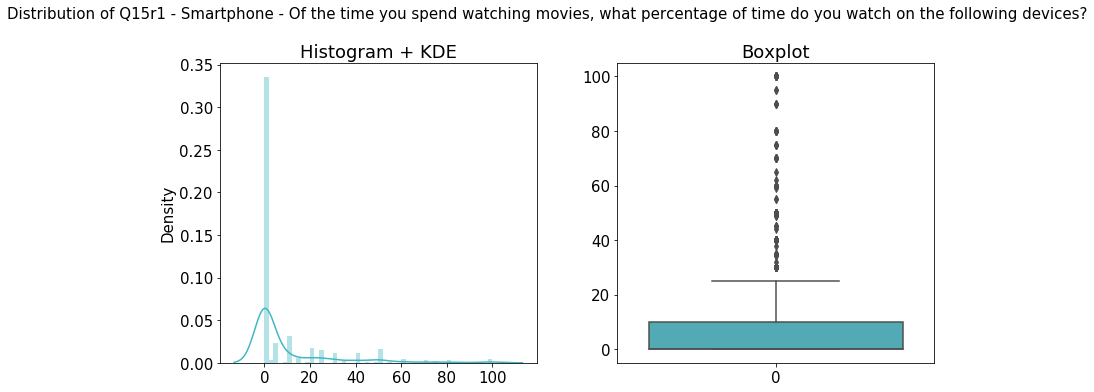

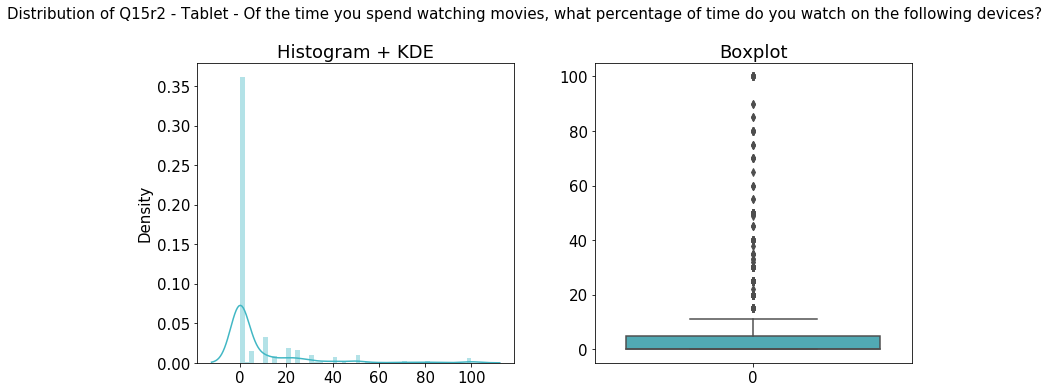

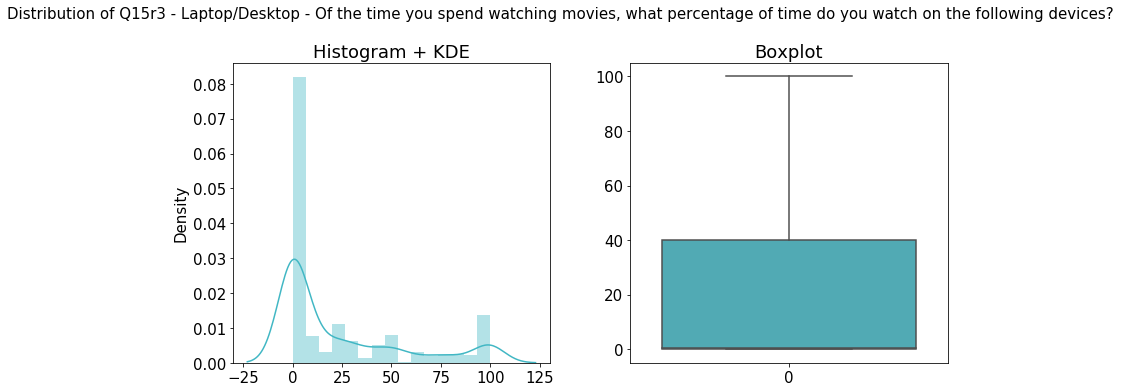

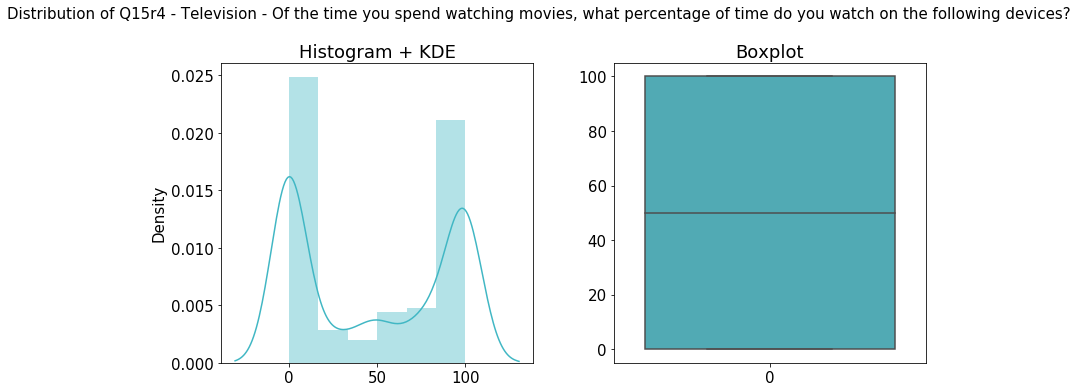

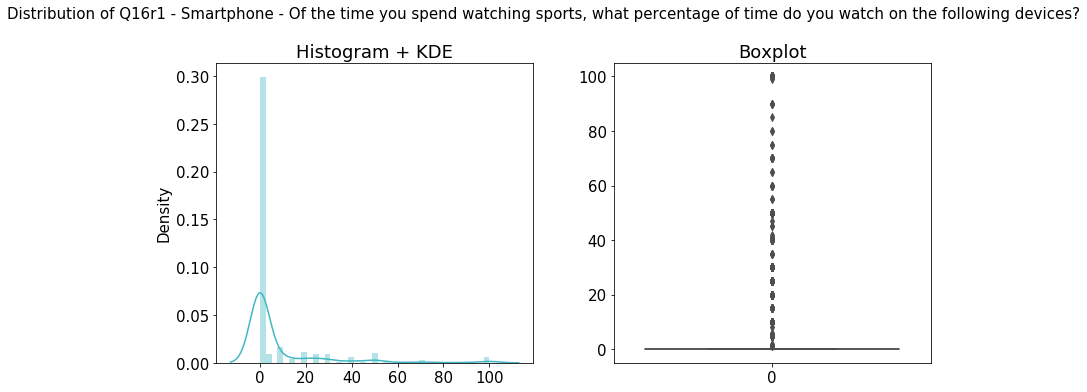

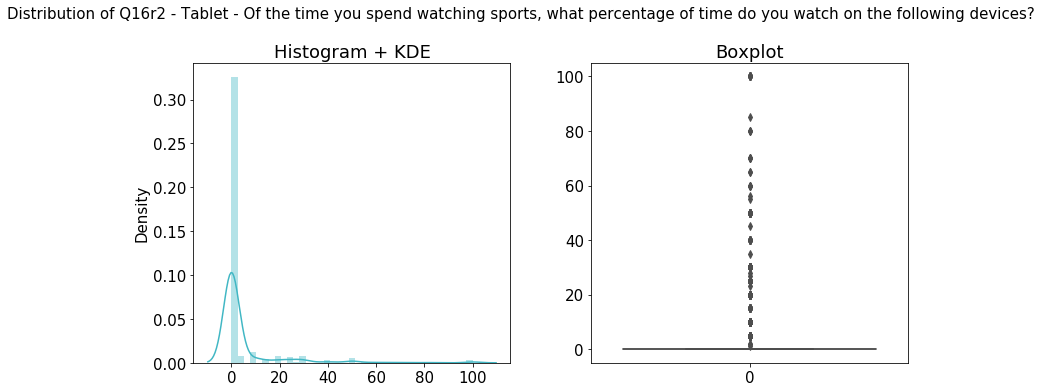

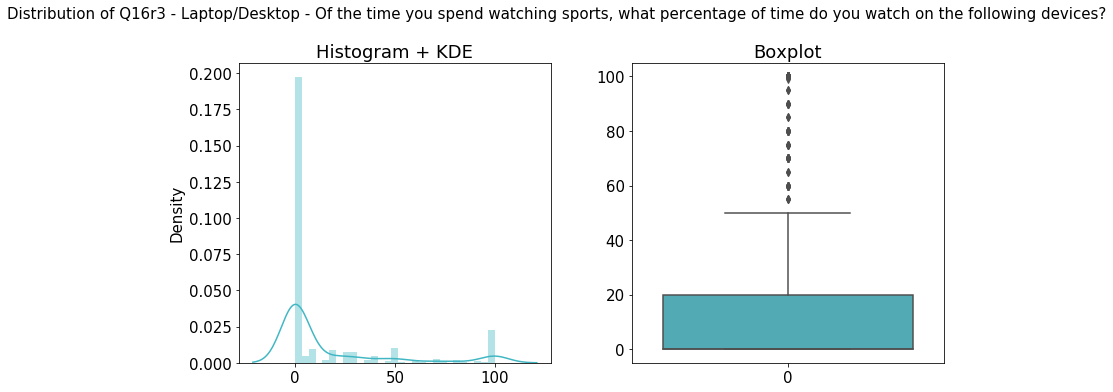

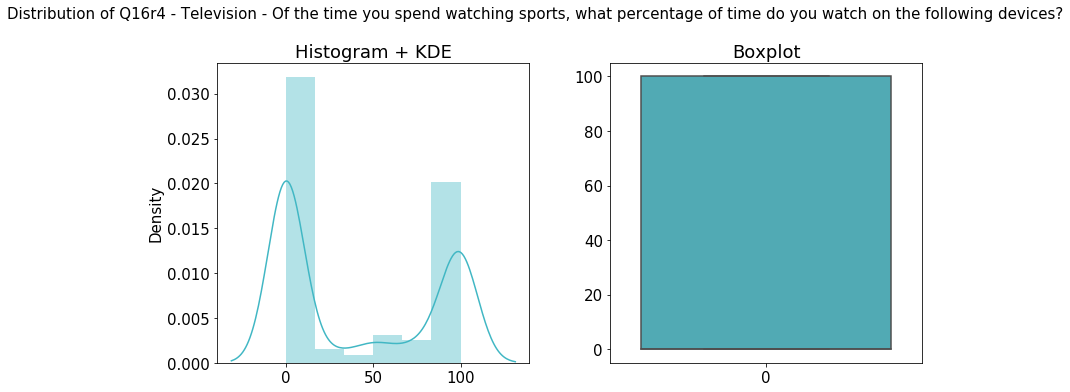

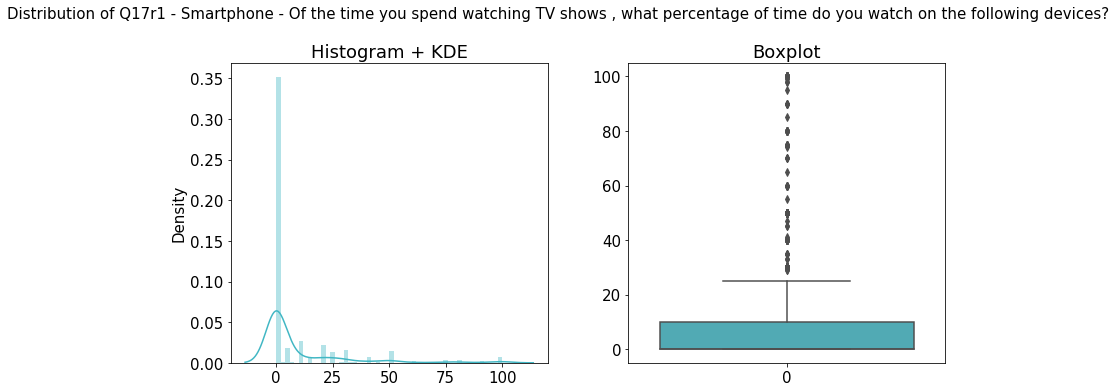

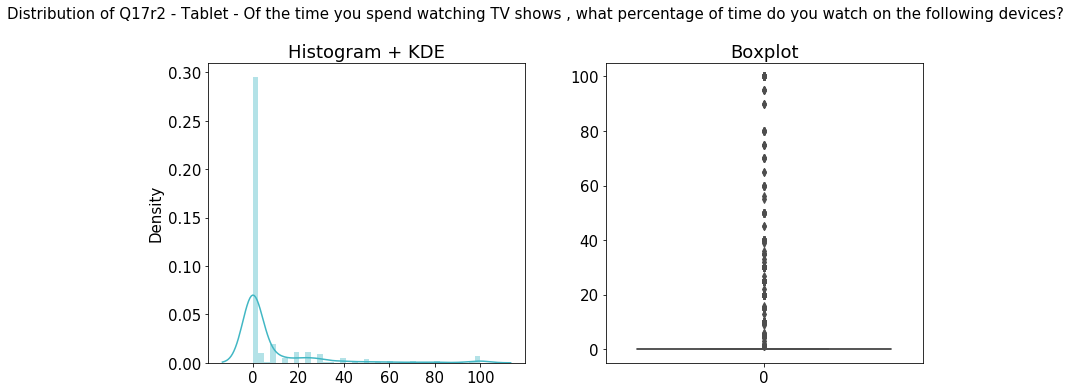

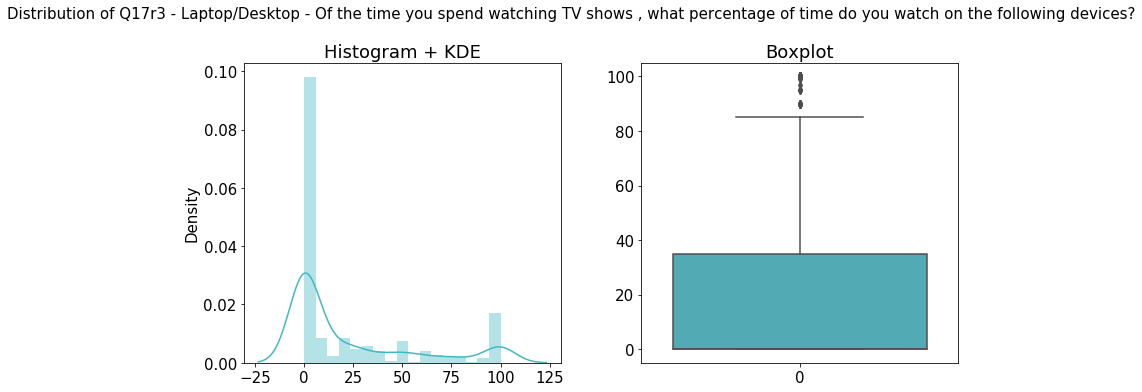

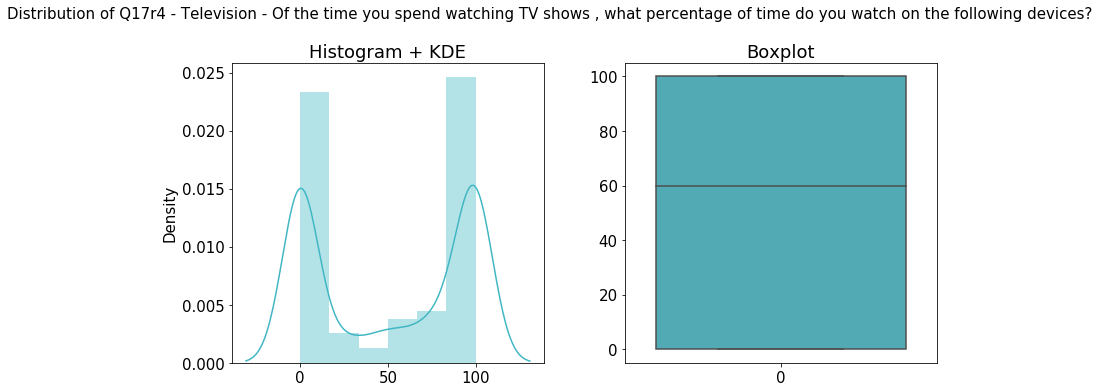

In [112]:
# univariate plots for numerical data
df_num = df_num.reset_index(drop=True)
for name in list(df_num.columns):
    plot_distribution(df_num[name], custom_colors[0], title="Distribution of " + name)

In [113]:
# univariate plots for categorical data

def plot_stacked(cols_list, col):
    df_new = df_cat[cols_list].copy()
    new_columns = [col.split('-', 2)[2] for col in df_new.columns]
    df_new.columns = new_columns
    
    # Drop rows with -999 values
    df_new = df_new[~df_new.isin([-999]).any(axis=1)]
    
    df_new = df_new.apply(pd.Series.value_counts).transpose()

    # Create a stacked bar chart
    df_new.plot(kind='bar', figsize=(16, 10), color=custom_colors)

    # Set the labels and title

    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title("Distribution of " + col)
    plt.xticks(rotation=40, ha='right')
    plt.show()

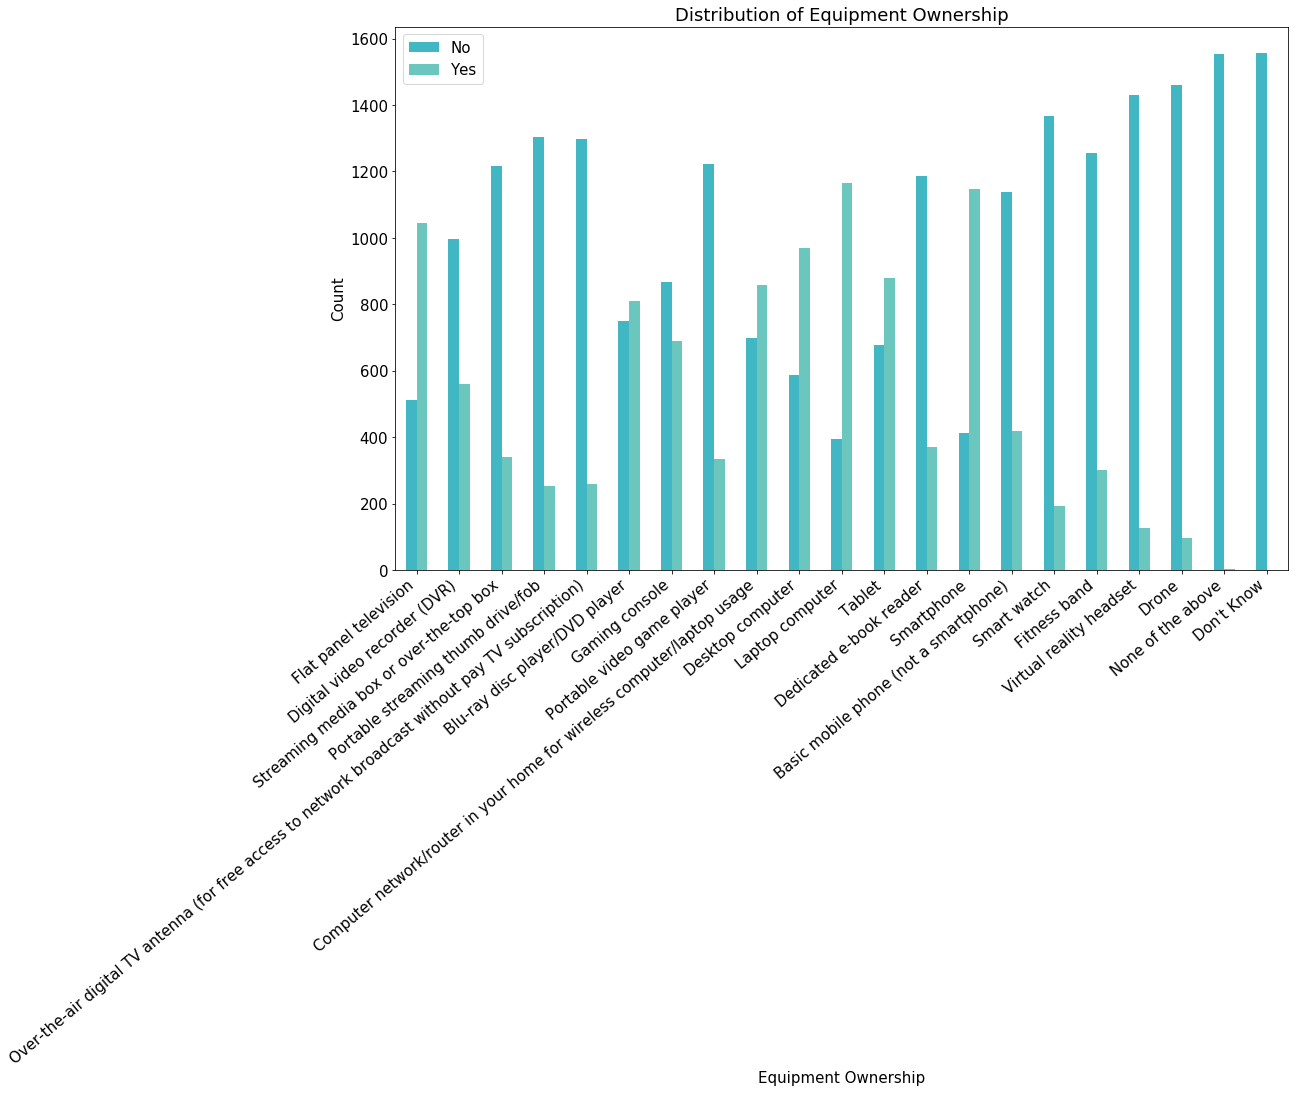

In [114]:
# select the columns to be combined
cols_equipment_owned = ['Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television',
        'Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR)',
        'Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box',
        'Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob',
        'Q8 - Which of the following media or home entertainment equipment does your household own?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription)',
        'Q8 - Which of the following media or home entertainment equipment does your household own?-Blu-ray disc player/DVD player',
        'Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console',
        'Q8 - Which of the following media or home entertainment equipment does your household own?-Portable video game player',
        'Q8 - Which of the following media or home entertainment equipment does your household own?-Computer network/router in your home for wireless computer/laptop usage',
        'Q8 - Which of the following media or home entertainment equipment does your household own?-Desktop computer',
        'Q8 - Which of the following media or home entertainment equipment does your household own?-Laptop computer',
        'Q8 - Which of the following media or home entertainment equipment does your household own?-Tablet',
        'Q8 - Which of the following media or home entertainment equipment does your household own?-Dedicated e-book reader',
        'Q8 - Which of the following media or home entertainment equipment does your household own?-Smartphone',
        'Q8 - Which of the following media or home entertainment equipment does your household own?-Basic mobile phone (not a smartphone)',
        'Q8 - Which of the following media or home entertainment equipment does your household own?-Smart watch',
        'Q8 - Which of the following media or home entertainment equipment does your household own?-Fitness band',
        'Q8 - Which of the following media or home entertainment equipment does your household own?-Virtual reality headset',
        'Q8 - Which of the following media or home entertainment equipment does your household own?-Drone',
        'Q8 - Which of the following media or home entertainment equipment does your household own?-None of the above',
        "Q8 - Which of the following media or home entertainment equipment does your household own?-Don't Know"]

plot_stacked(cols_equipment_owned, "Equipment Ownership")

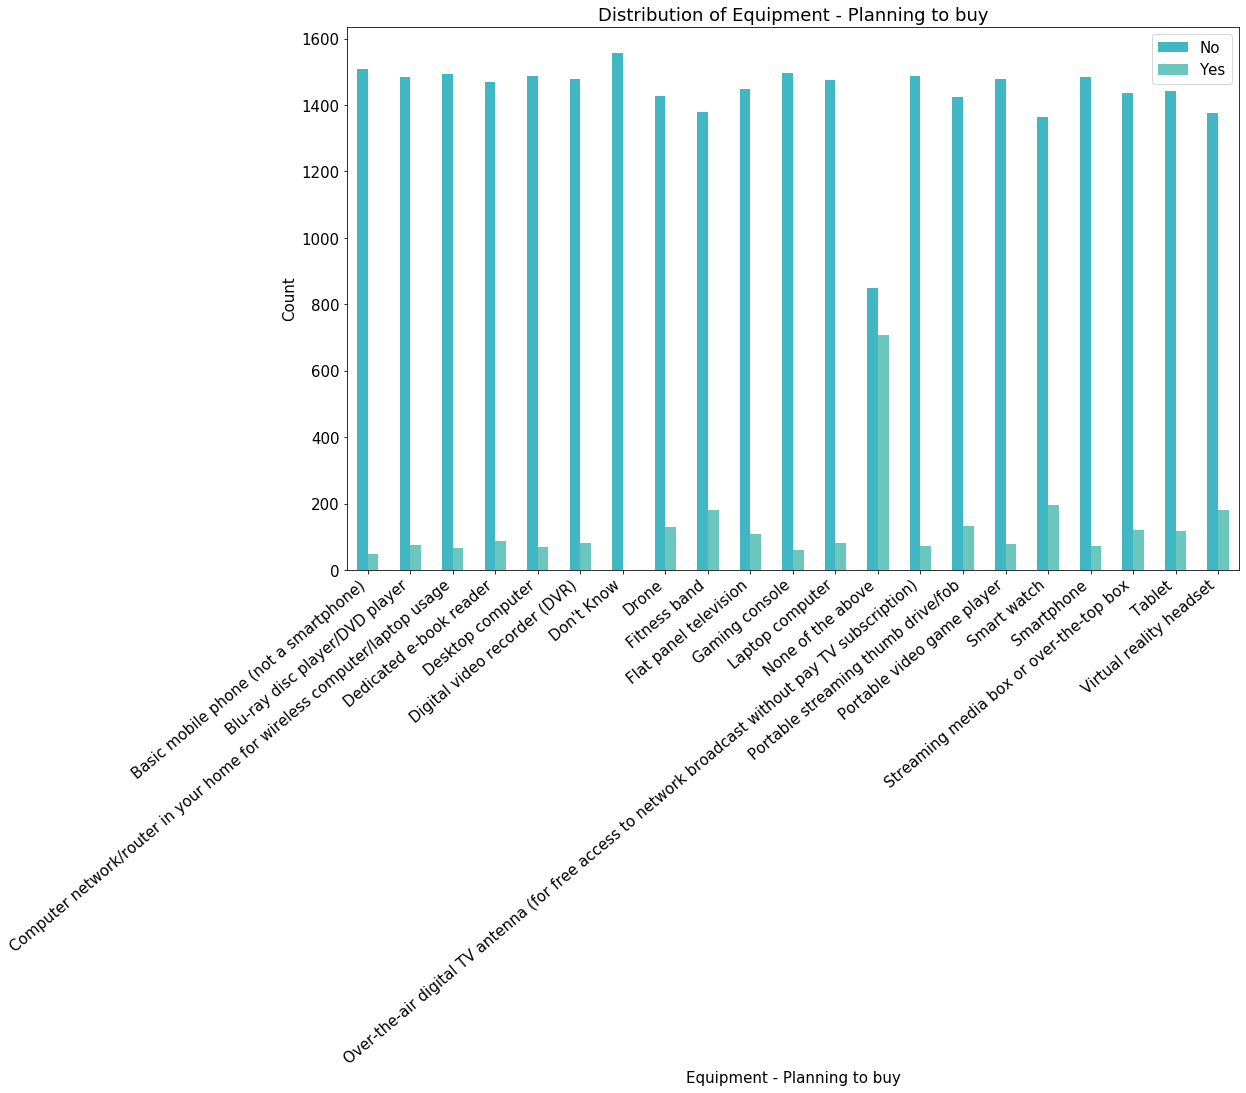

In [115]:
# select the columns to be combined
cols_planning_to_buy = [ 'Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Basic mobile phone (not a smartphone)',
 'Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Blu-ray disc player/DVD player',
 'Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Computer network/router in your home for wireless computer/laptop usage',
 'Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Dedicated e-book reader',
 'Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Desktop computer',
 'Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Digital video recorder (DVR)',
 "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Don't Know",
 'Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Drone',
 'Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Fitness band',
 'Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Flat panel television',
 'Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Gaming console',
 'Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Laptop computer',
 'Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-None of the above',
 'Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription)',
 'Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable streaming thumb drive/fob',
 'Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable video game player',
 'Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smart watch',
 'Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smartphone',
 'Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Streaming media box or over-the-top box',
 'Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Tablet',
 'Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Virtual reality headset']

plot_stacked(cols_planning_to_buy, "Equipment - Planning to buy")

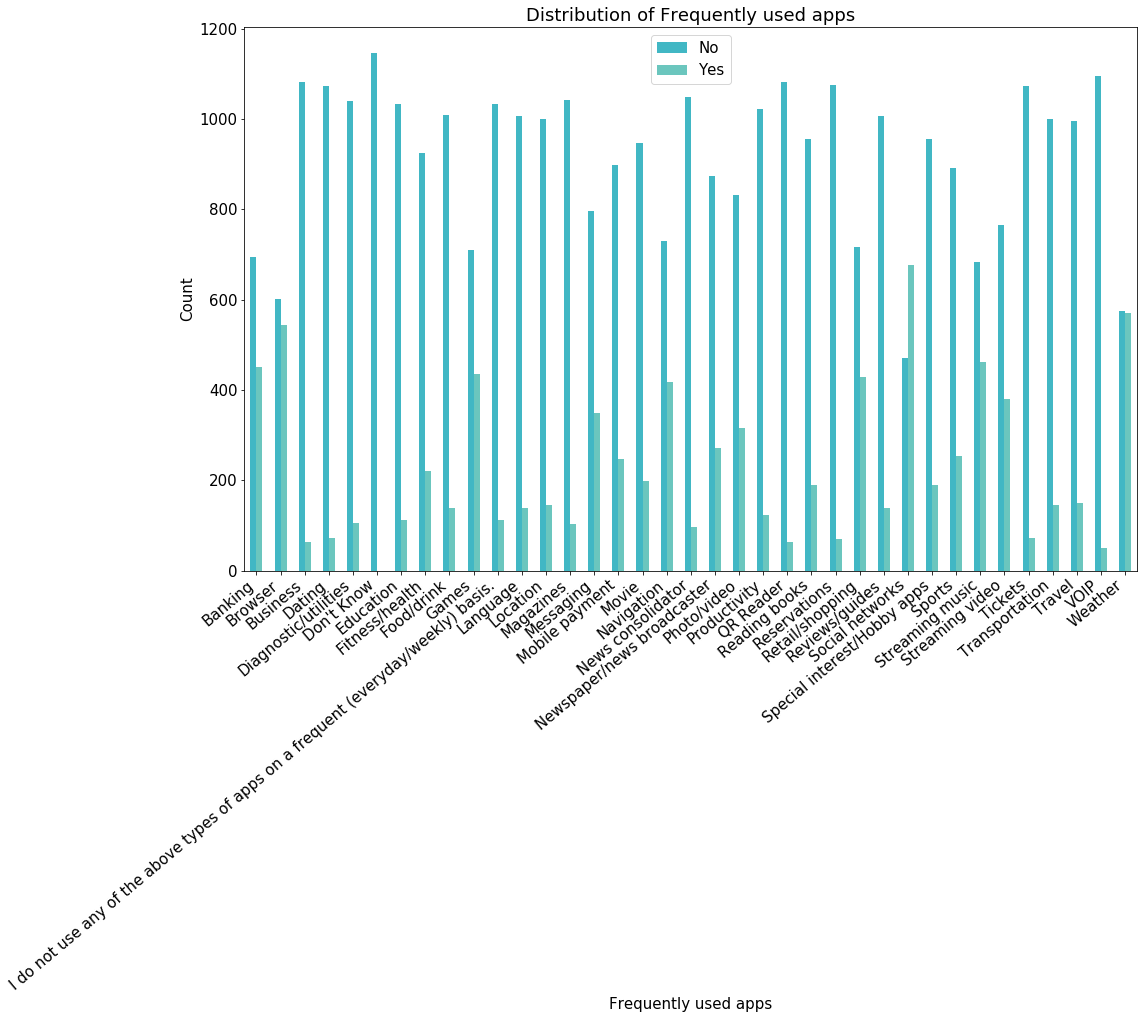

In [116]:
# select the columns to be combined
cols_freq_used_apps = [ 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Banking',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Browser',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Business',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Dating',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Diagnostic/utilities',
 "Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Don't Know",
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Education',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Fitness/health',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Food/drink',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Games',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-I do not use any of the above types of apps on a frequent (everyday/weekly) basis.',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Language',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Location',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Magazines',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Messaging',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Mobile payment',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Movie',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Navigation',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-News consolidator',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Newspaper/news broadcaster',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Photo/video',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Productivity',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-QR Reader',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Reading books',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Reservations',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Retail/shopping',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Reviews/guides',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Social networks',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Special interest/Hobby apps',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Sports',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Streaming music',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Streaming video',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Tickets',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Transportation',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Travel',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-VOIP',
 'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Weather']

plot_stacked(cols_freq_used_apps, "Frequently used apps")

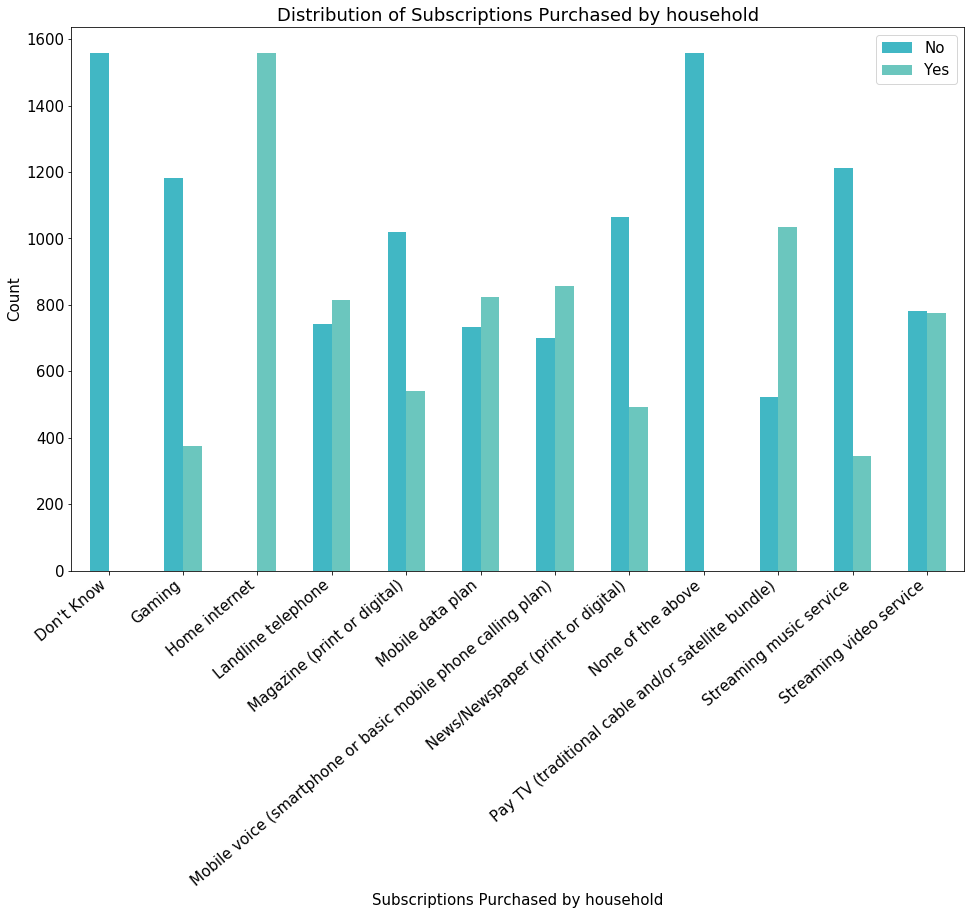

In [117]:
# select the columns to be combined
cols_subscription = ["Q26 - Which of the following subscriptions does your household purchase?-Don't Know",
 'Q26 - Which of the following subscriptions does your household purchase?-Gaming',
 'Q26 - Which of the following subscriptions does your household purchase?-Home internet',
 'Q26 - Which of the following subscriptions does your household purchase?-Landline telephone',
 'Q26 - Which of the following subscriptions does your household purchase?-Magazine (print or digital)',
 'Q26 - Which of the following subscriptions does your household purchase?-Mobile data plan',
 'Q26 - Which of the following subscriptions does your household purchase?-Mobile voice (smartphone or basic mobile phone calling plan)',
 'Q26 - Which of the following subscriptions does your household purchase?-News/Newspaper (print or digital)',
 'Q26 - Which of the following subscriptions does your household purchase?-None of the above',
 'Q26 - Which of the following subscriptions does your household purchase?-Pay TV (traditional cable and/or satellite bundle)',
 'Q26 - Which of the following subscriptions does your household purchase?-Streaming music service',
 'Q26 - Which of the following subscriptions does your household purchase?-Streaming video service']

plot_stacked(cols_subscription, "Subscriptions Purchased by household")

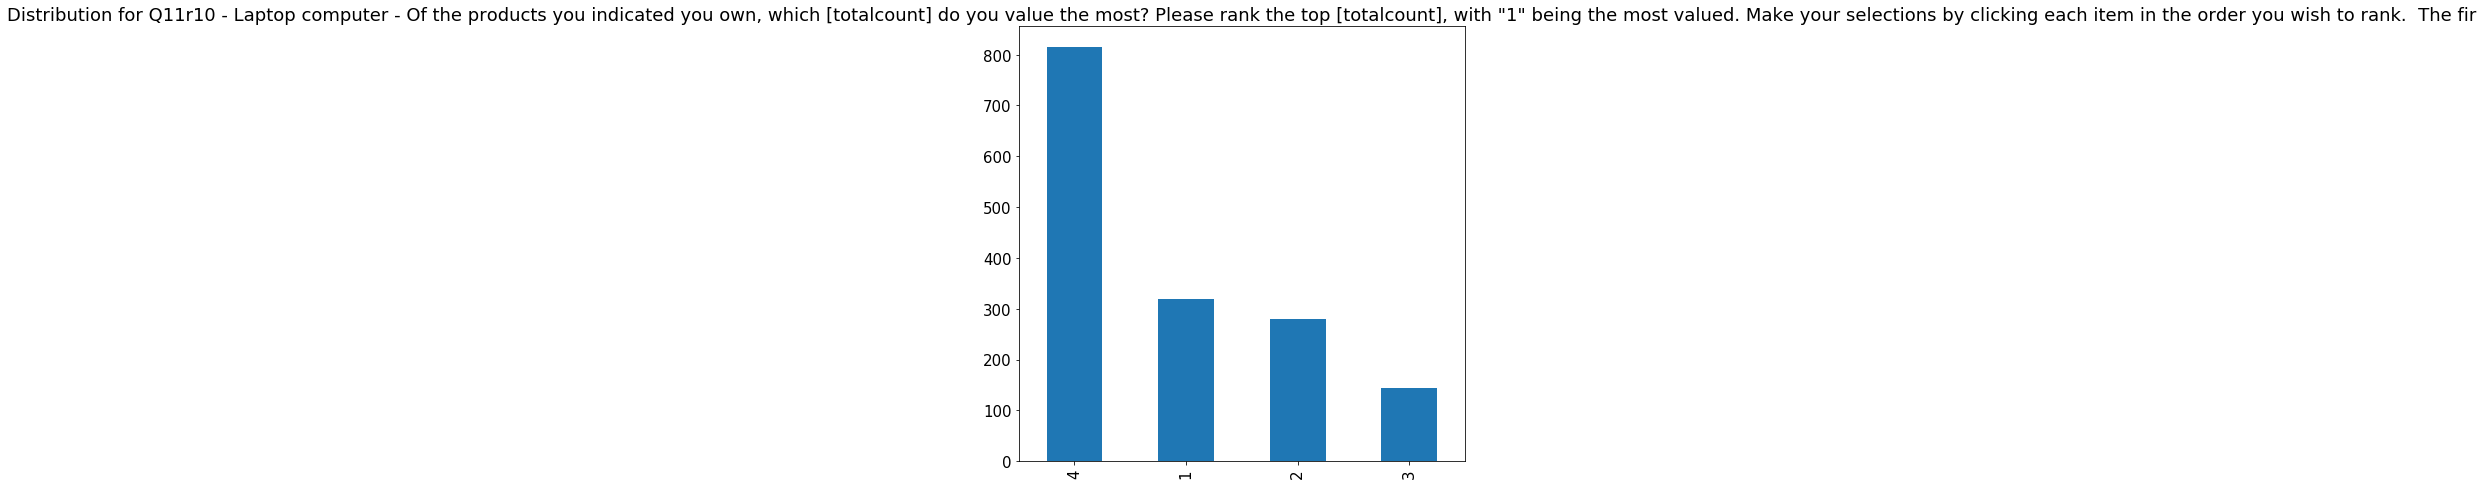

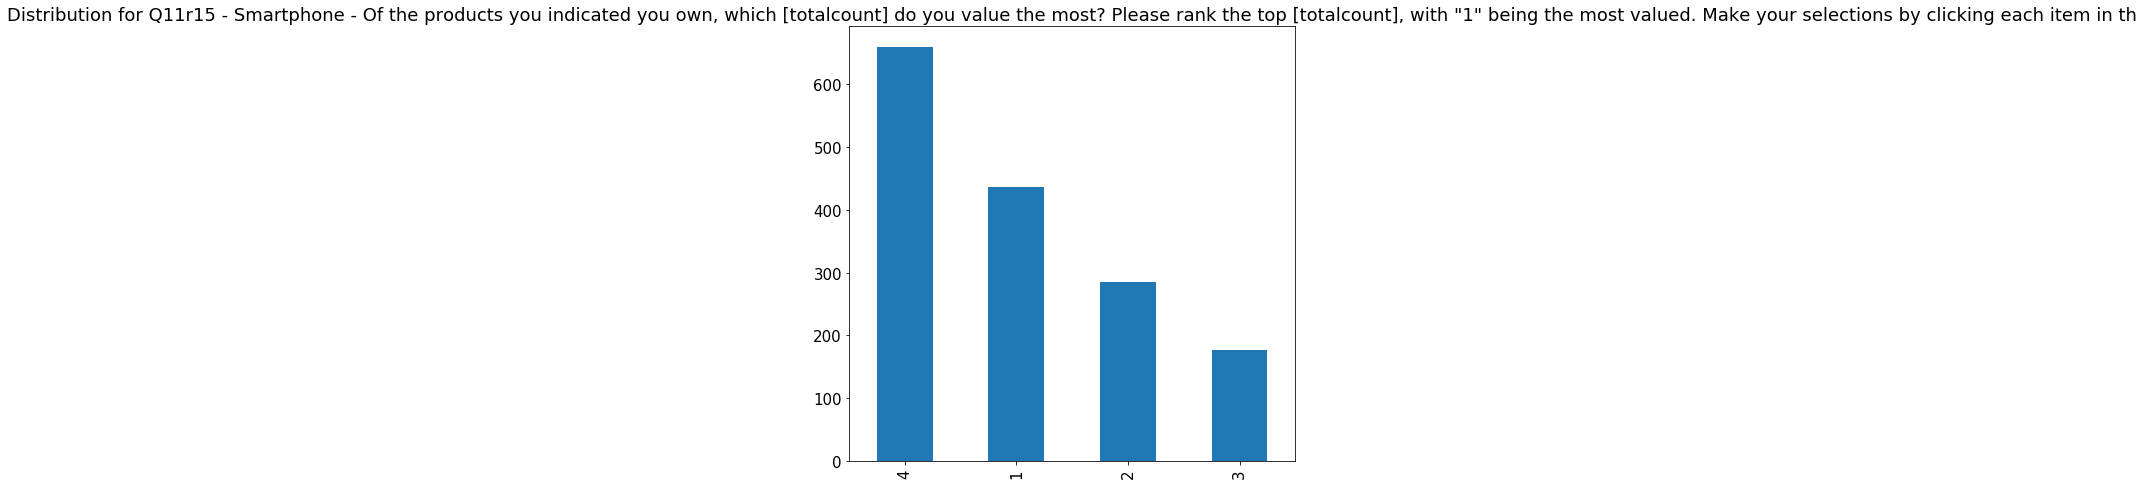

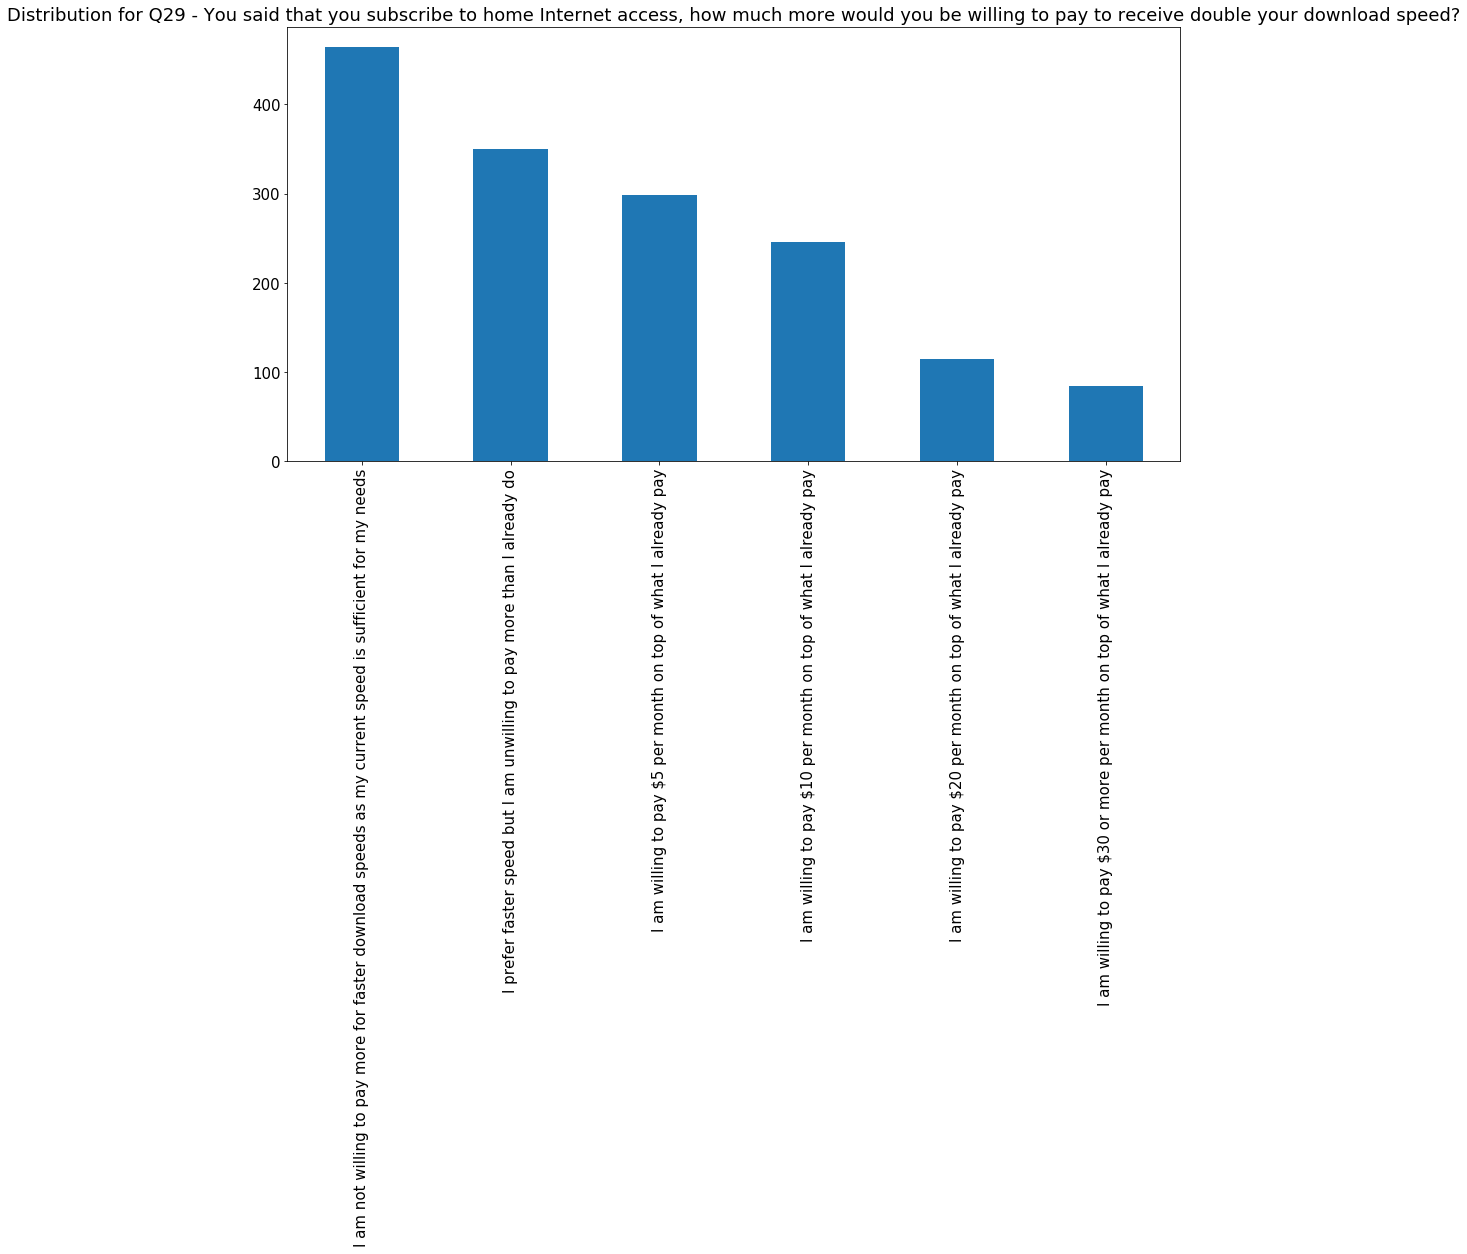

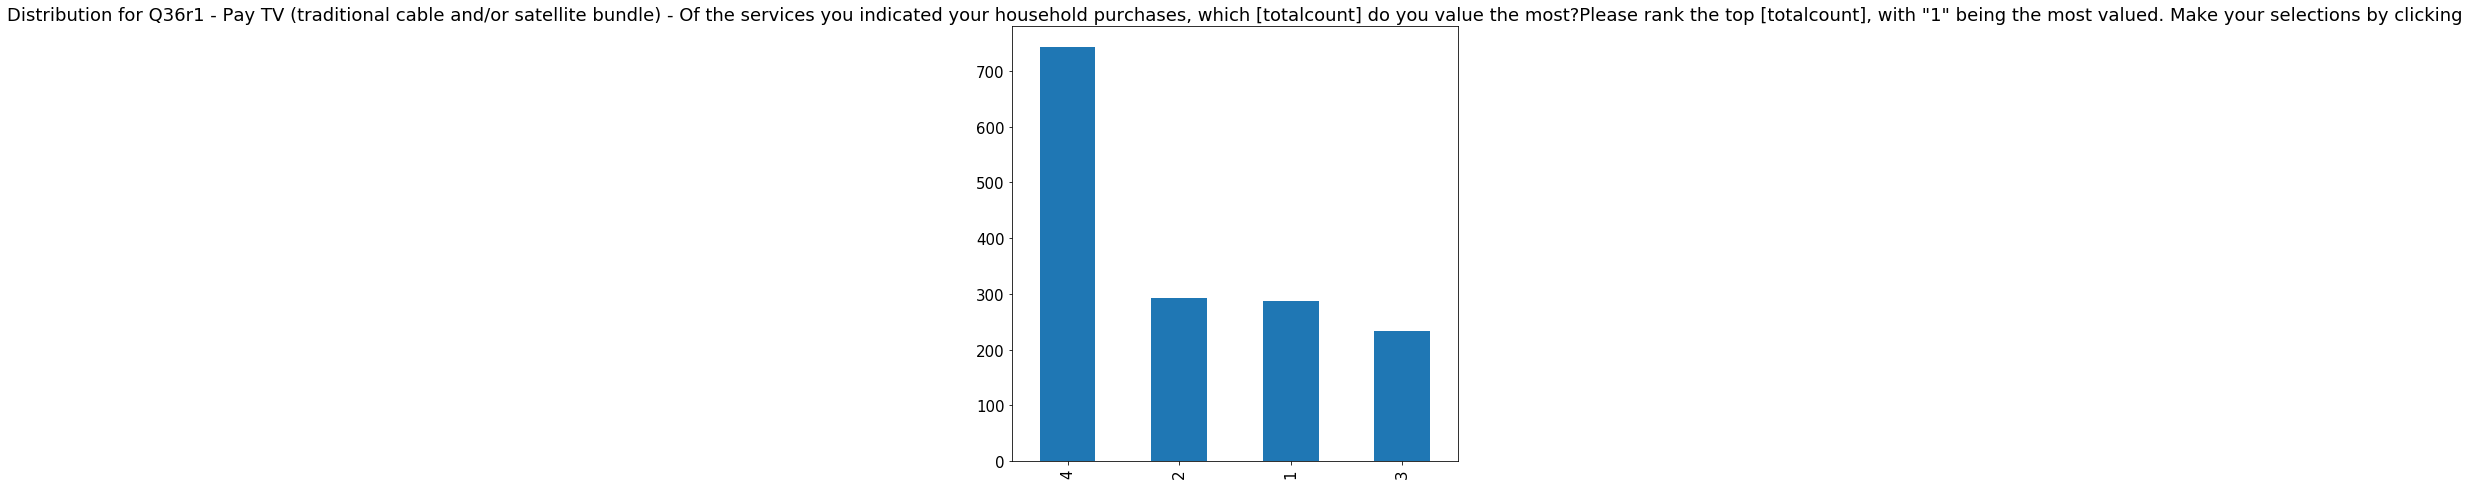

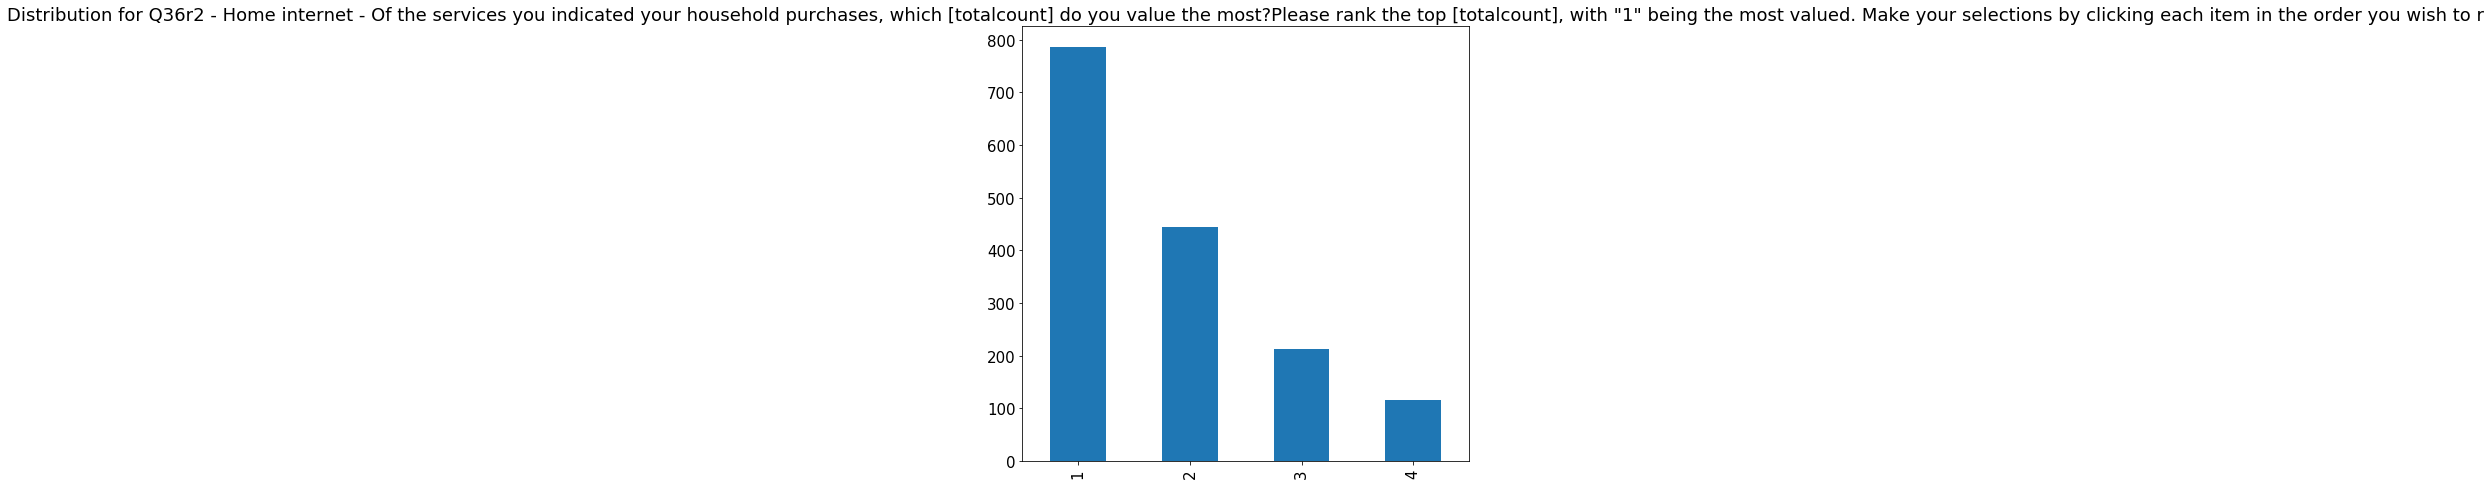

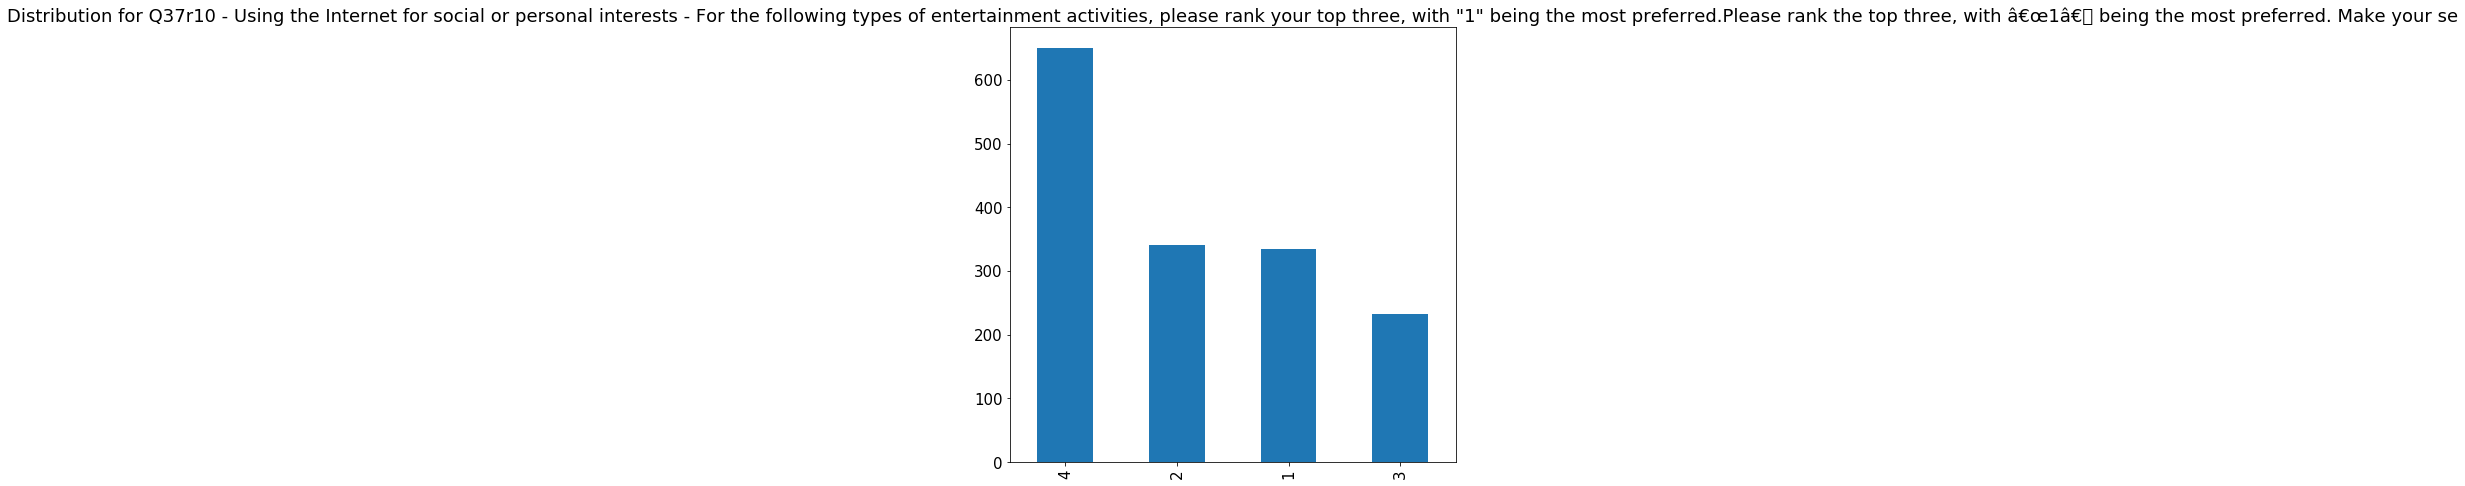

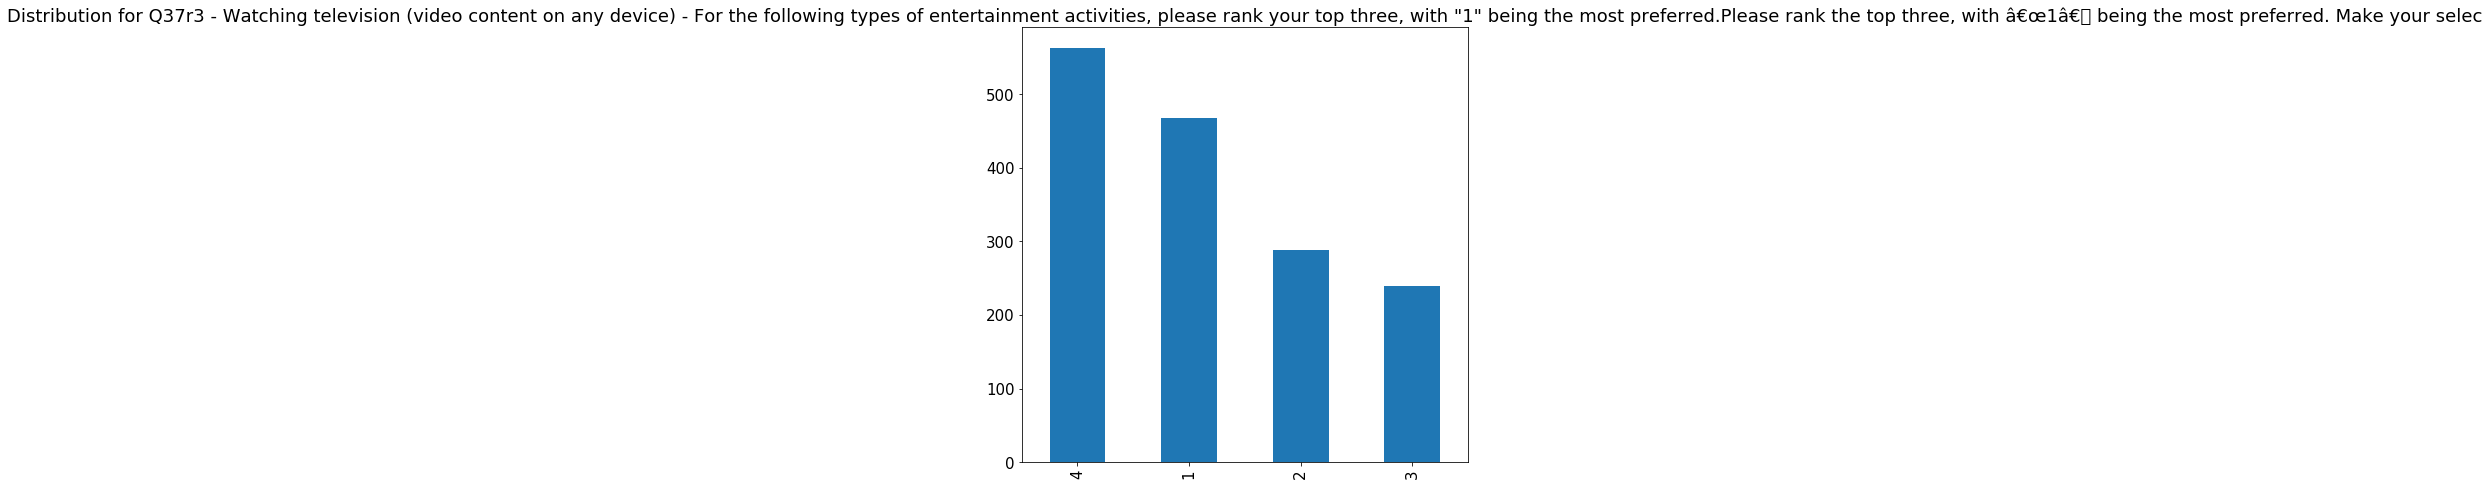

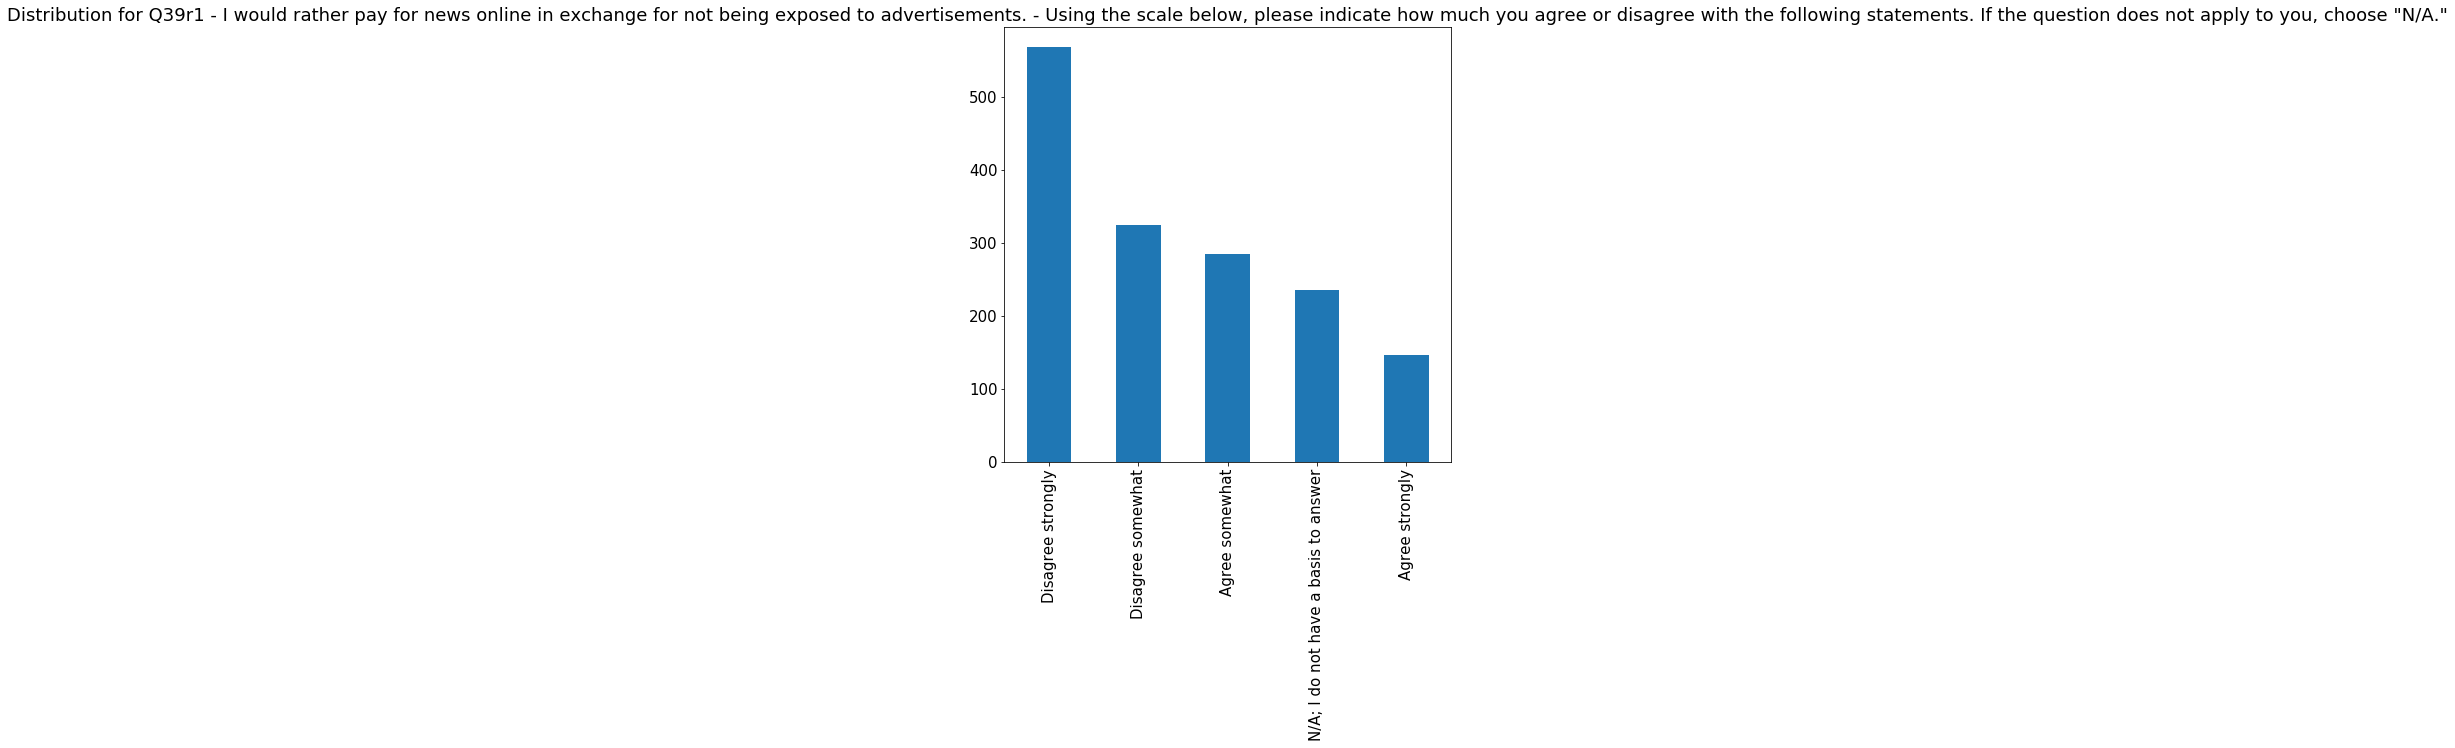

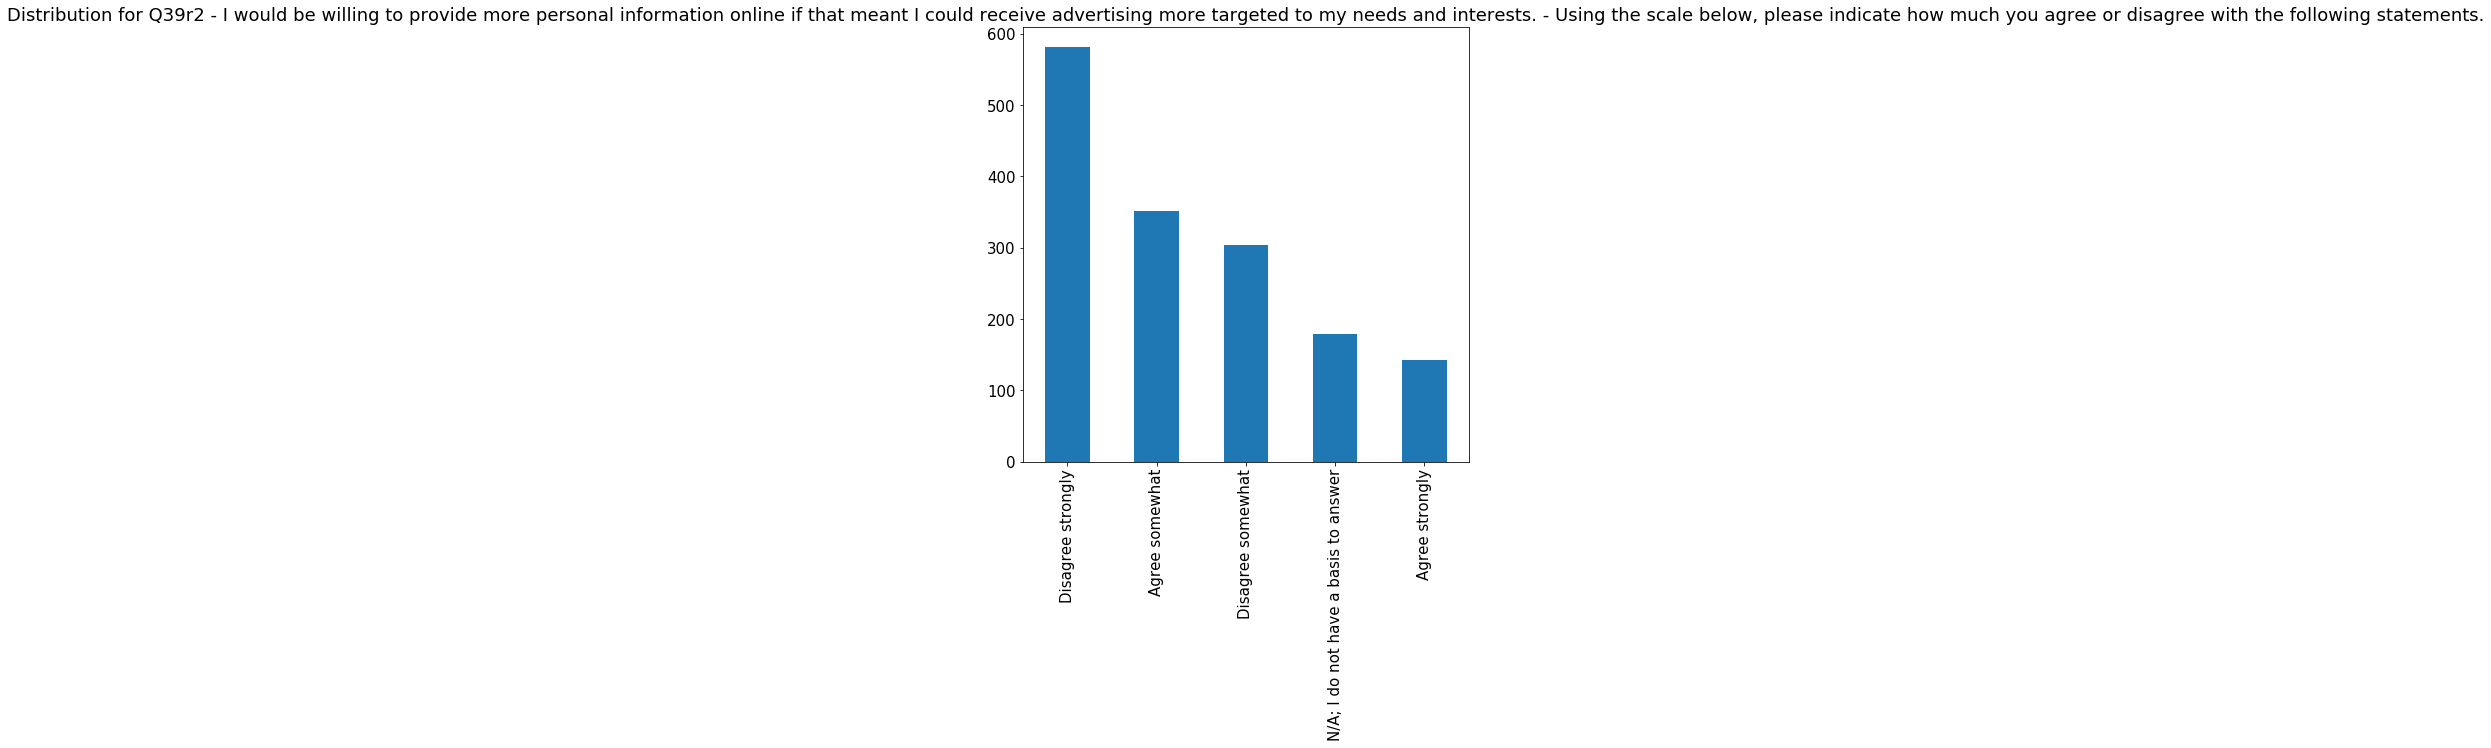

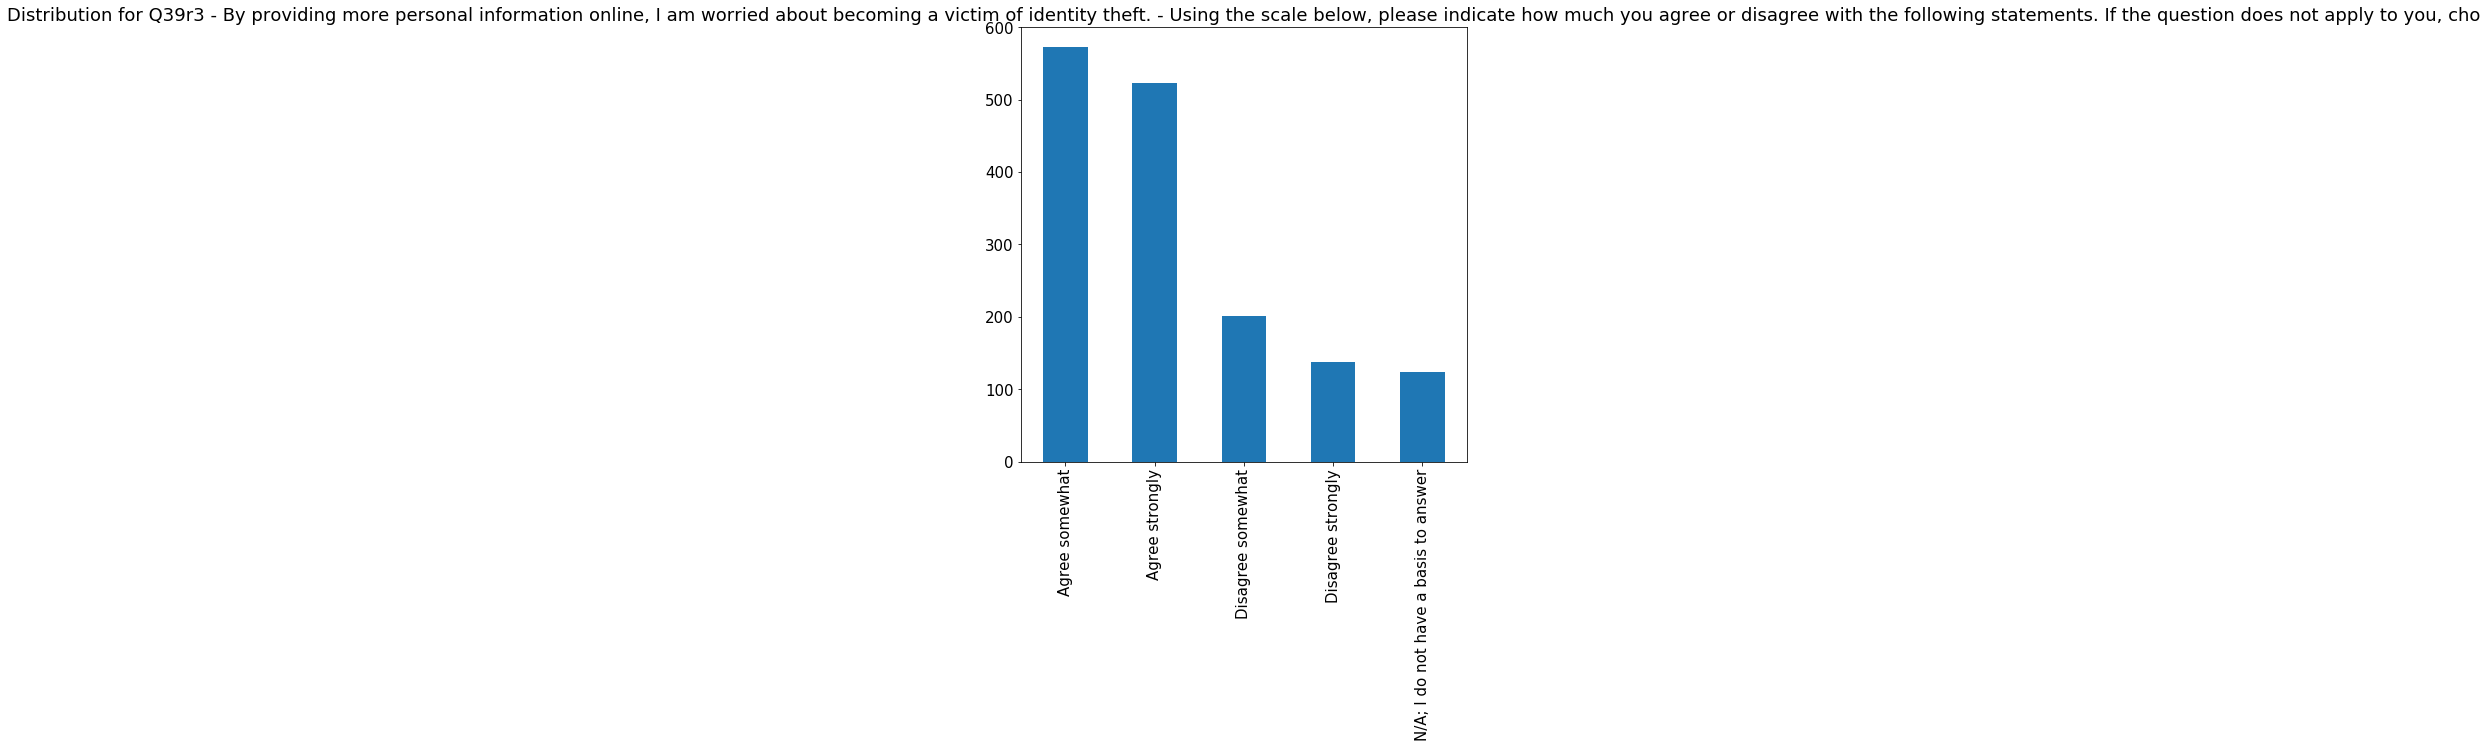

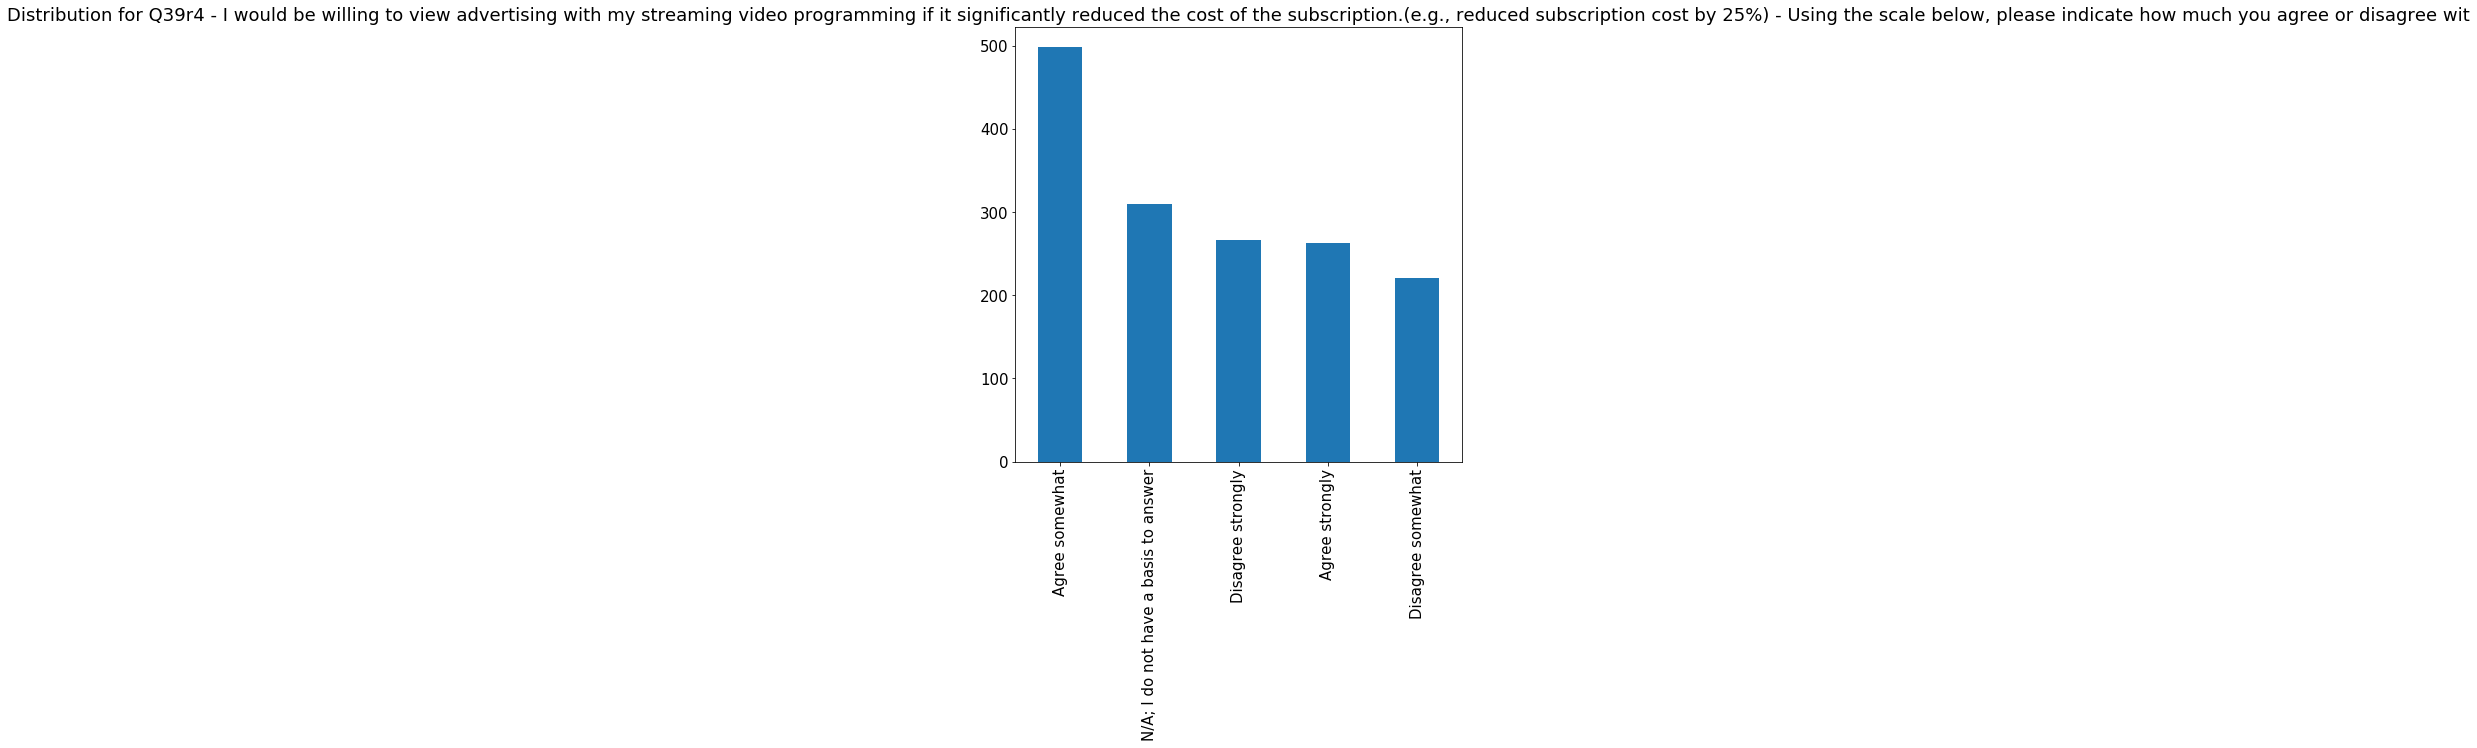

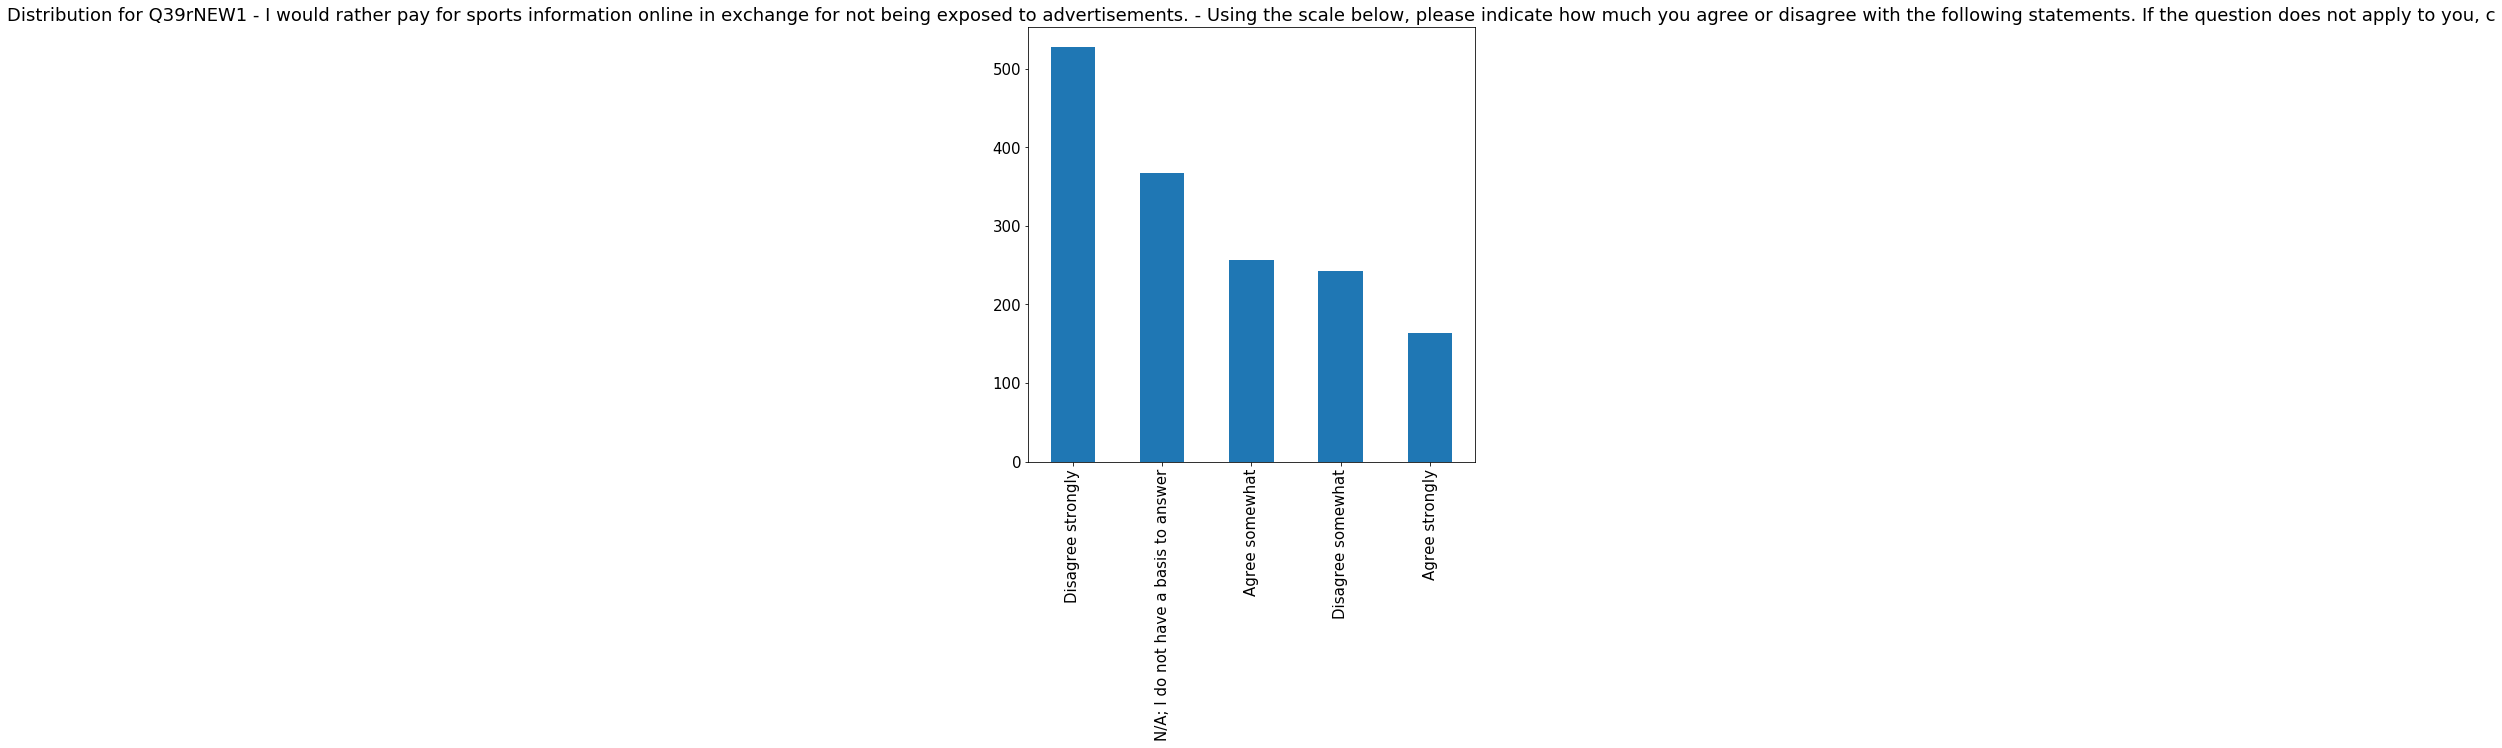

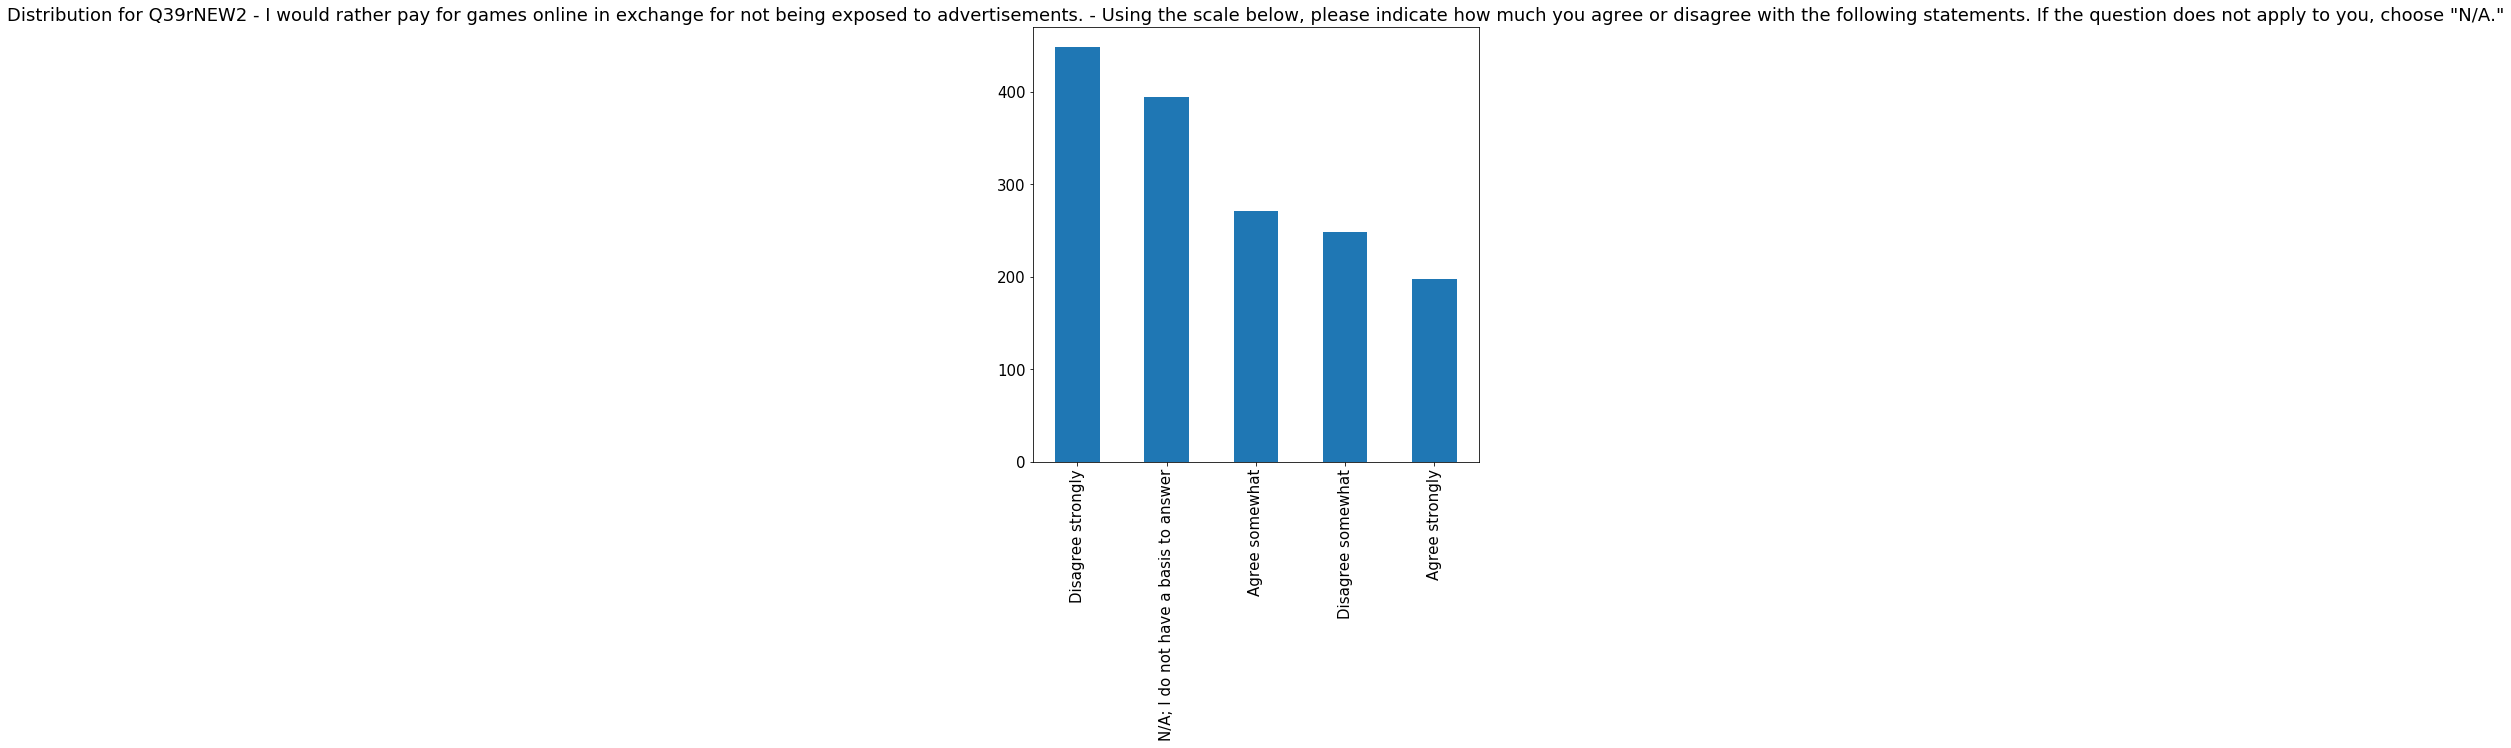

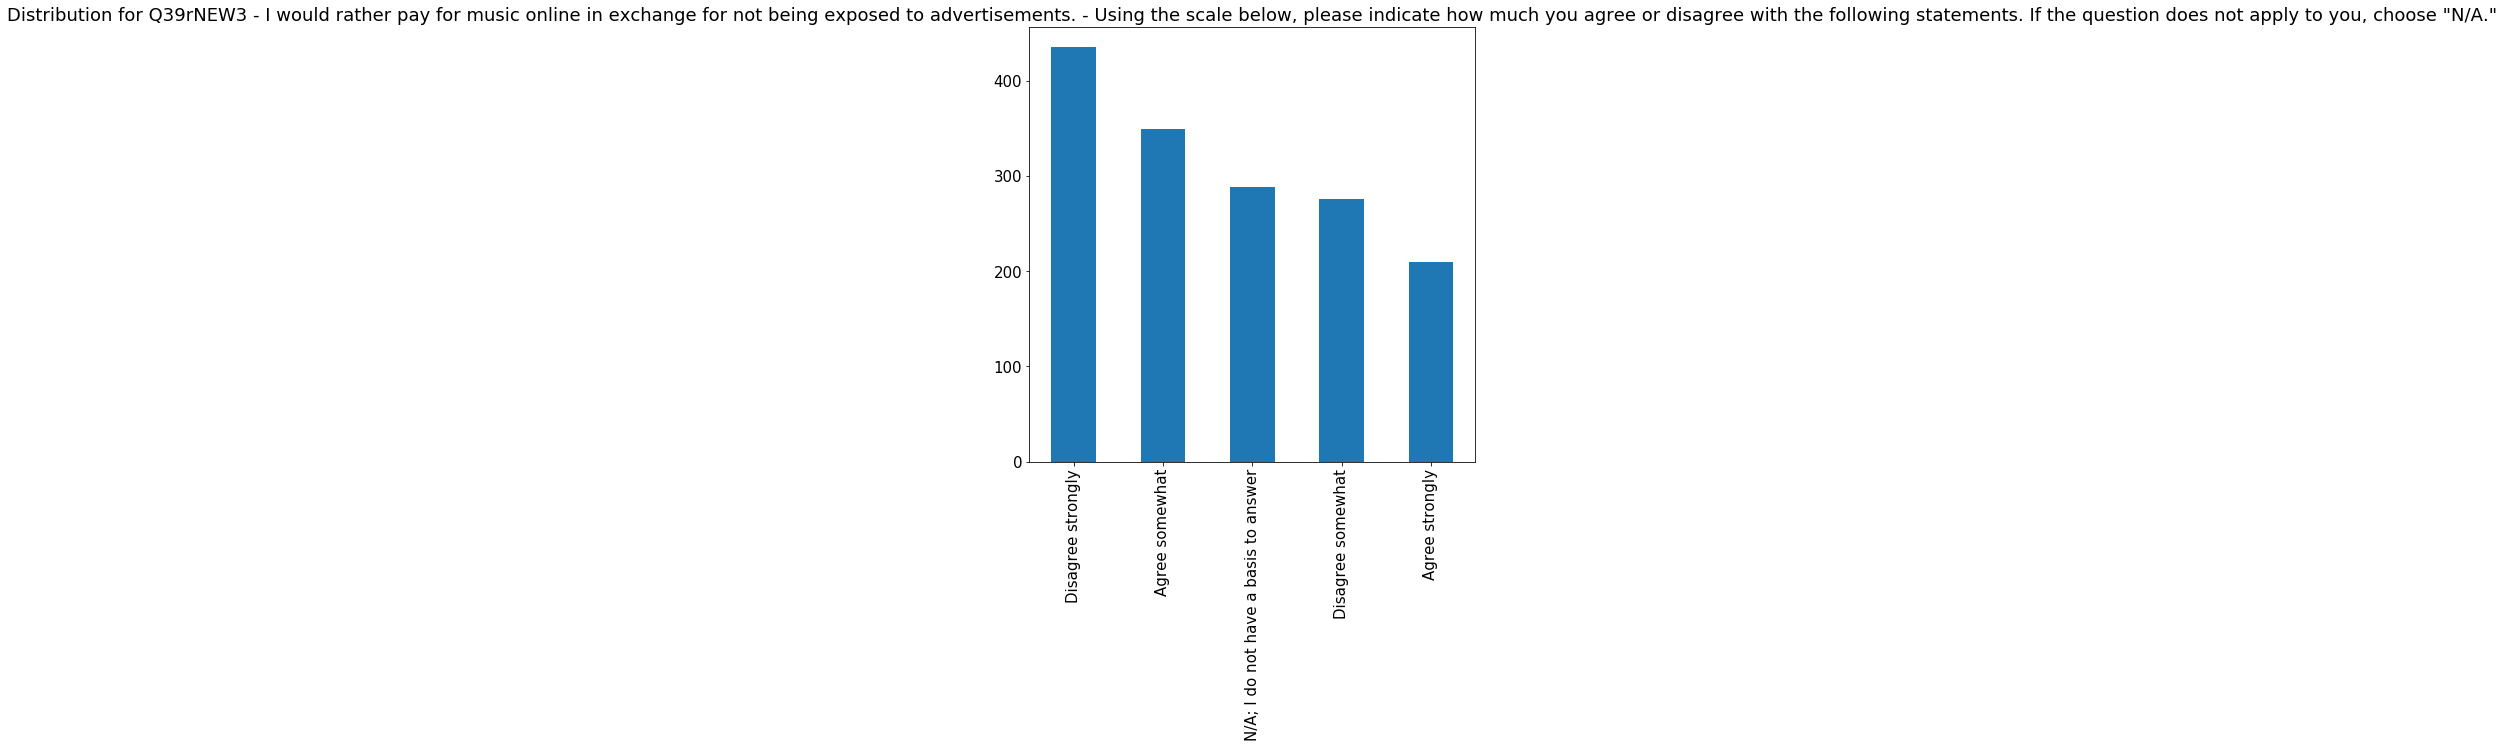

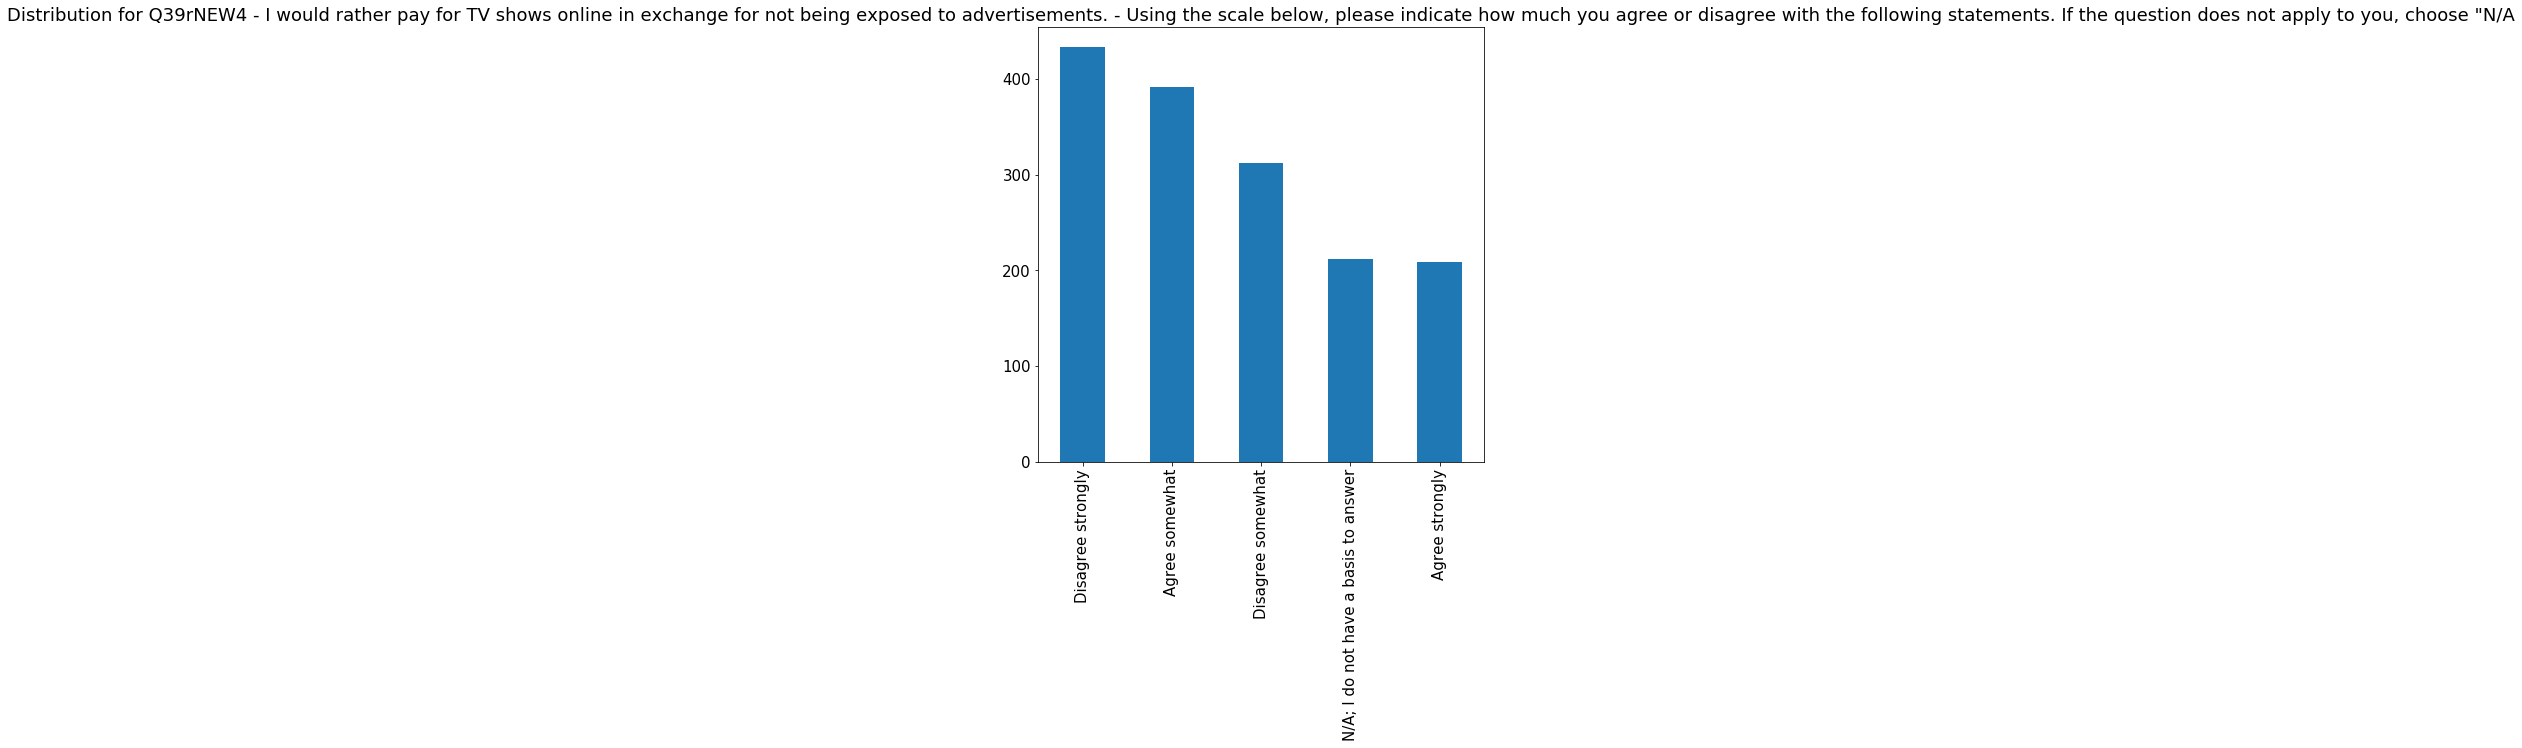

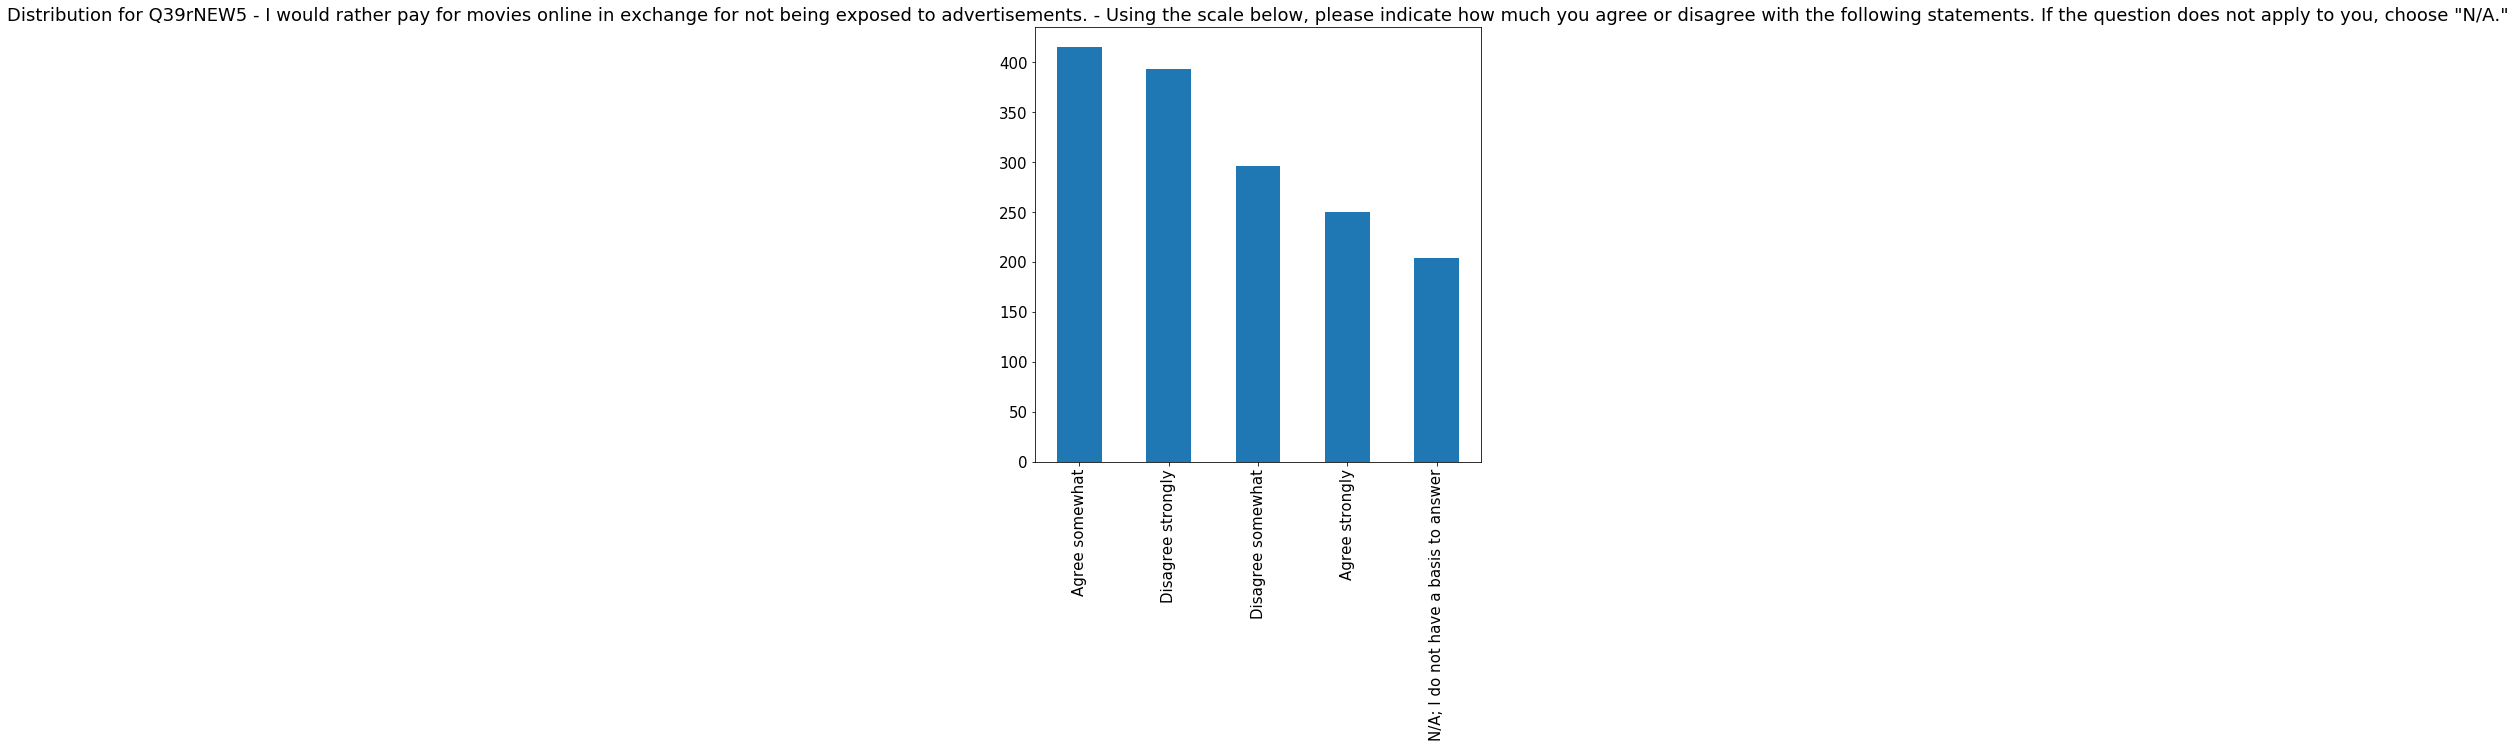

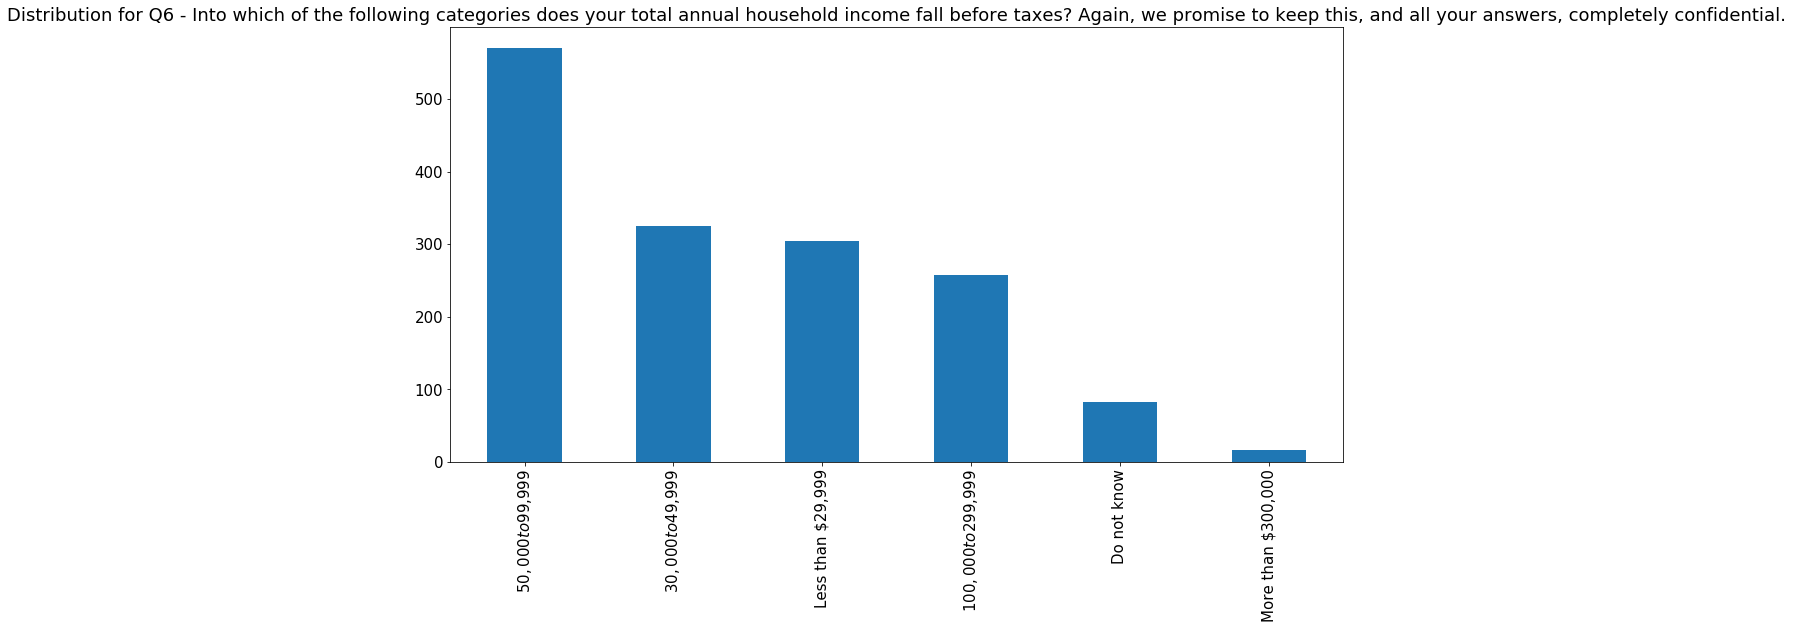

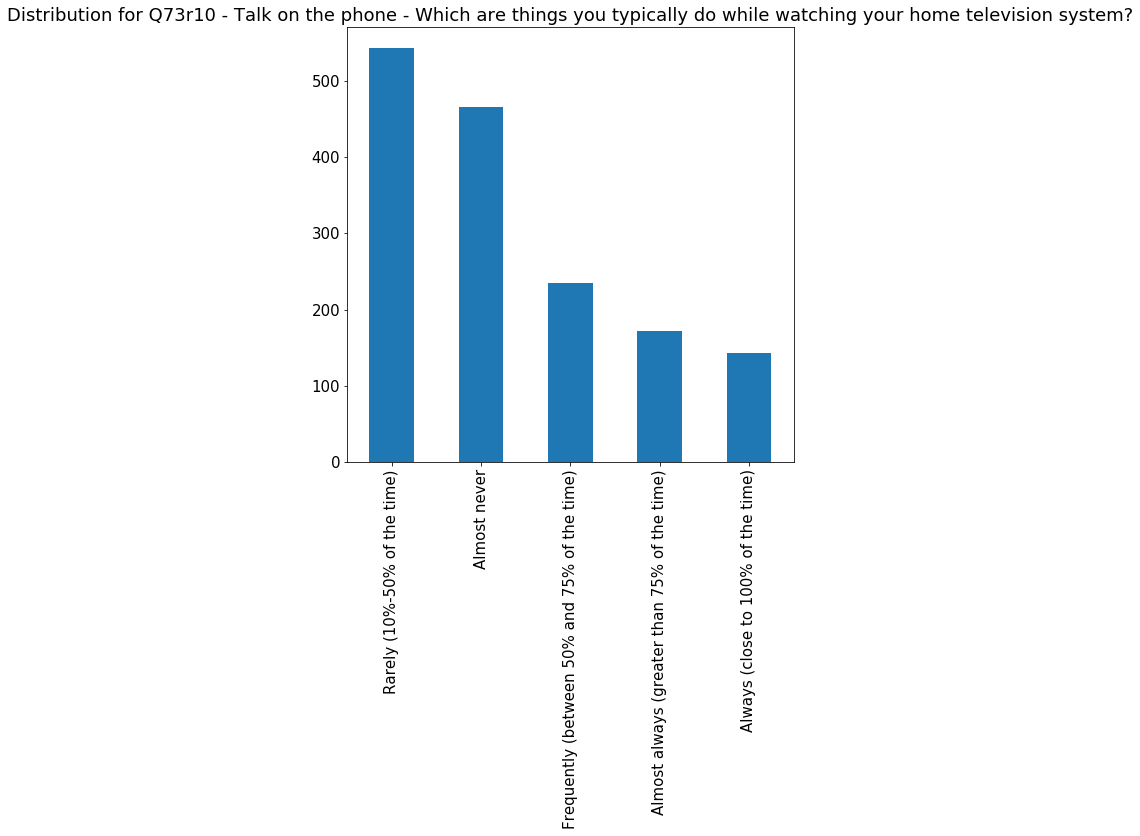

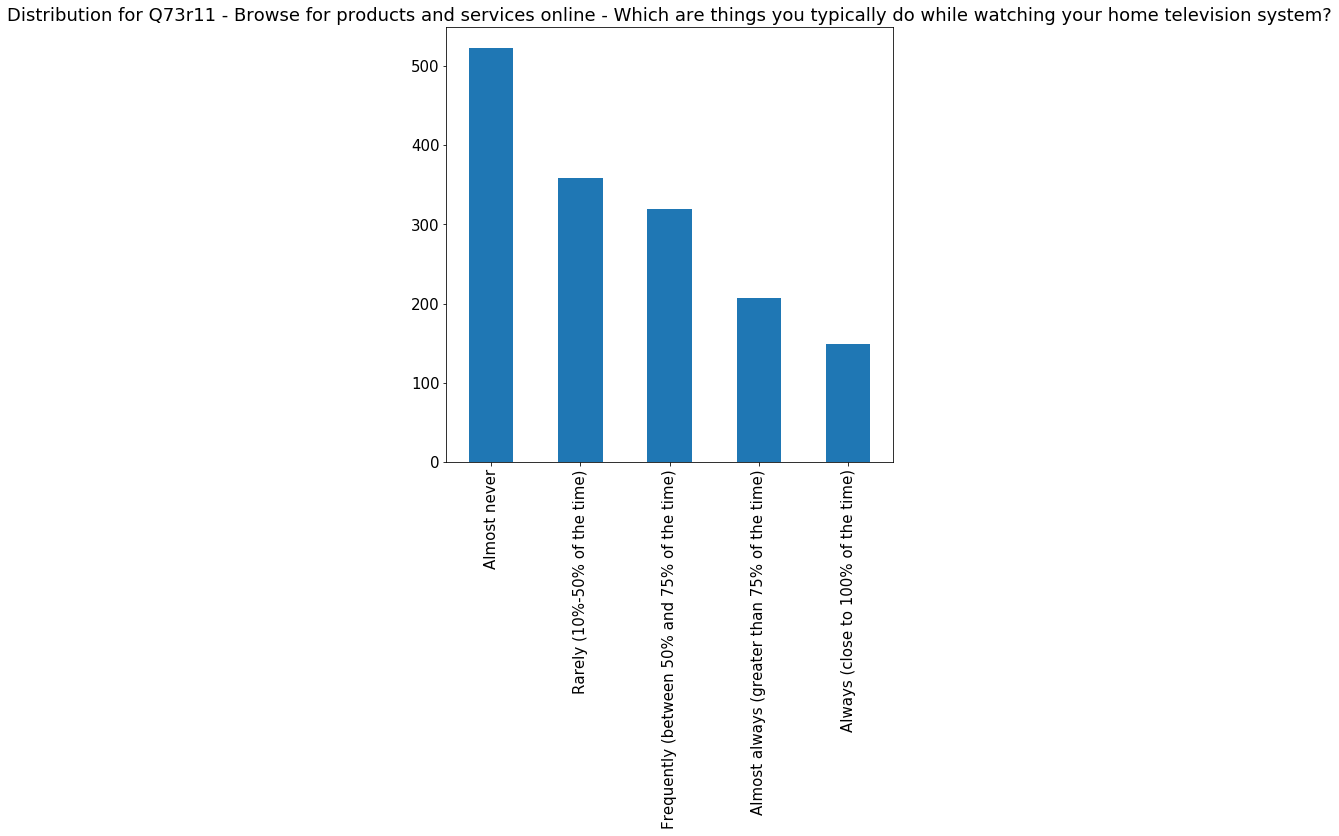

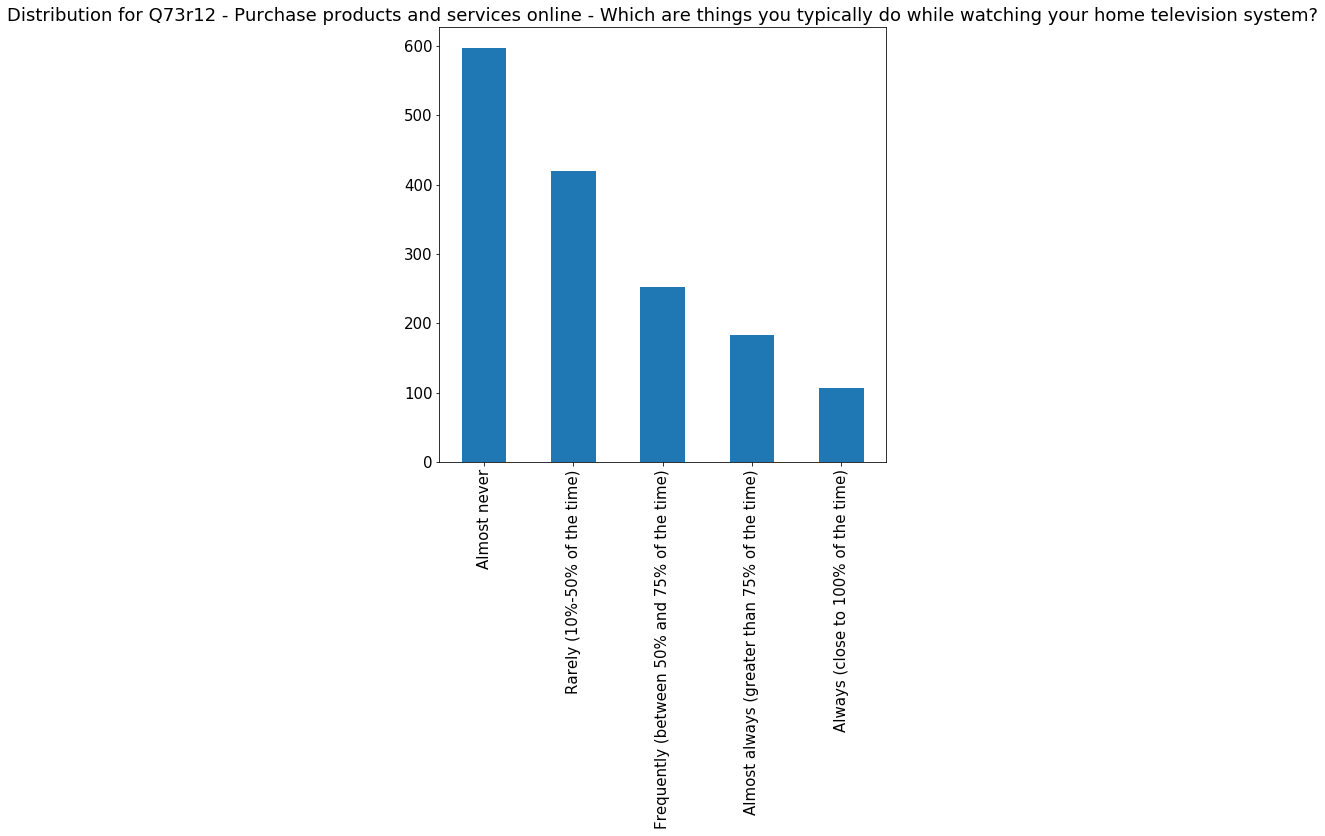

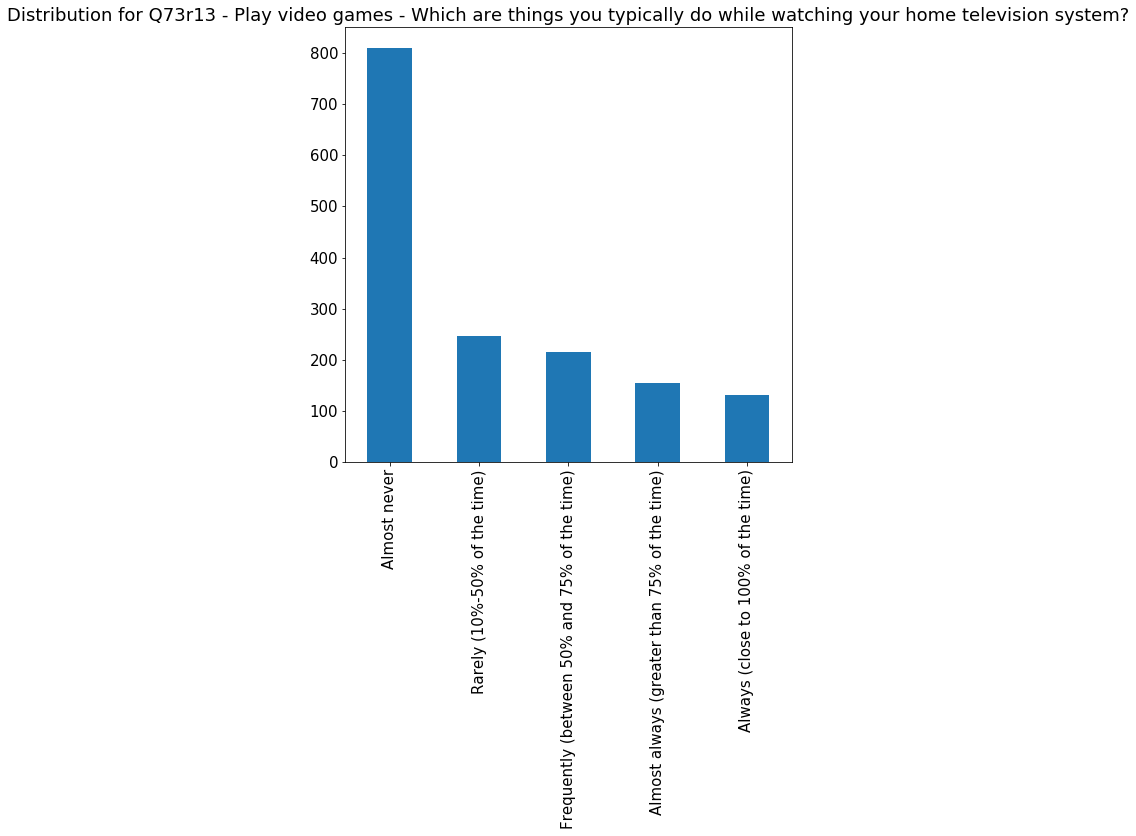

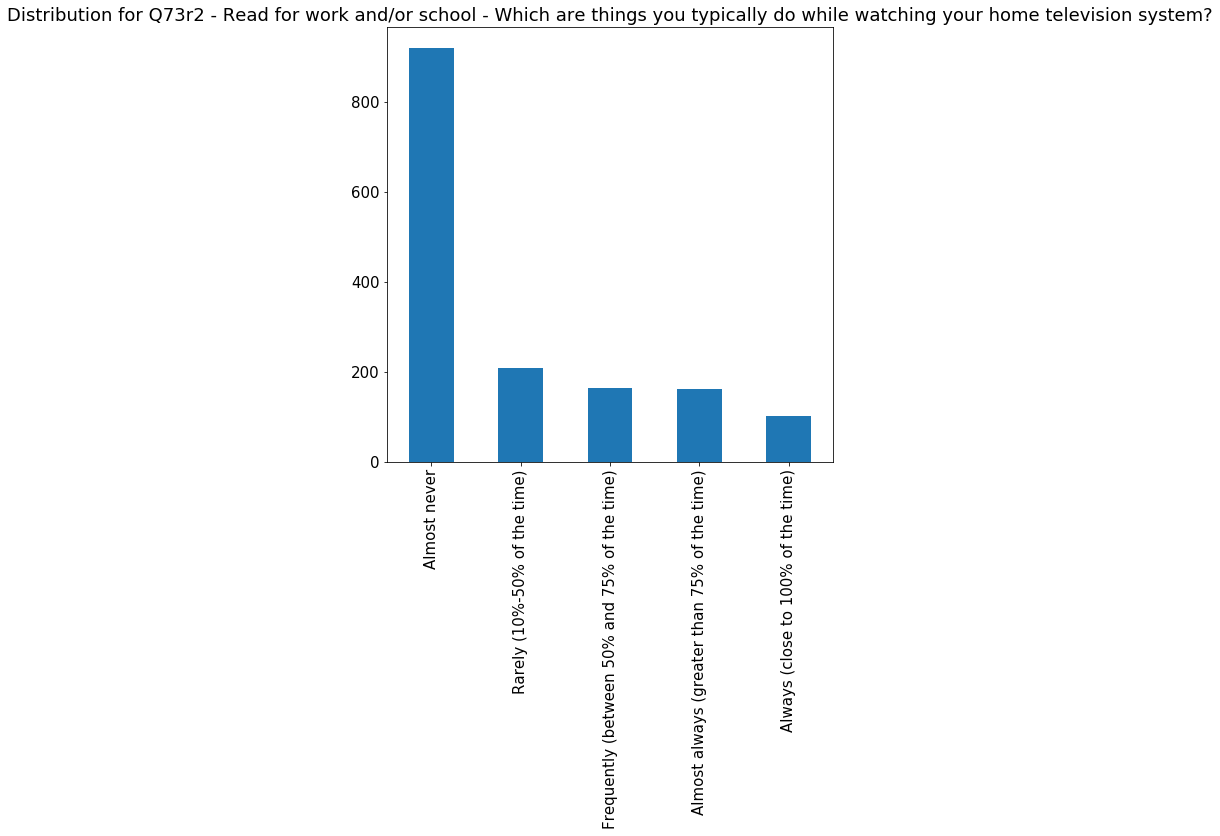

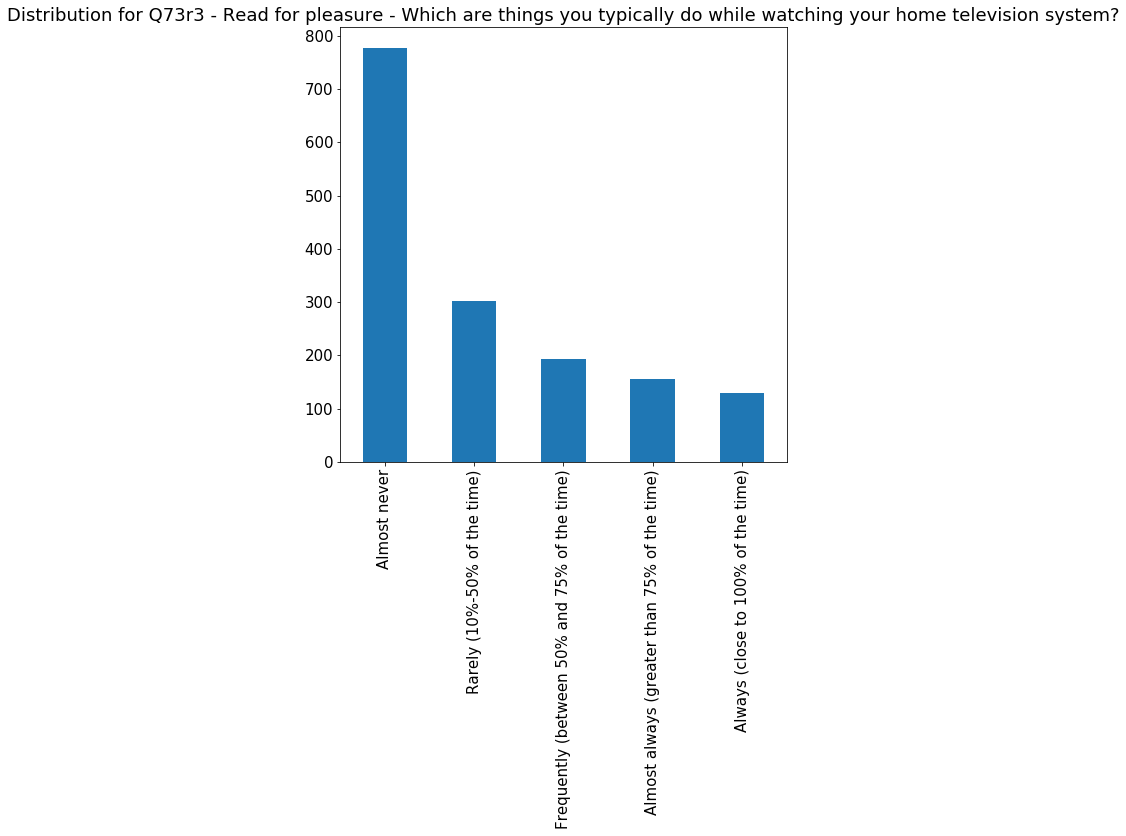

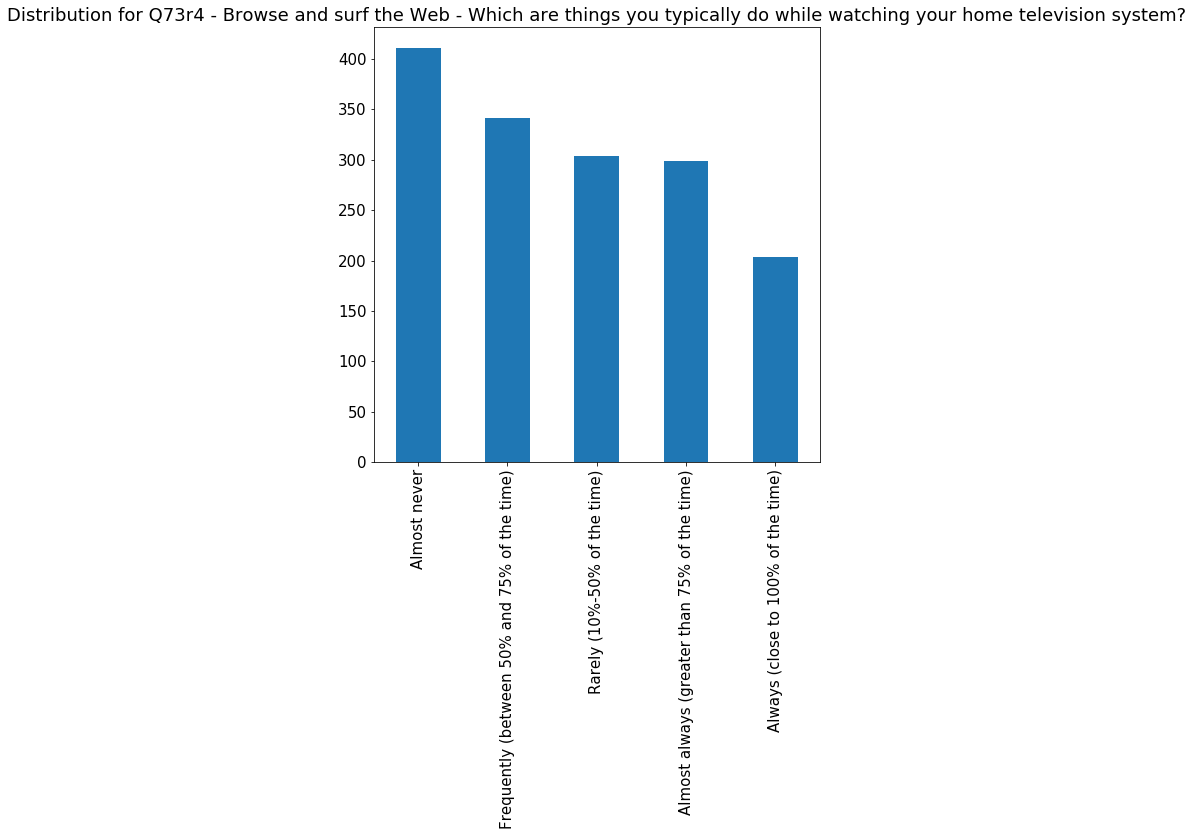

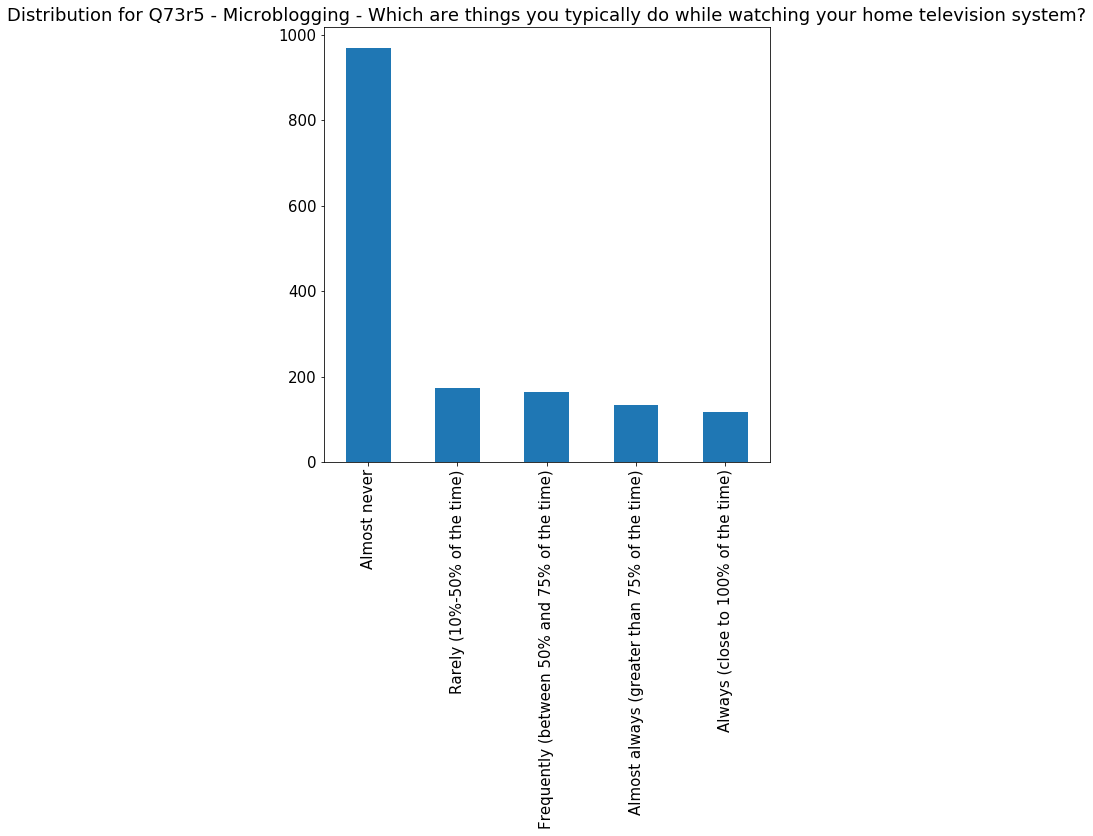

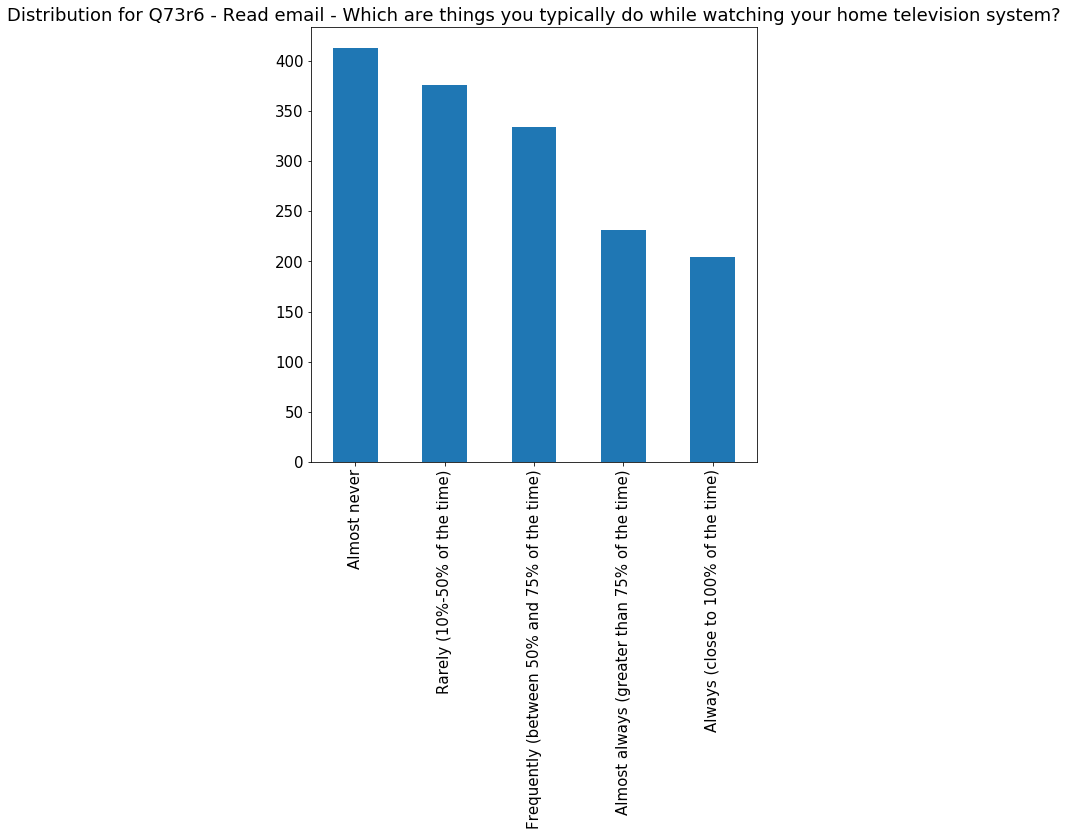

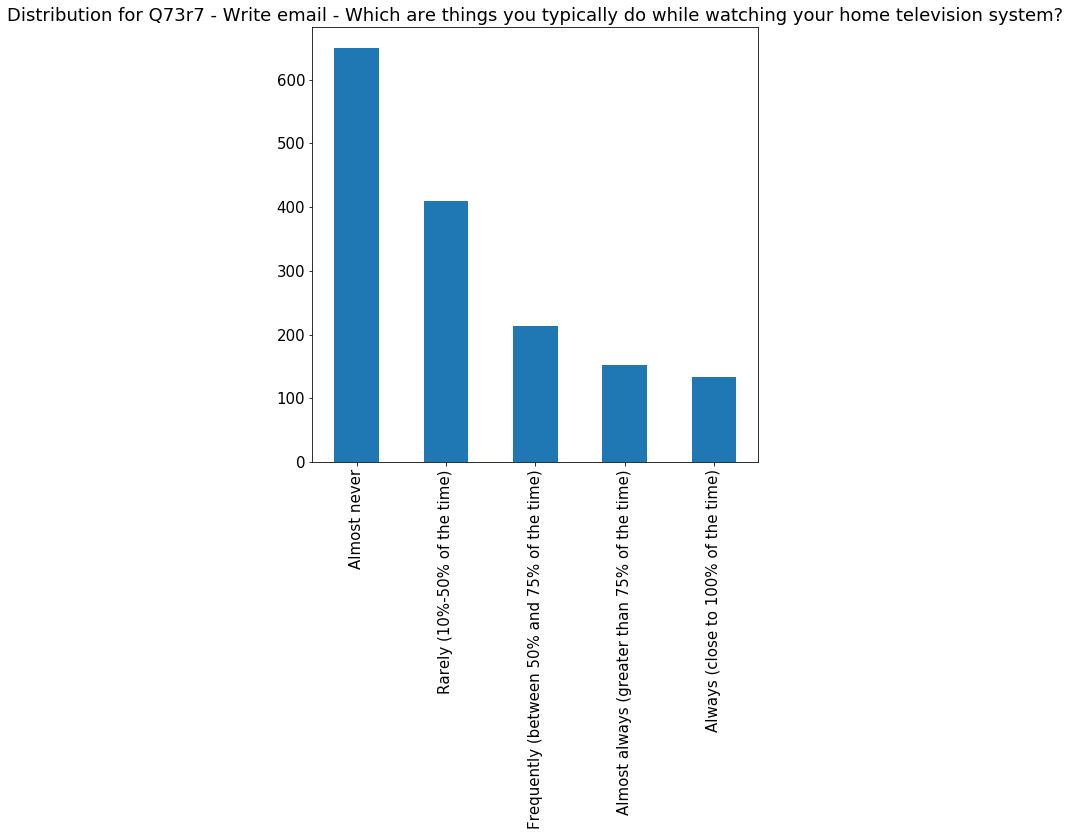

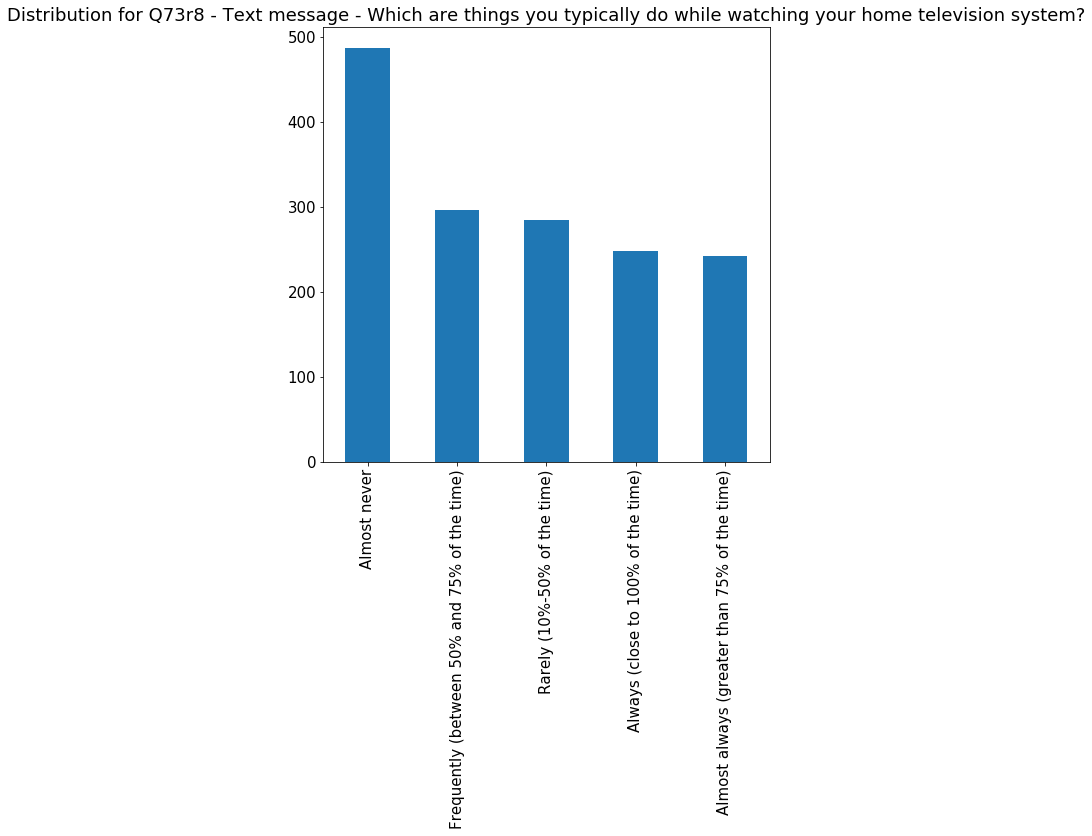

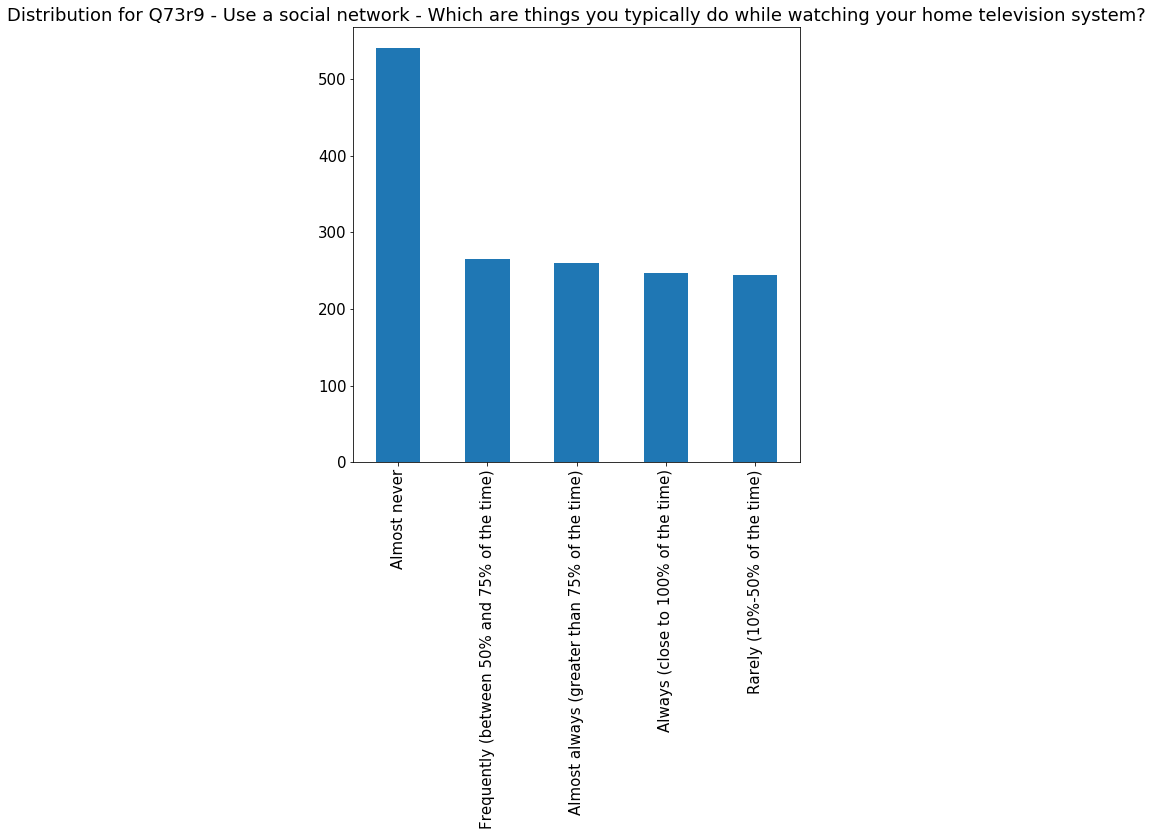

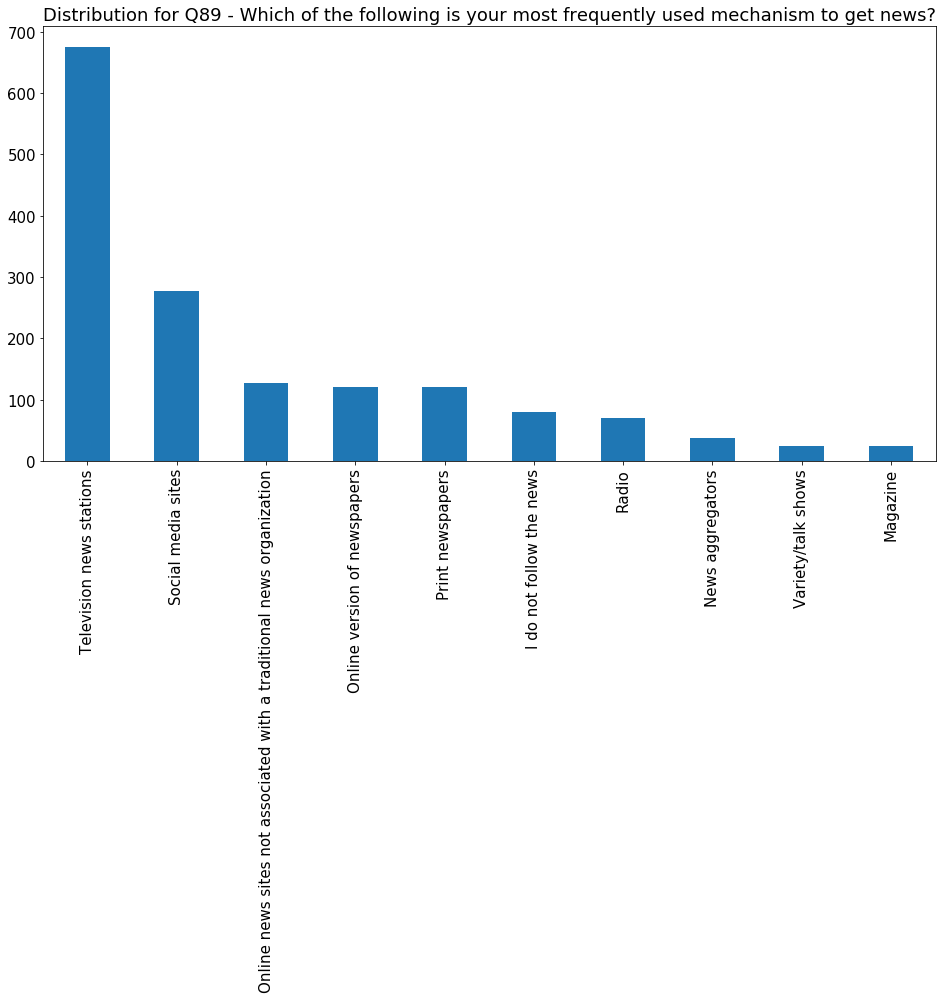

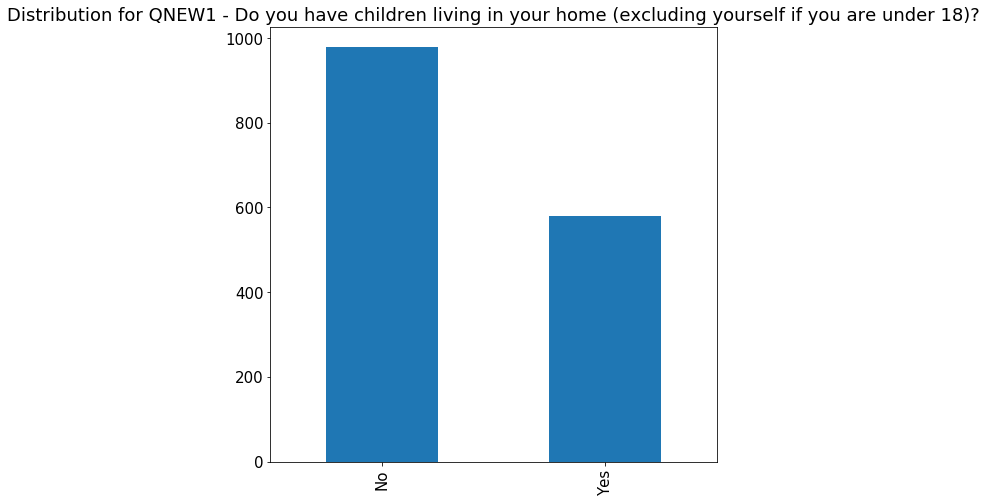

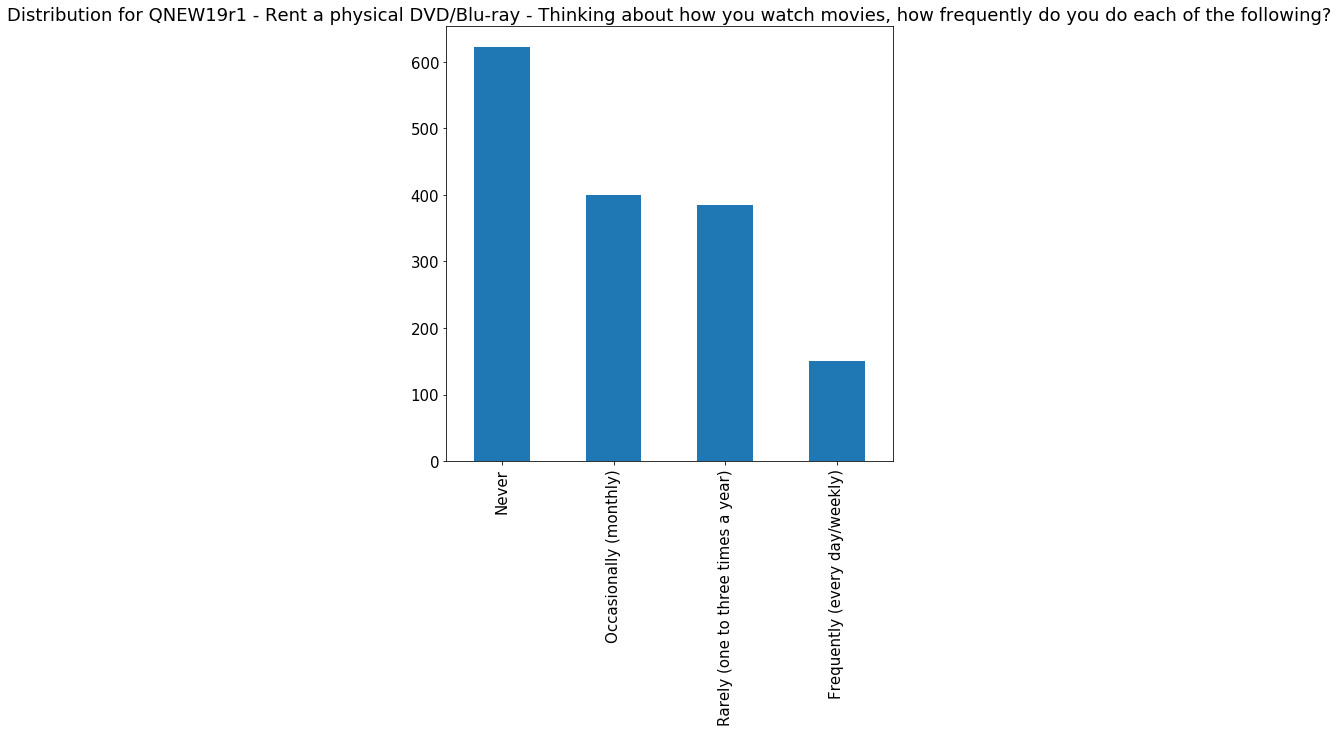

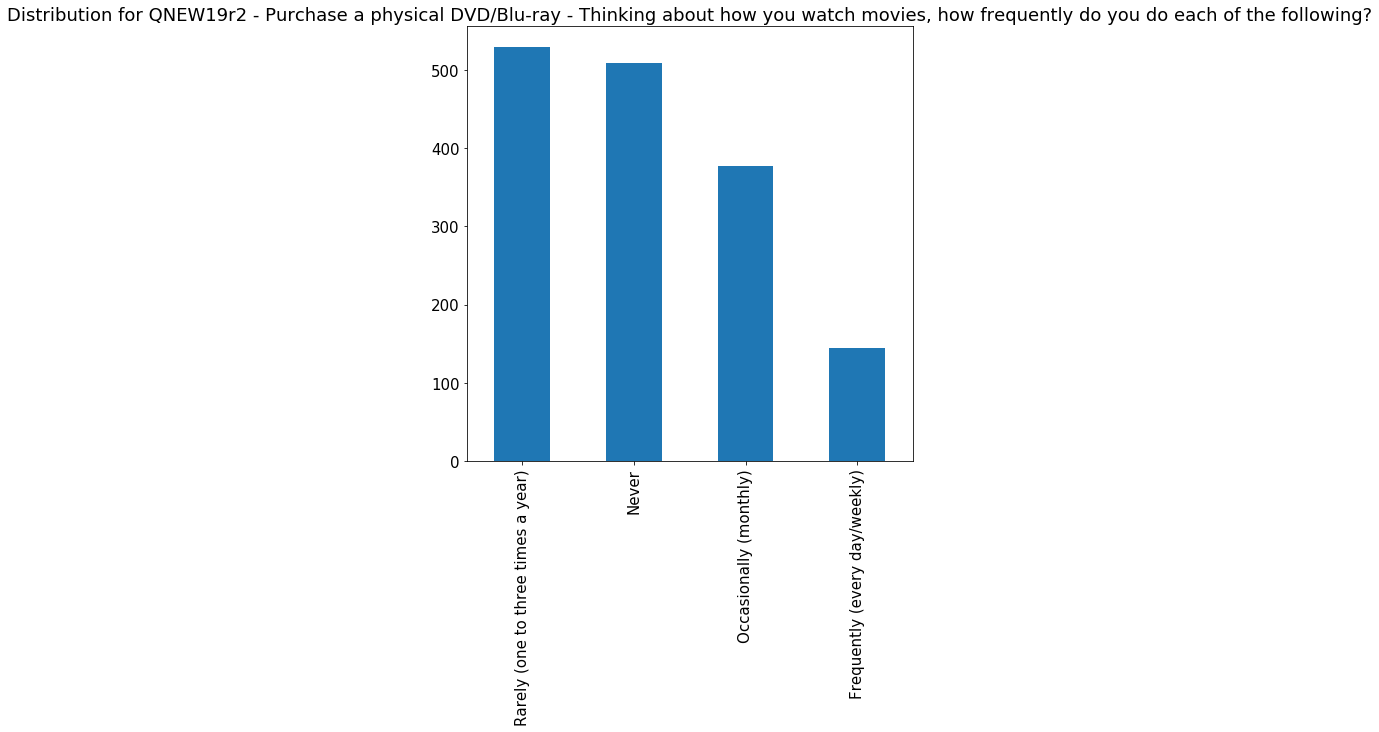

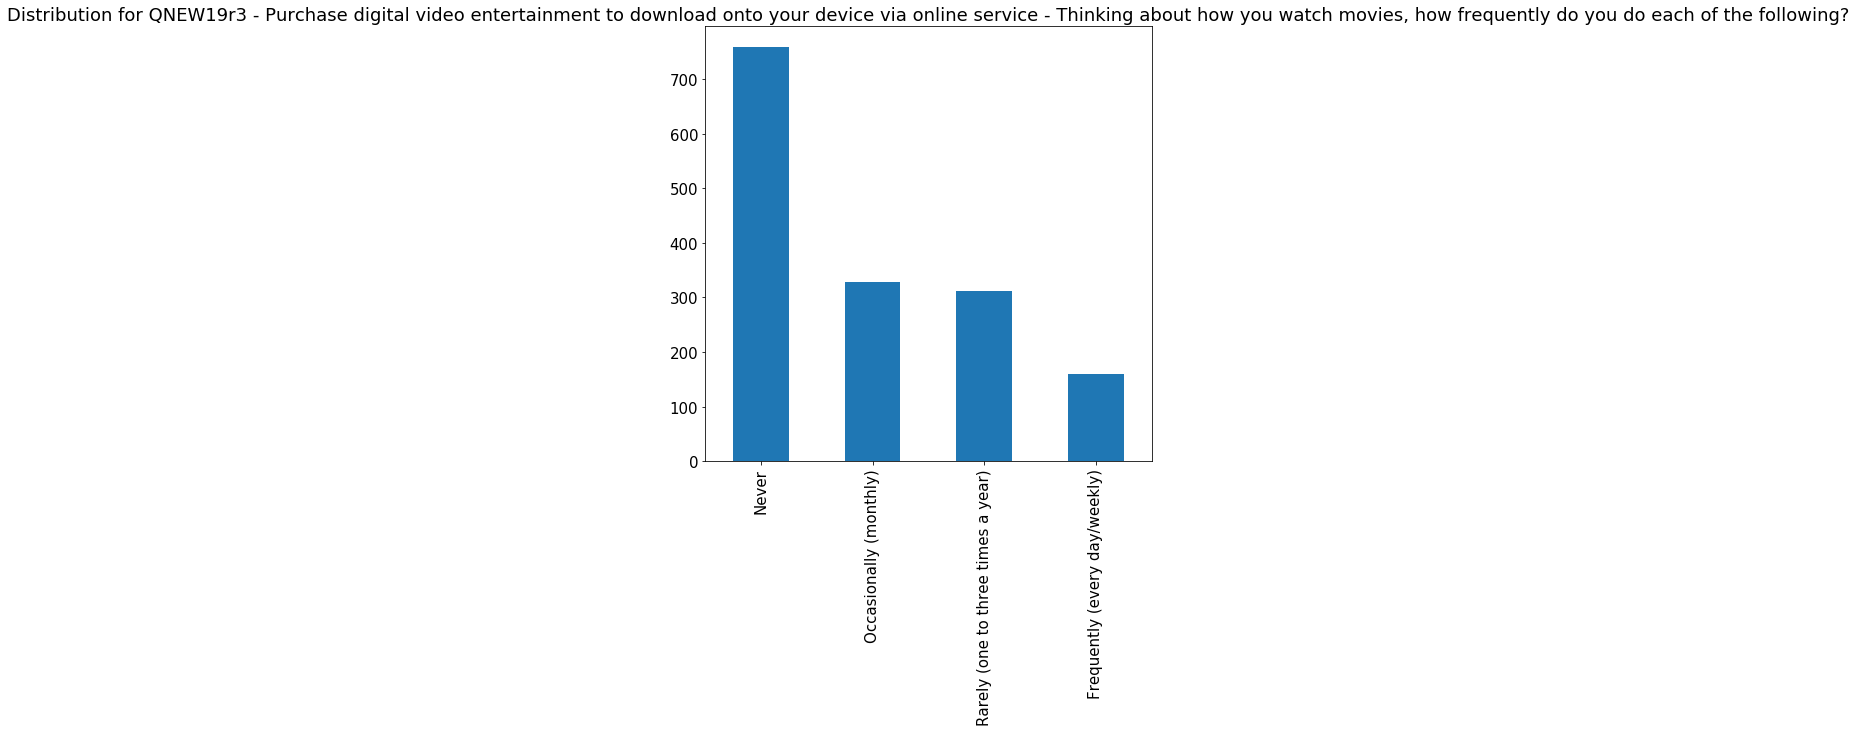

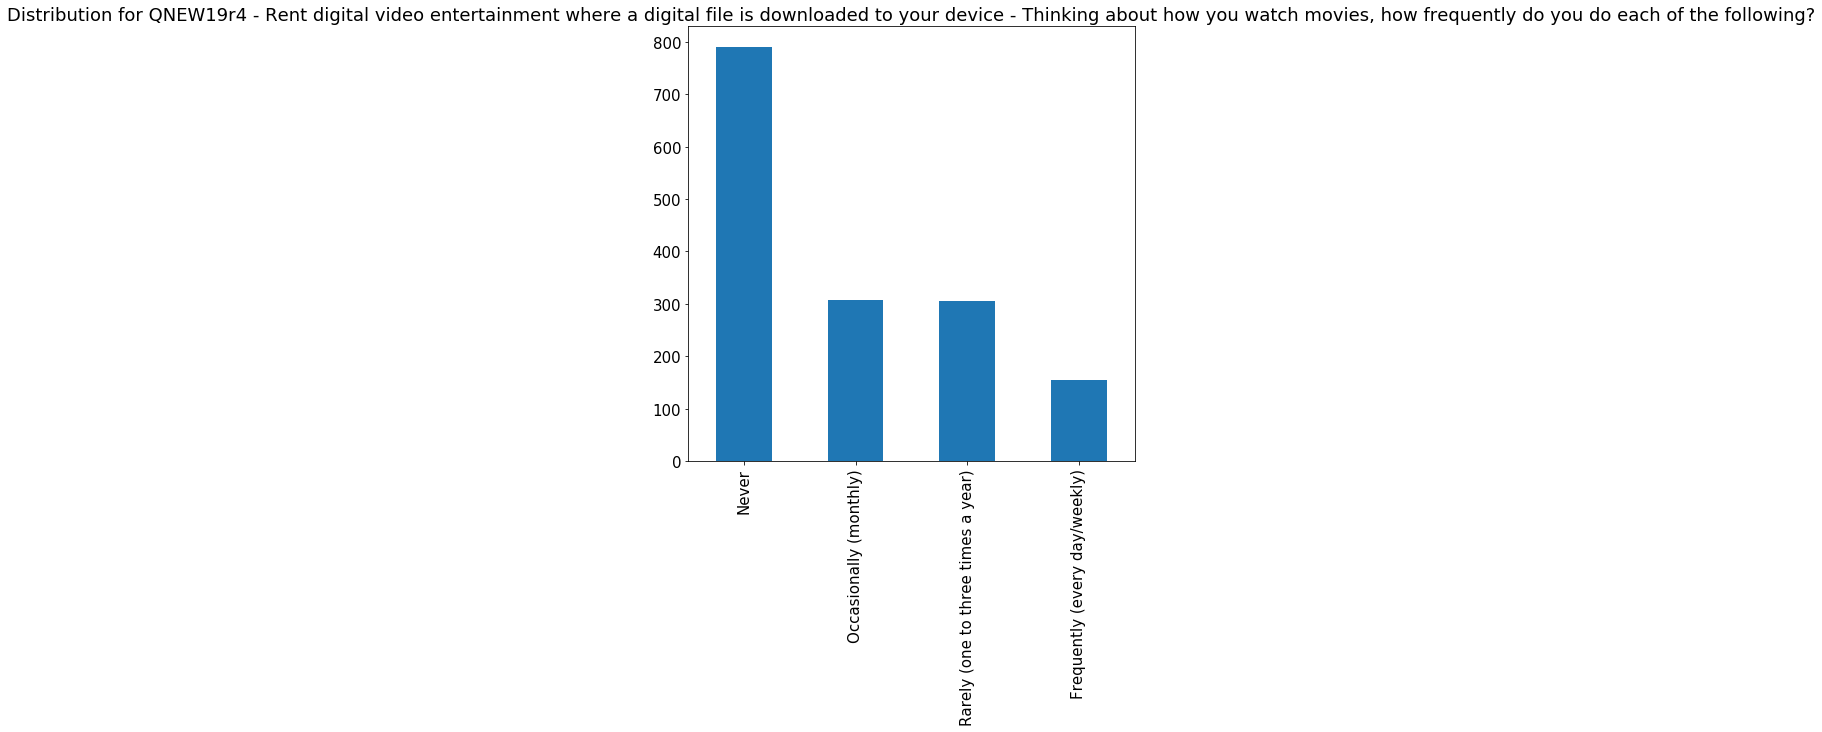

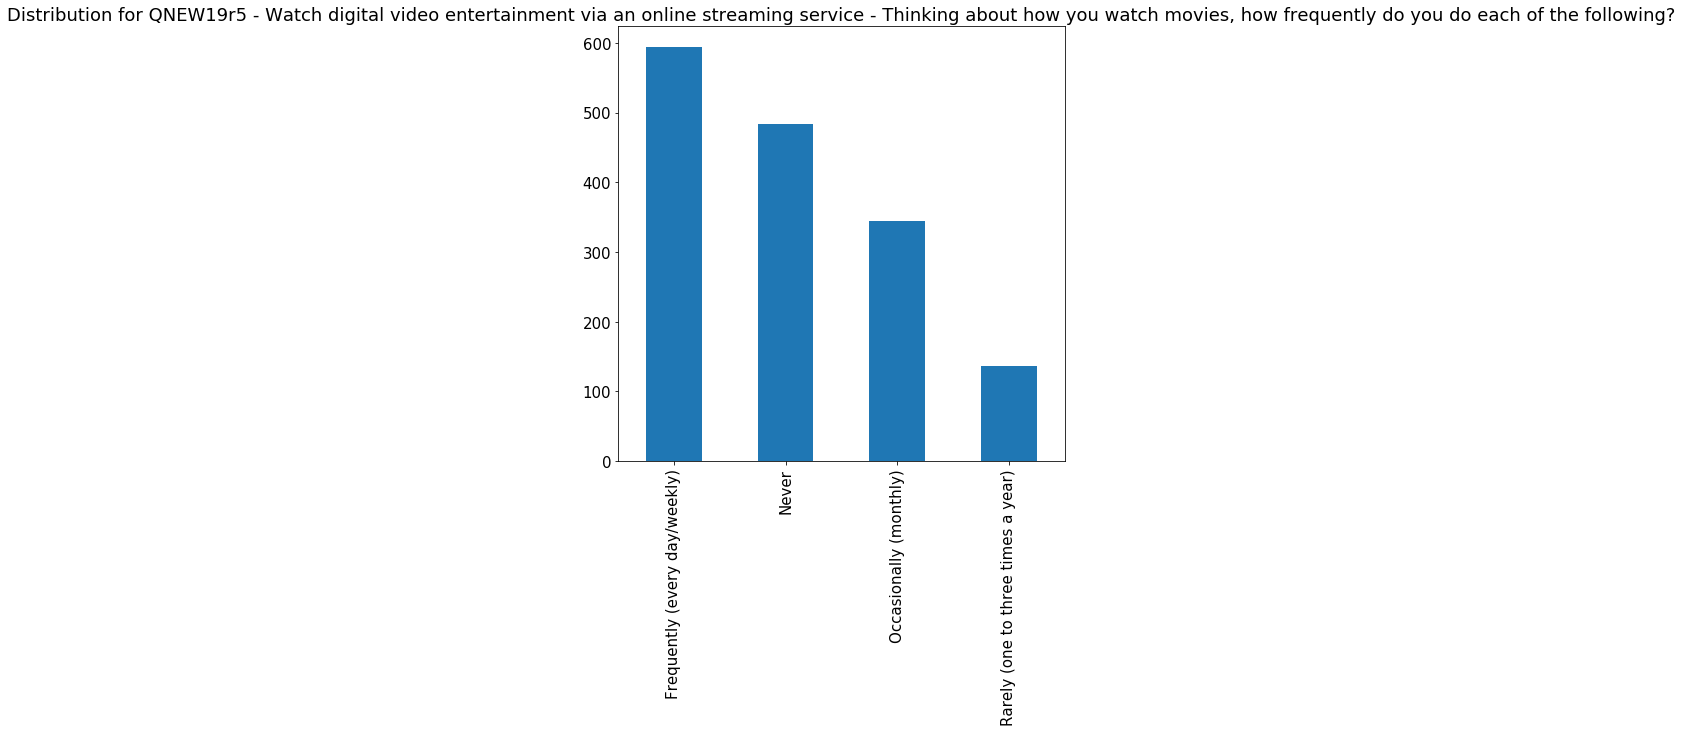

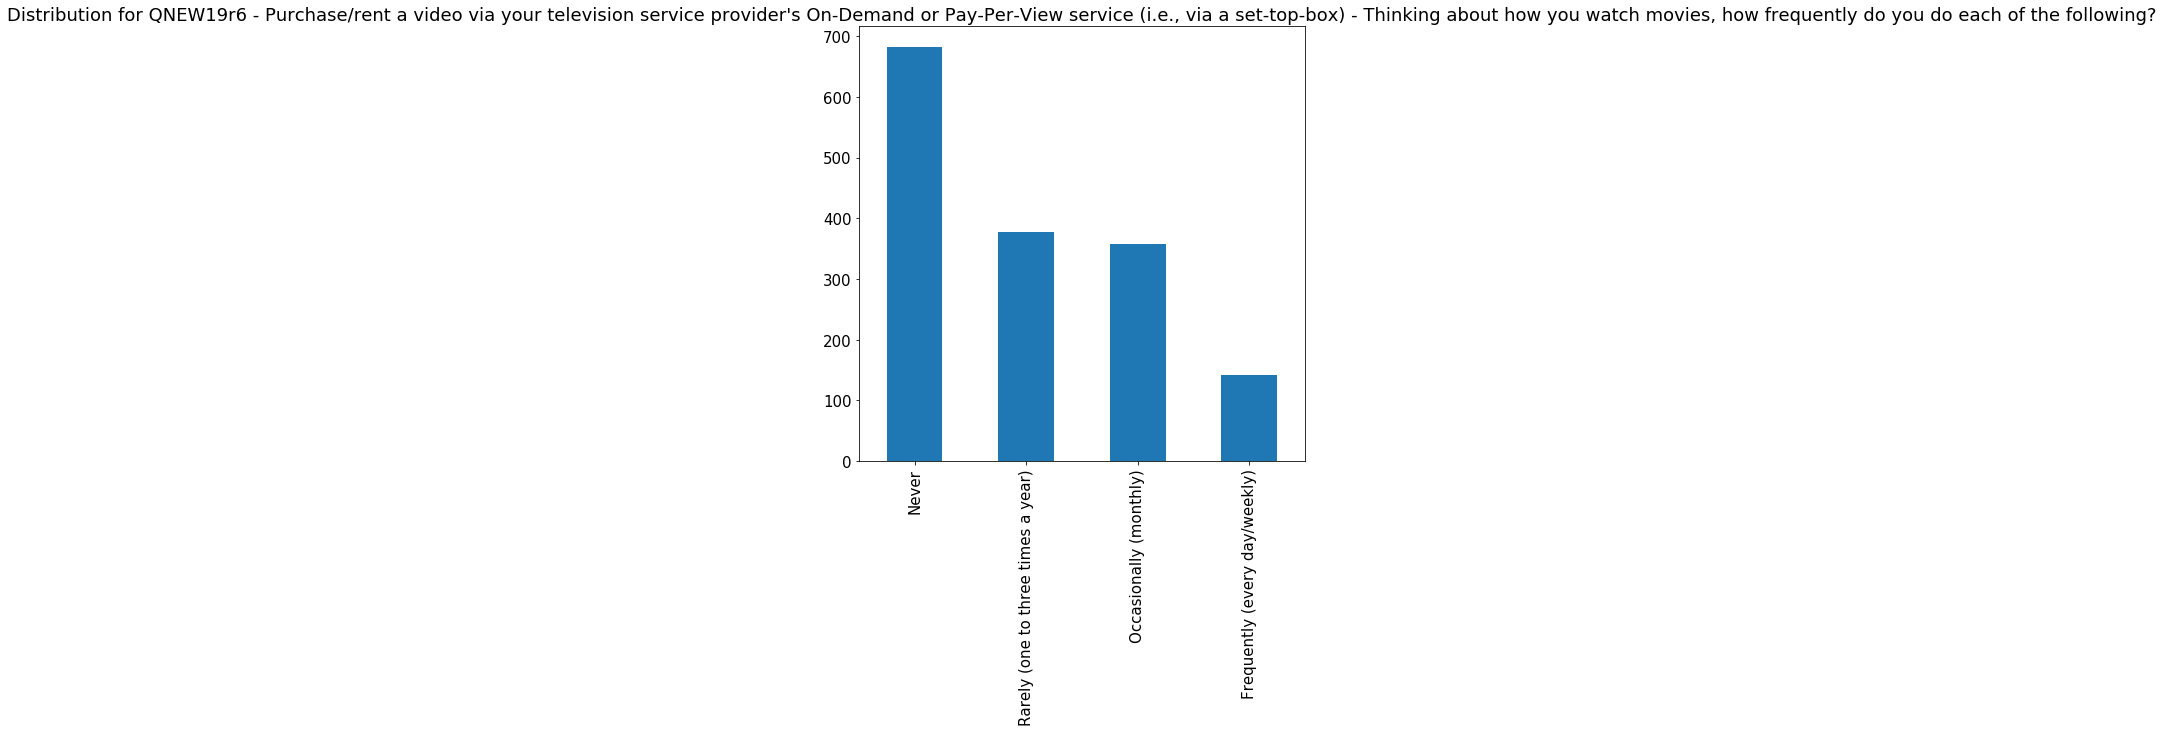

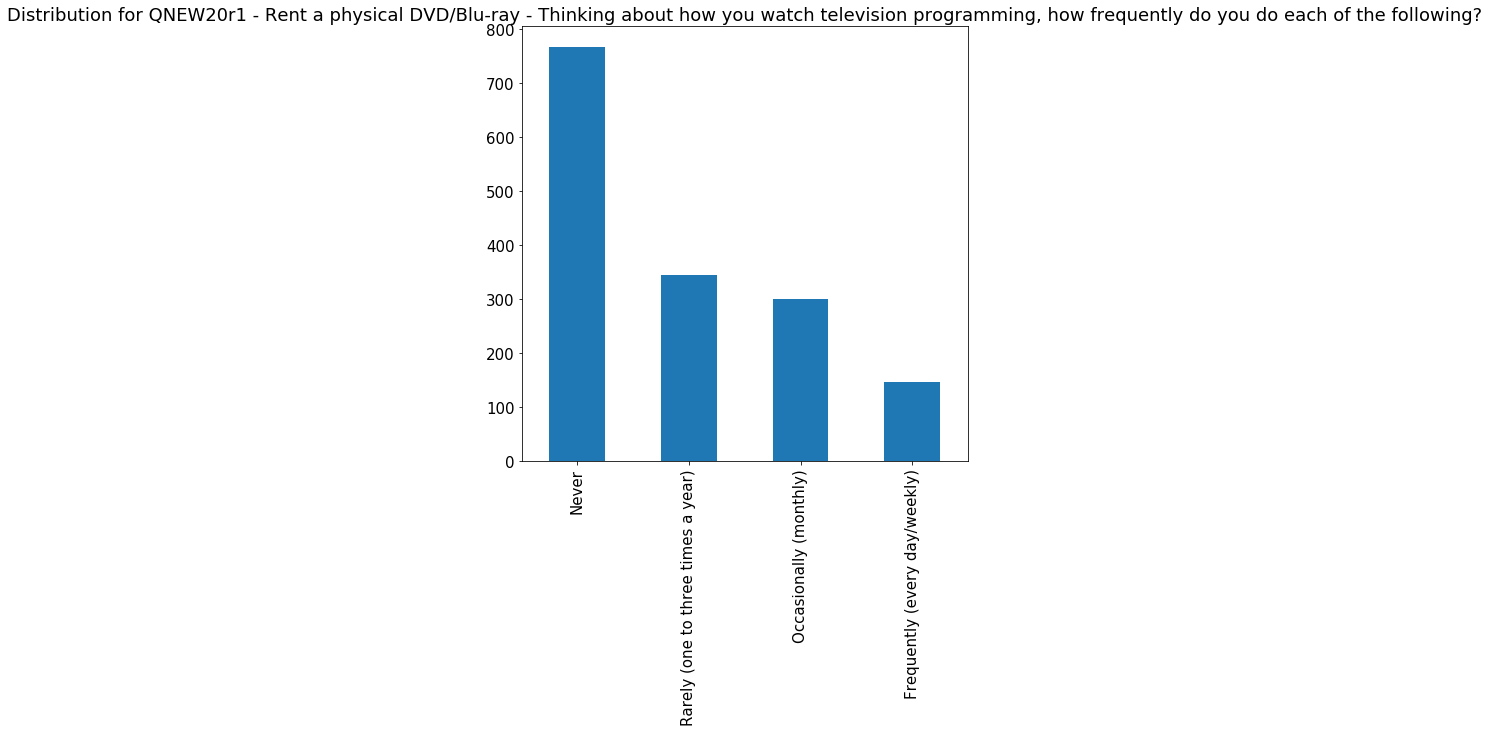

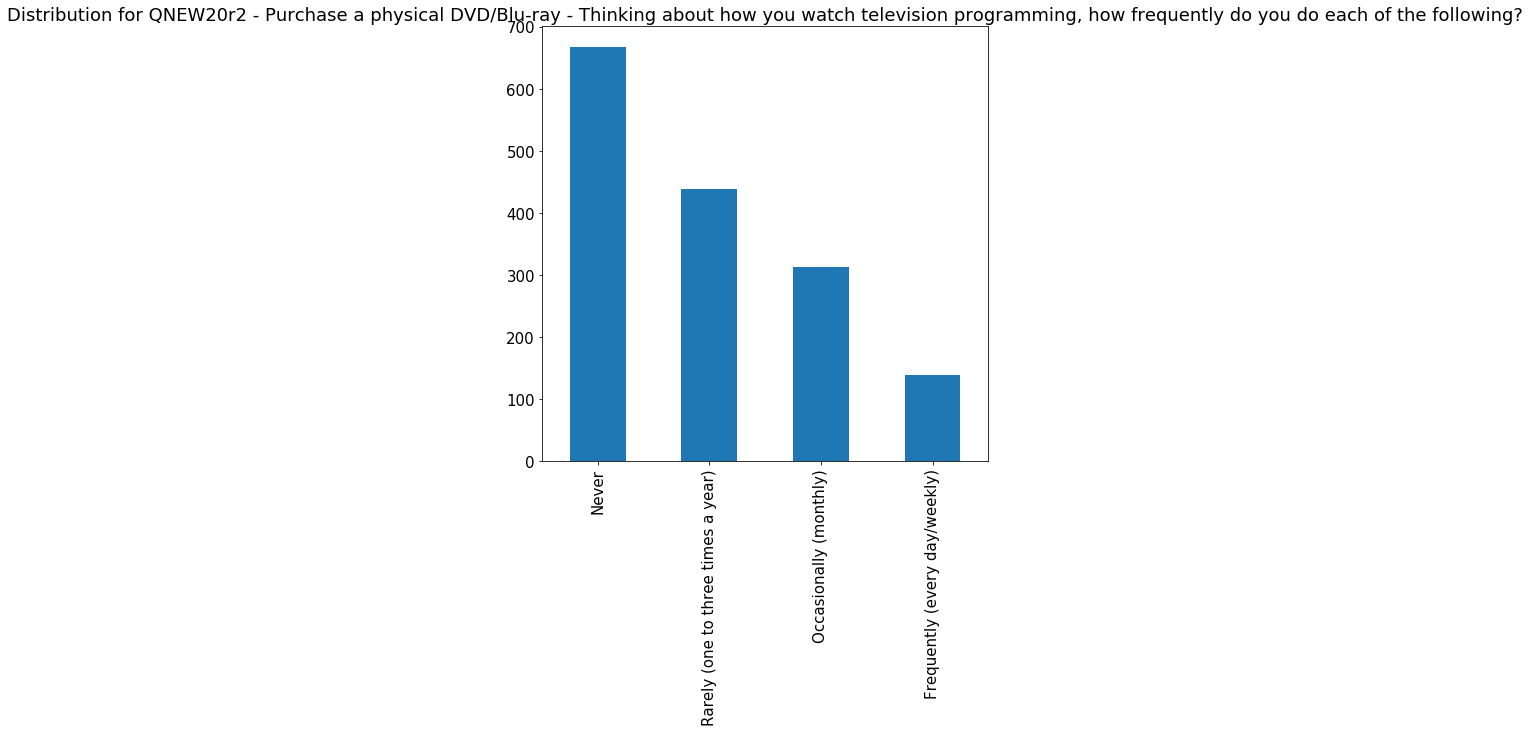

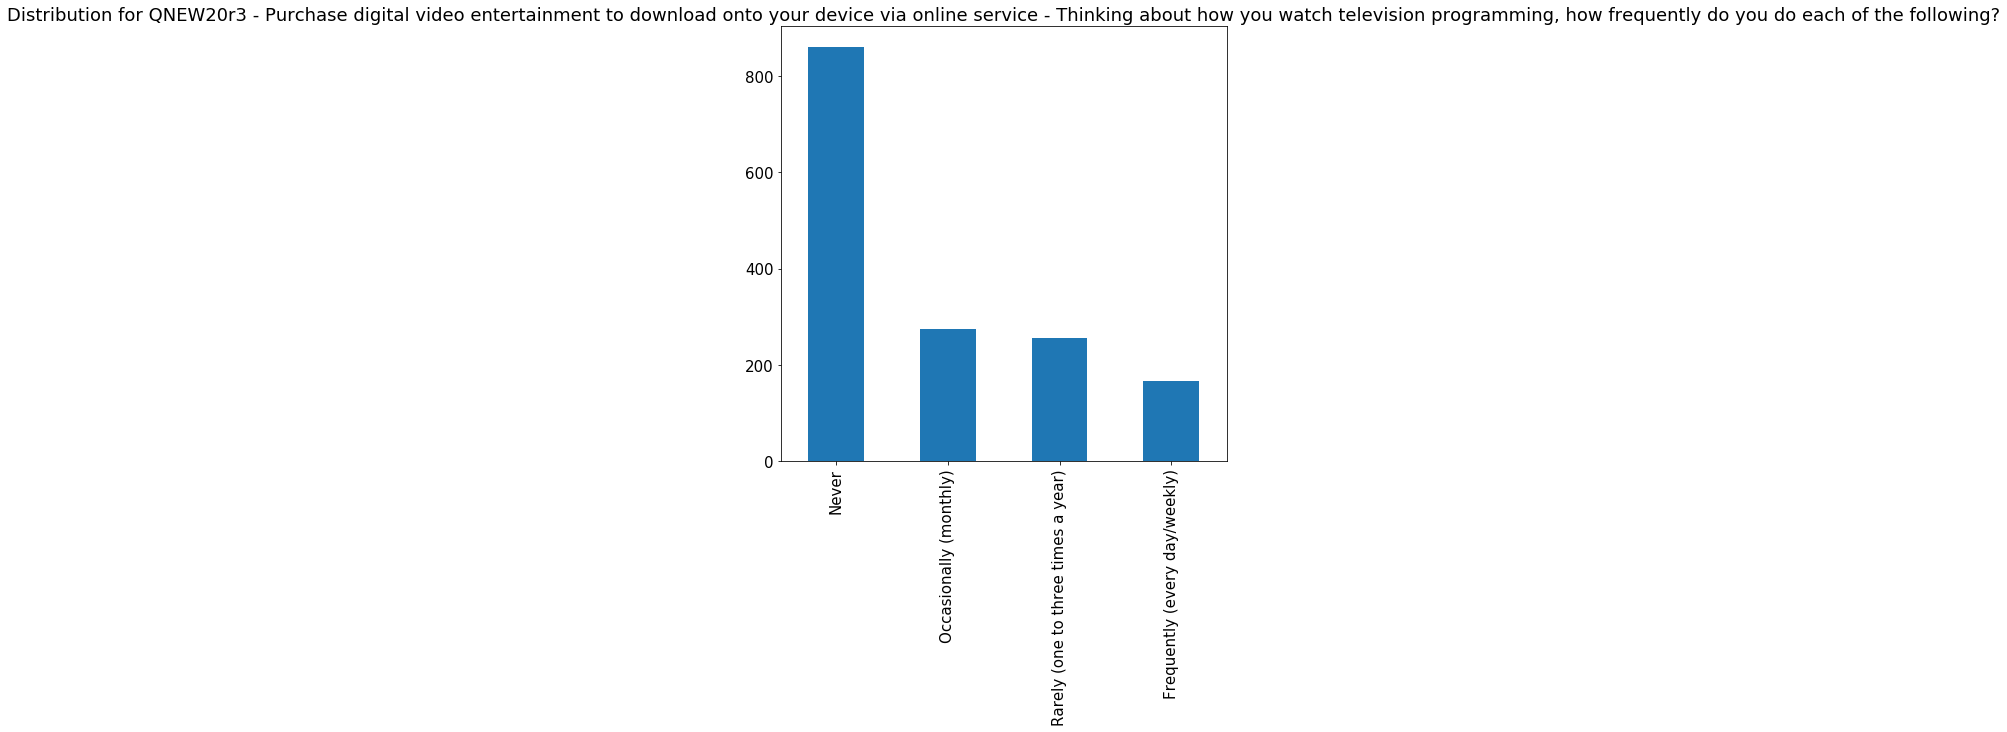

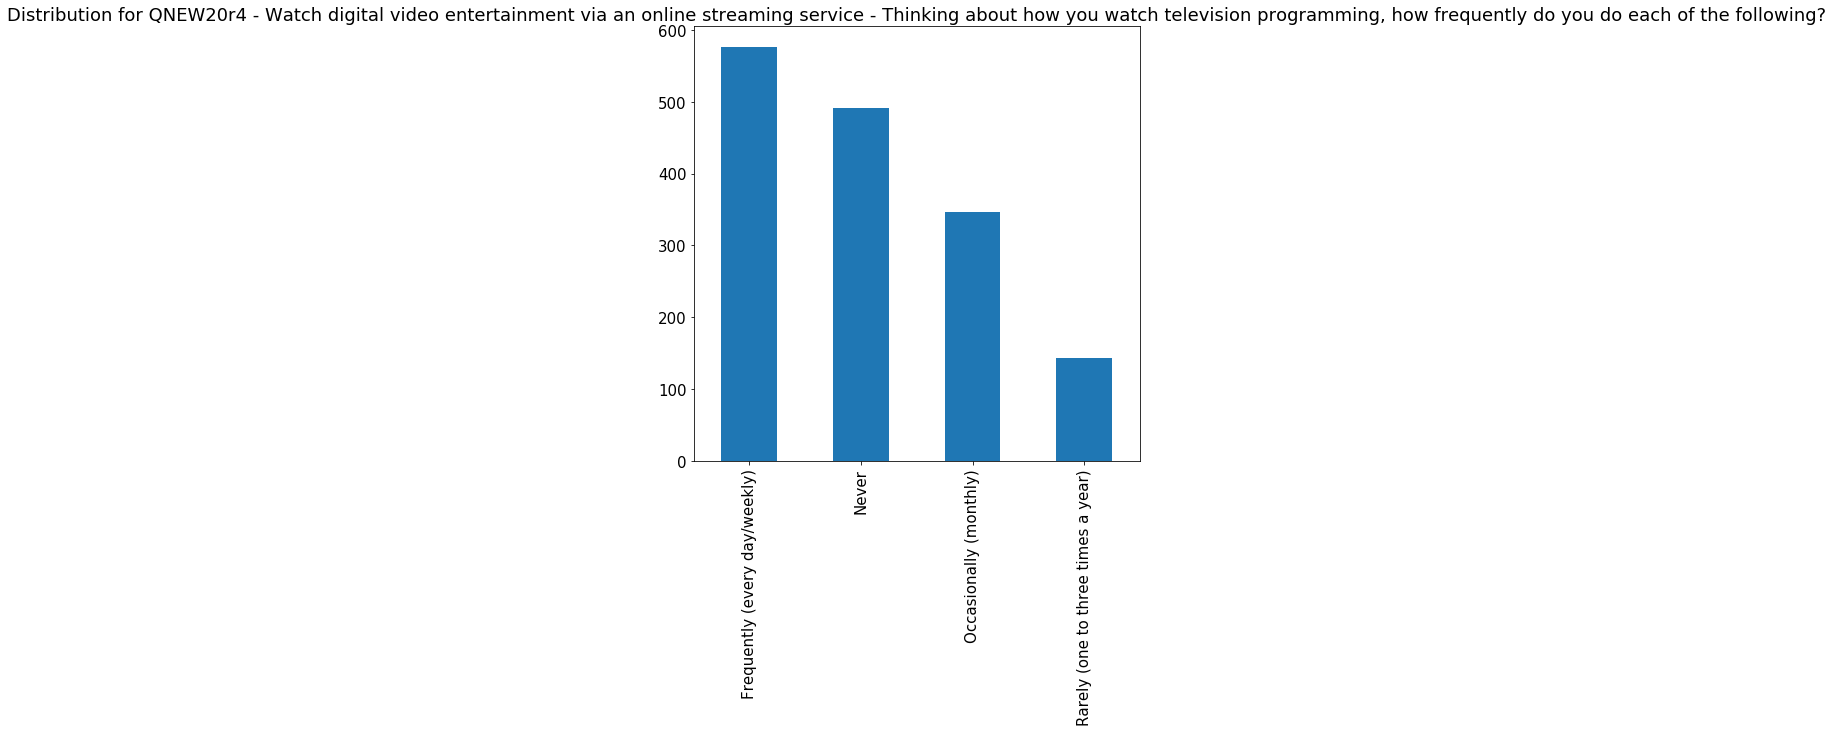

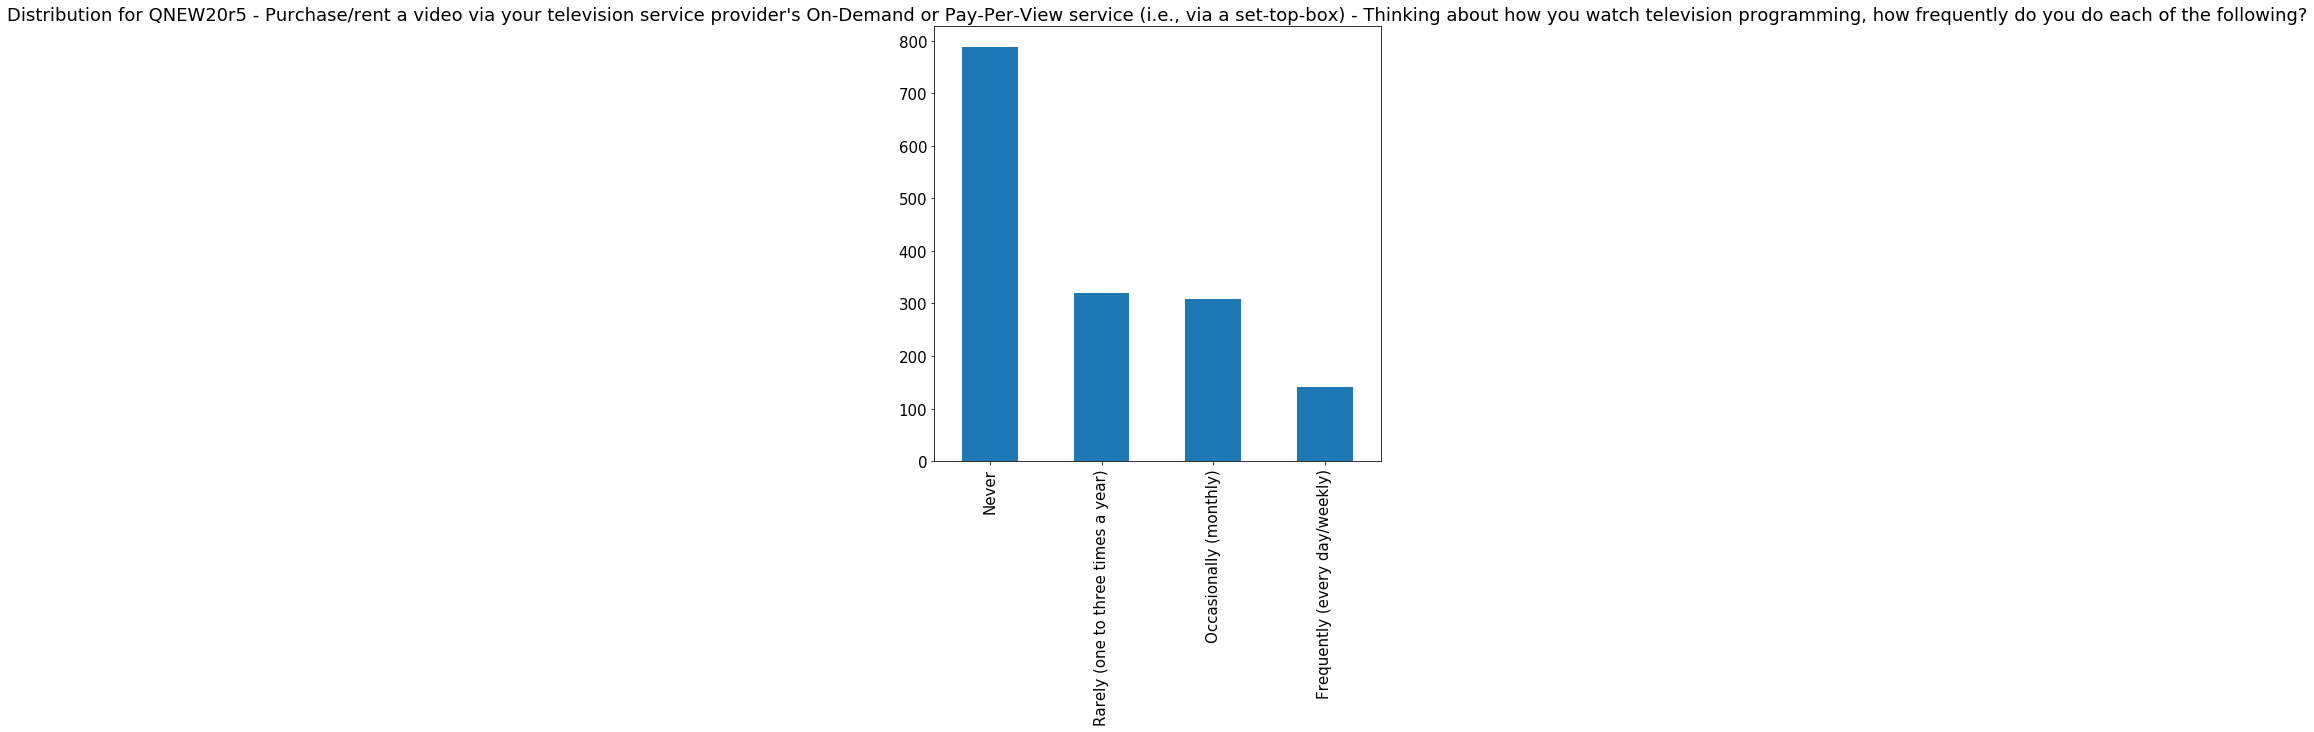

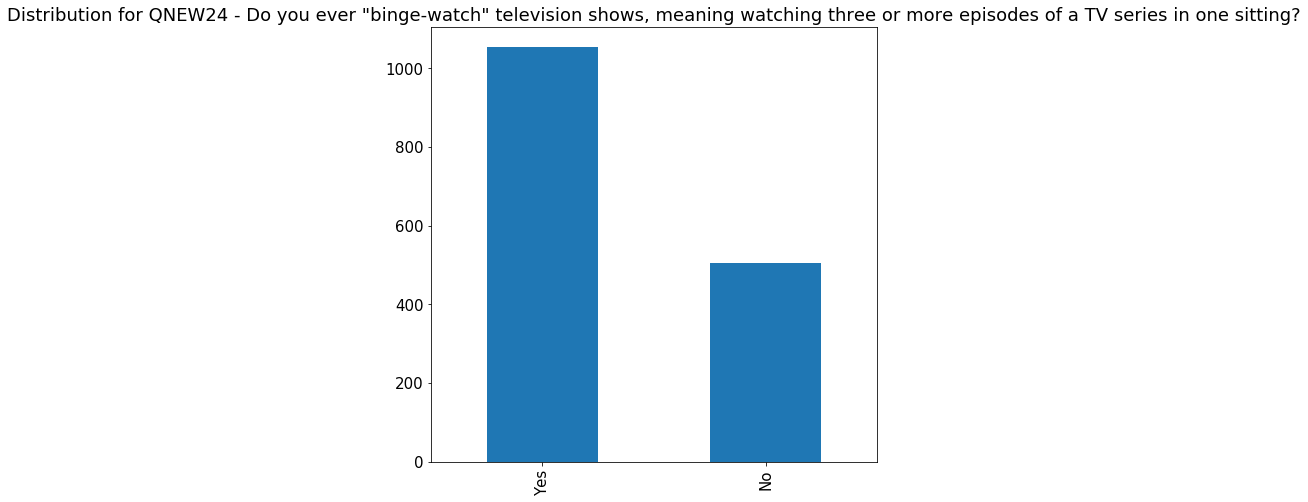

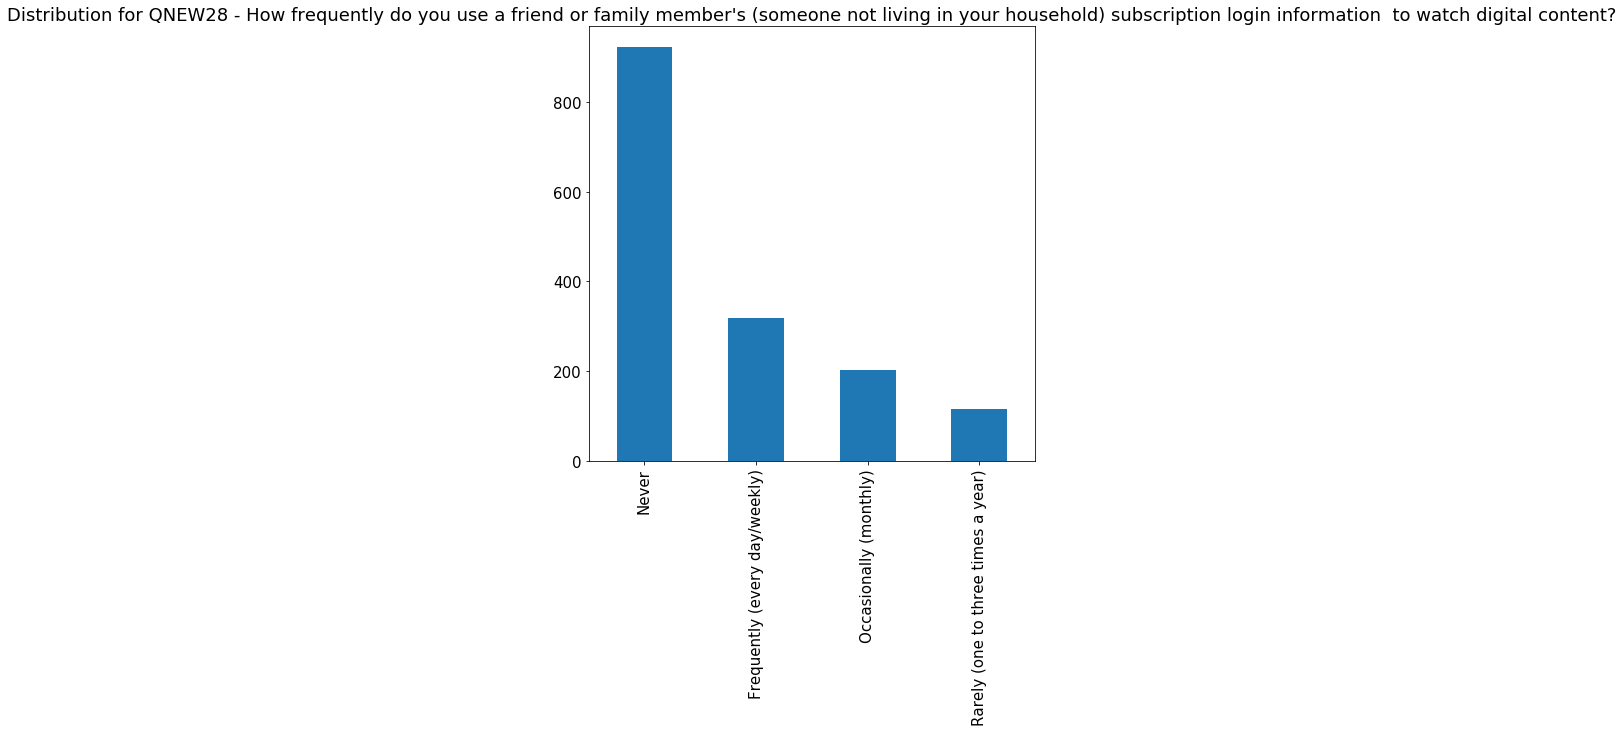

In [118]:
# select the columns to plot
cols_to_plot = ['Q11r10 - Laptop computer - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking each item in the order you wish to rank.  The fir',
 'Q11r15 - Smartphone - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking each item in th',
 'Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?',
 'Q36r1 - Pay TV (traditional cable and/or satellite bundle) - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking',
 'Q36r2 - Home internet - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking each item in the order you wish to r',
 'Q37r10 - Using the Internet for social or personal interests - For the following types of entertainment activities, please rank your top three, with "1" being the most preferred.Please rank the top three, with â€œ1â€\x9d being the most preferred. Make your se',
 'Q37r3 - Watching television (video content on any device) - For the following types of entertainment activities, please rank your top three, with "1" being the most preferred.Please rank the top three, with â€œ1â€\x9d being the most preferred. Make your selec',
 'Q39r1 - I would rather pay for news online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose "N/A."',
 'Q39r2 - I would be willing to provide more personal information online if that meant I could receive advertising more targeted to my needs and interests. - Using the scale below, please indicate how much you agree or disagree with the following statements.',
 'Q39r3 - By providing more personal information online, I am worried about becoming a victim of identity theft. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, cho',
 'Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription.(e.g., reduced subscription cost by 25%) - Using the scale below, please indicate how much you agree or disagree wit',
 'Q39rNEW1 - I would rather pay for sports information online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, c',
 'Q39rNEW2 - I would rather pay for games online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose "N/A."',
 'Q39rNEW3 - I would rather pay for music online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose "N/A."',
 'Q39rNEW4 - I would rather pay for TV shows online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose "N/A',
 'Q39rNEW5 - I would rather pay for movies online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose "N/A."',
 'Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.',
 'Q73r10 - Talk on the phone - Which are things you typically do while watching your home television system?',
 'Q73r11 - Browse for products and services online - Which are things you typically do while watching your home television system?',
 'Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?',
 'Q73r13 - Play video games - Which are things you typically do while watching your home television system?',
 'Q73r2 - Read for work and/or school - Which are things you typically do while watching your home television system?',
 'Q73r3 - Read for pleasure - Which are things you typically do while watching your home television system?',
 'Q73r4 - Browse and surf the Web - Which are things you typically do while watching your home television system?',
 'Q73r5 - Microblogging - Which are things you typically do while watching your home television system?',
 'Q73r6 - Read email - Which are things you typically do while watching your home television system?',
 'Q73r7 - Write email - Which are things you typically do while watching your home television system?',
 'Q73r8 - Text message - Which are things you typically do while watching your home television system?',
 'Q73r9 - Use a social network - Which are things you typically do while watching your home television system?',
 'Q89 - Which of the following is your most frequently used mechanism to get news?',
 'QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?',
 'QNEW19r1 - Rent a physical DVD/Blu-ray - Thinking about how you watch movies, how frequently do you do each of the following?',
 'QNEW19r2 - Purchase a physical DVD/Blu-ray - Thinking about how you watch movies, how frequently do you do each of the following?',
 'QNEW19r3 - Purchase digital video entertainment to download onto your device via online service - Thinking about how you watch movies, how frequently do you do each of the following?',
 'QNEW19r4 - Rent digital video entertainment where a digital file is downloaded to your device - Thinking about how you watch movies, how frequently do you do each of the following?',
 'QNEW19r5 - Watch digital video entertainment via an online streaming service - Thinking about how you watch movies, how frequently do you do each of the following?',
 "QNEW19r6 - Purchase/rent a video via your television service provider's On-Demand or Pay-Per-View service (i.e., via a set-top-box) - Thinking about how you watch movies, how frequently do you do each of the following?",
 'QNEW20r1 - Rent a physical DVD/Blu-ray - Thinking about how you watch television programming, how frequently do you do each of the following?',
 'QNEW20r2 - Purchase a physical DVD/Blu-ray - Thinking about how you watch television programming, how frequently do you do each of the following?',
 'QNEW20r3 - Purchase digital video entertainment to download onto your device via online service - Thinking about how you watch television programming, how frequently do you do each of the following?',
 'QNEW20r4 - Watch digital video entertainment via an online streaming service - Thinking about how you watch television programming, how frequently do you do each of the following?',
 "QNEW20r5 - Purchase/rent a video via your television service provider's On-Demand or Pay-Per-View service (i.e., via a set-top-box) - Thinking about how you watch television programming, how frequently do you do each of the following?",
 'QNEW24 - Do you ever "binge-watch" television shows, meaning watching three or more episodes of a TV series in one sitting?',
 "QNEW28 - How frequently do you use a friend or family member's (someone not living in your household) subscription login information  to watch digital content?"]

for name in cols_to_plot:
    if -999 in df_cat[name].unique():
        df_filtered = df_cat[df_cat[name] != -999]
        plt.figure(figsize=(16, 8) if len(df_filtered[name].unique()) > 5 else (8, 8))
        df_filtered[name].value_counts().plot(kind='bar')
    else:
        plt.figure(figsize=(16, 8) if len(df_cat[name].unique()) > 5 else (8, 8))
        df_cat[name].value_counts().plot(kind='bar')
    plt.title('Distribution for '+str(name))
    plt.show()

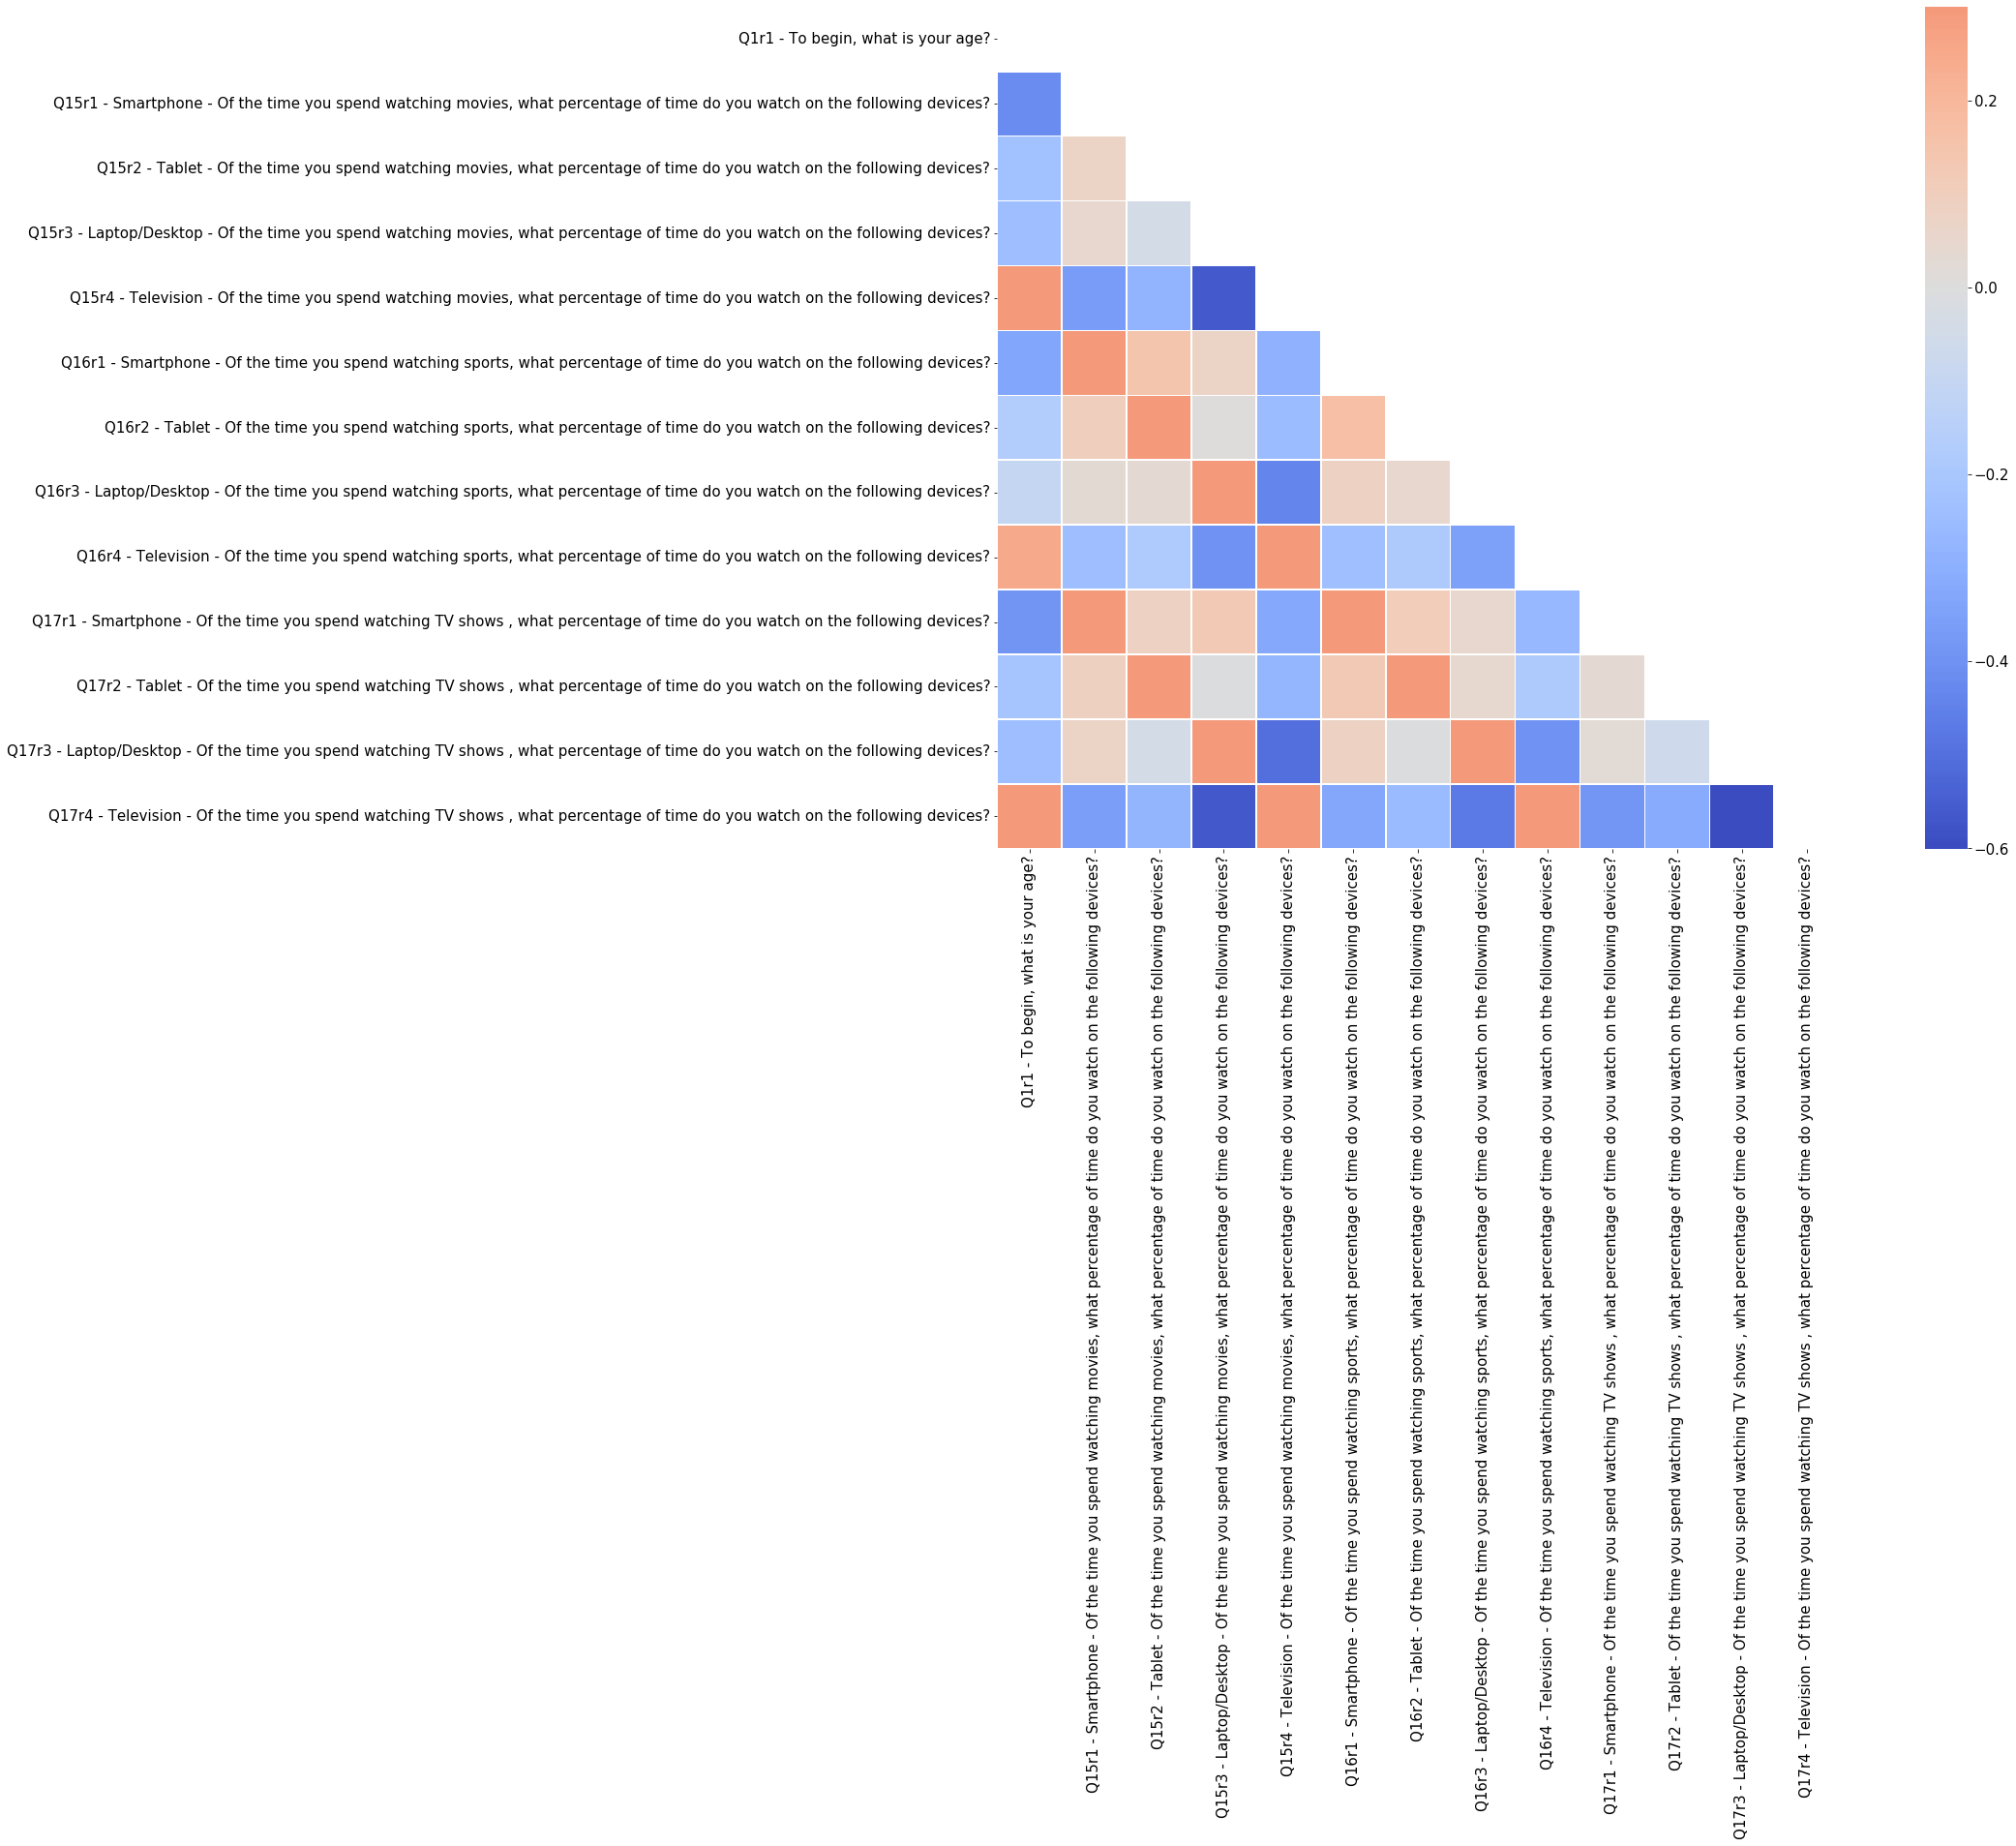

In [119]:
# generating a correlation heatmap
plt.figure(figsize=(32,16))

# calculating the correlation matrix for numerical columns
corr = df_num.astype(float).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5)
plt.show()

# Bivariate analysis of features vs the target variable

In [120]:
# treating the target variable column: for ones indicate willing to pay more amount, we treat them as yes - 1 and the rest as no - 0
internet_df['Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?'].unique()

array(['I am willing to pay $20 per month on top of what I already pay',
       'I am willing to pay $5 per month on top of what I already pay',
       'I am willing to pay $10 per month on top of what I already pay',
       'I prefer faster speed but I am unwilling to pay more than I already do',
       'I am not willing to pay more for faster download speeds as my current speed is sufficient for my needs',
       'I am willing to pay $30 or more per month on top of what I already pay'],
      dtype=object)

In [121]:
# replacing yes with 1 and no with 0
internet_df['Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?'].replace({'I am willing to pay $20 per month on top of what I already pay':1,'I am willing to pay $5 per month on top of what I already pay':1,'I am willing to pay $10 per month on top of what I already pay':1,'I am willing to pay $30 or more per month on top of what I already pay':1,'I prefer faster speed but I am unwilling to pay more than I already do':0,'I am not willing to pay more for faster download speeds as my current speed is sufficient for my needs':0},inplace=True)

In [122]:
def plot_bar(df, feat_x, feat_y,colors,s,normalize=True):
    ct = pd.crosstab(df[feat_x], feat_y)
    return ct.plot(kind='bar', stacked=s,color=colors)

def plot_barh(df, feat_x, feat_y,colors,s,normalize=True):
    ct = pd.crosstab(df[feat_x], feat_y)
    return ct.plot(kind='barh', stacked=s,color=colors)

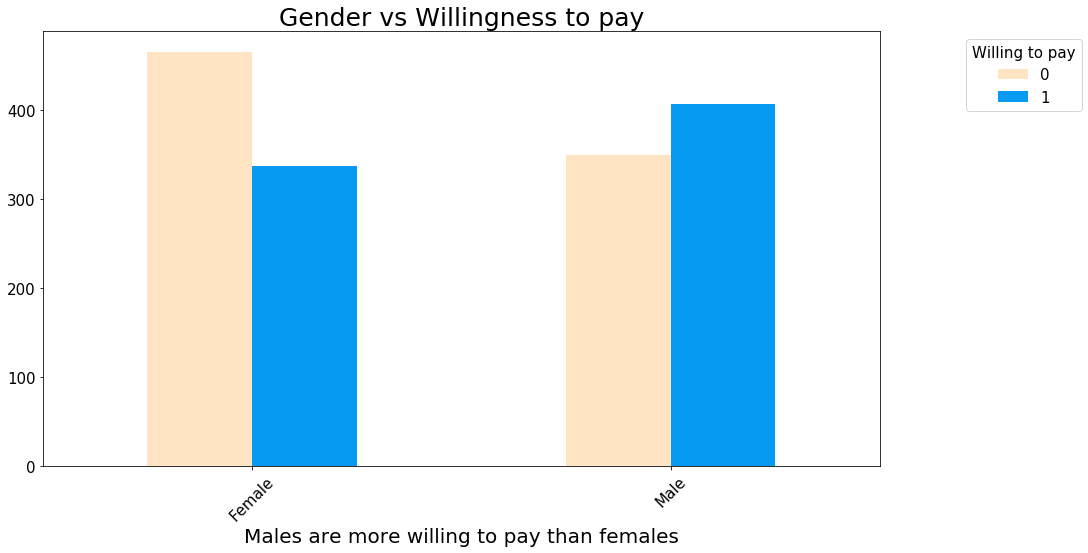

In [123]:
plot_bar(internet_df, 'Q4 - What is your gender?', internet_df.iloc[:,116,],["#FFE4C4","#069AF3"],False)
plt.legend(title='Willing to pay',loc='upper right',bbox_to_anchor=(1.25, 1))
plt.gcf().set_size_inches(15,8)
plt.xticks(rotation=45)
plt.title('Gender vs Willingness to pay', fontsize=25)
plt.xlabel('Males are more willing to pay than females', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

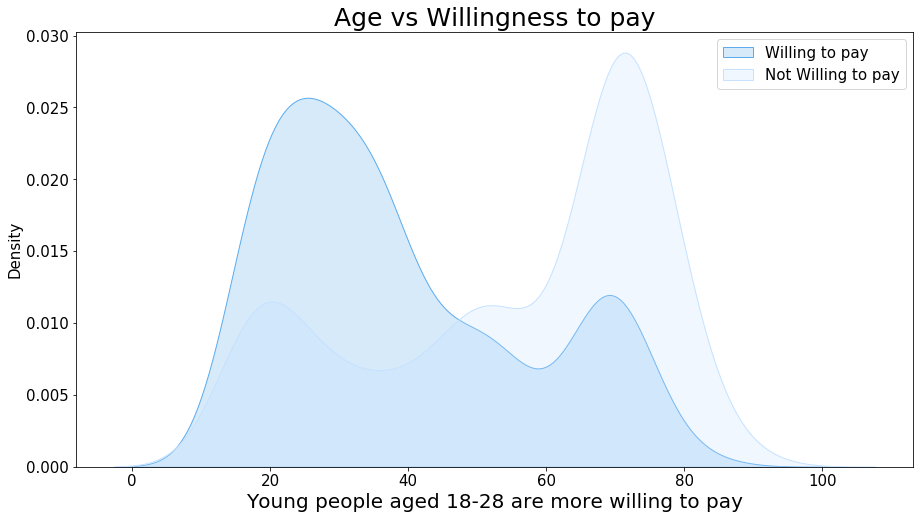

In [124]:
sns.kdeplot(internet_df['Q1r1 - To begin, what is your age?'].astype(float)[internet_df.iloc[:,116,] == 1], color="#5CACEE", shade=True)
sns.kdeplot(internet_df['Q1r1 - To begin, what is your age?'].astype(float)[internet_df.iloc[:,116,] == 0], color="#C6E2FF", shade=True)
plt.legend(['Willing to pay', 'Not Willing to pay'])
plt.gcf().set_size_inches(15,8)
plt.title('Age vs Willingness to pay', fontsize=25)
plt.xlabel('Young people aged 18-28 are more willing to pay', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

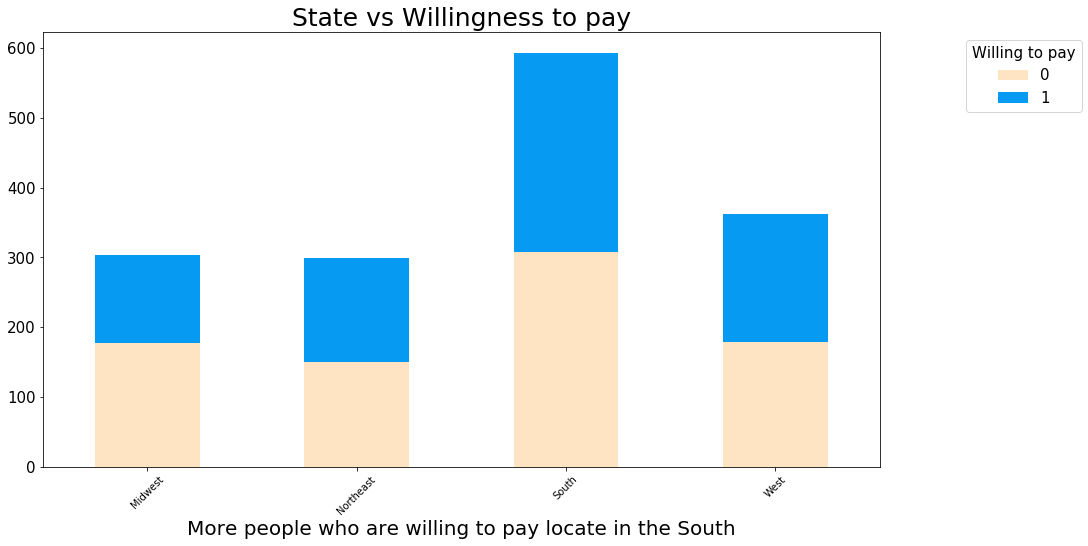

In [125]:
plot_bar(internet_df, 'region - Region', internet_df.iloc[:,116,],["#FFE4C4","#069AF3"],True)
plt.legend(title='Willing to pay',loc='upper right',bbox_to_anchor=(1.25, 1))
plt.gcf().set_size_inches(15,8)
plt.xticks(rotation=45)
plt.title('State vs Willingness to pay', fontsize=25)
plt.xlabel('More people who are willing to pay locate in the South', fontsize=20)
plt.xticks(fontsize=10)
plt.show()

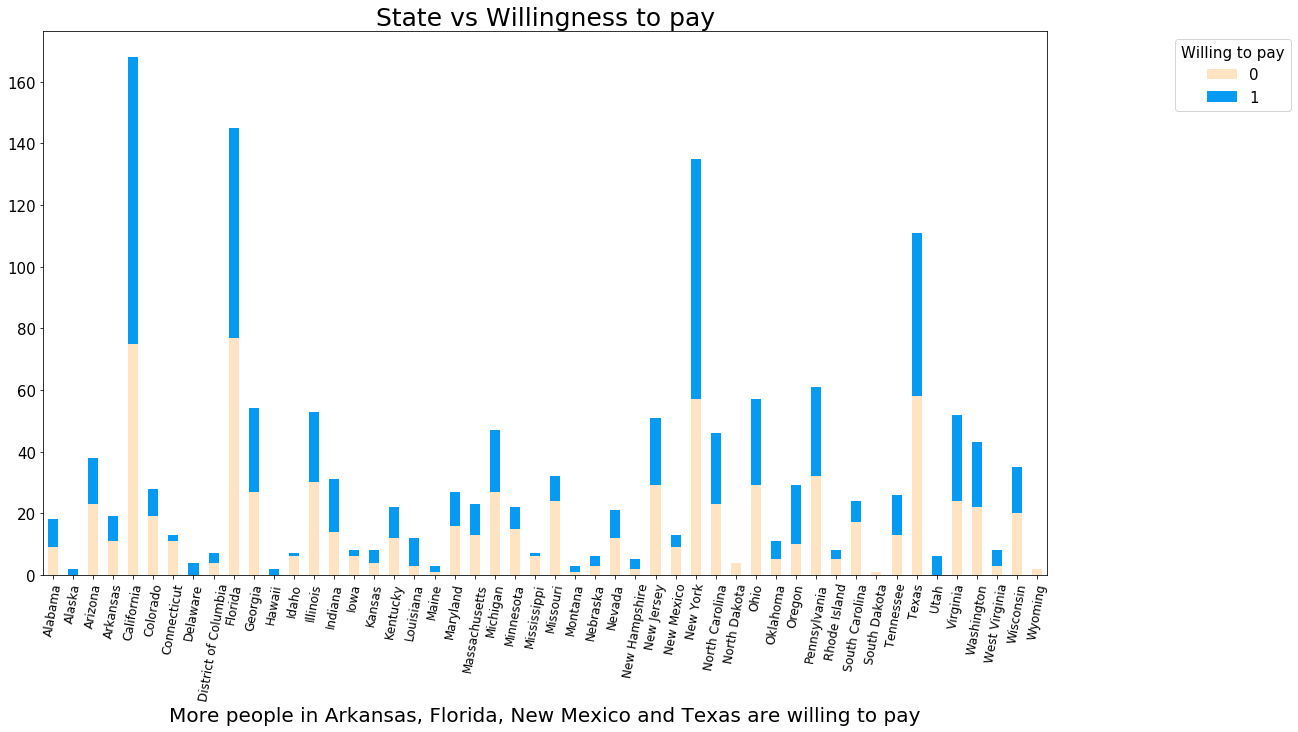

In [126]:
plot_bar(internet_df, 'Q2 - In which state do you currently reside?', internet_df.iloc[:,116,],["#FFE4C4","#069AF3"],True)
plt.legend(title='Willing to pay',loc='upper right',bbox_to_anchor=(1.25, 1))
plt.gcf().set_size_inches(18,10)
plt.xticks(rotation=80)
plt.title('State vs Willingness to pay', fontsize=25)
plt.xlabel('More people in Arkansas, Florida, New Mexico and Texas are willing to pay', fontsize=20)
plt.xticks(fontsize=12)
plt.show()

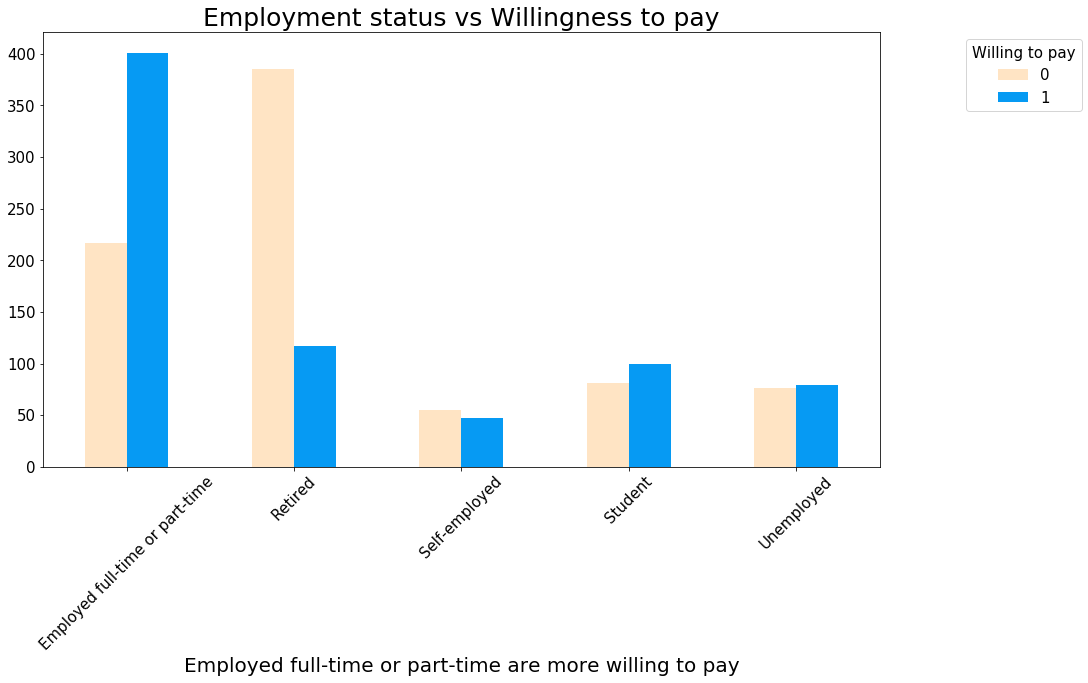

In [127]:
plot_bar(internet_df, 'QNEW3 - What is your employment status?', internet_df.iloc[:,116,],["#FFE4C4","#069AF3"],False)
plt.legend(title='Willing to pay',loc='upper right',bbox_to_anchor=(1.25, 1))
plt.gcf().set_size_inches(15,8)
plt.xticks(rotation=45)
plt.title('Employment status vs Willingness to pay', fontsize=25)
plt.xlabel('Employed full-time or part-time are more willing to pay', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

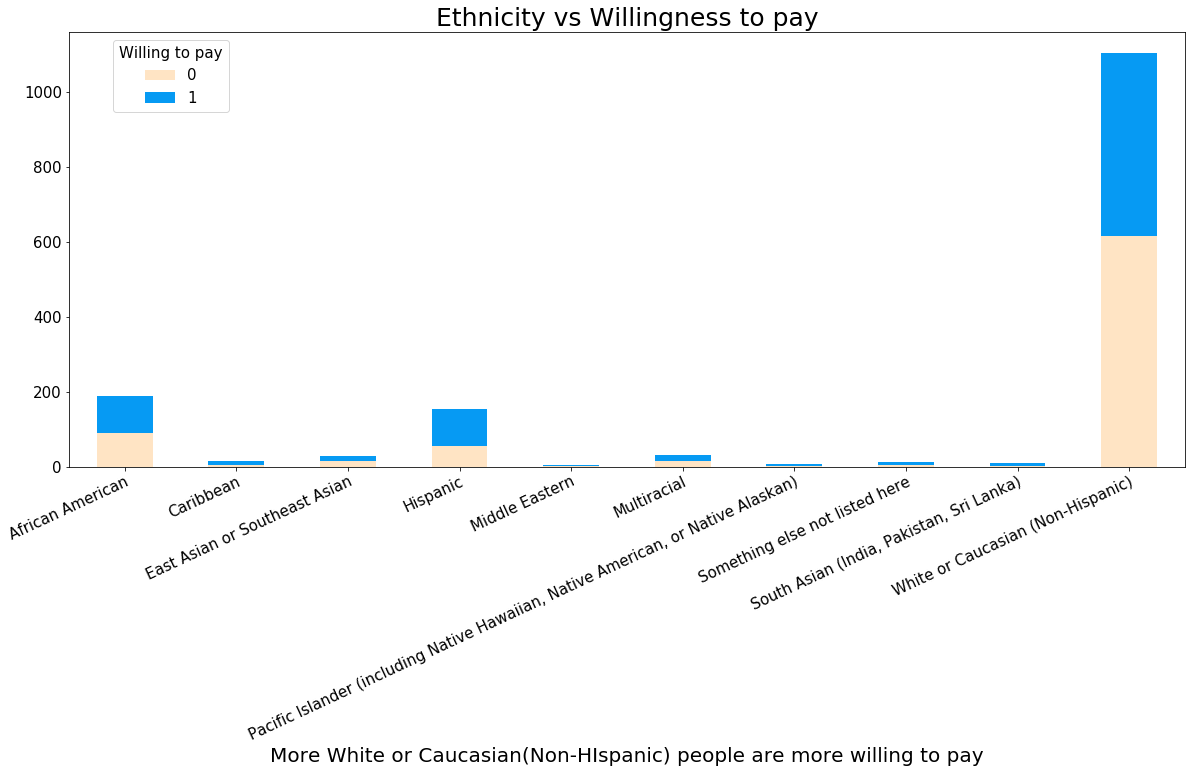

In [128]:
internet_df['Q5 - Which category best describes your ethnicity?'].unique()

plot_bar(internet_df, 'Q5 - Which category best describes your ethnicity?', internet_df.iloc[:,116,],["#FFE4C4","#069AF3"],True)
plt.legend(title='Willing to pay',loc='upper right',bbox_to_anchor=(0.15,1))
plt.gcf().set_size_inches(20,8)
plt.xticks(rotation=25, fontsize=15, ha='right', wrap=True)
plt.title('Ethnicity vs Willingness to pay', fontsize=25)
plt.xlabel('More White or Caucasian(Non-HIspanic) people are more willing to pay', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

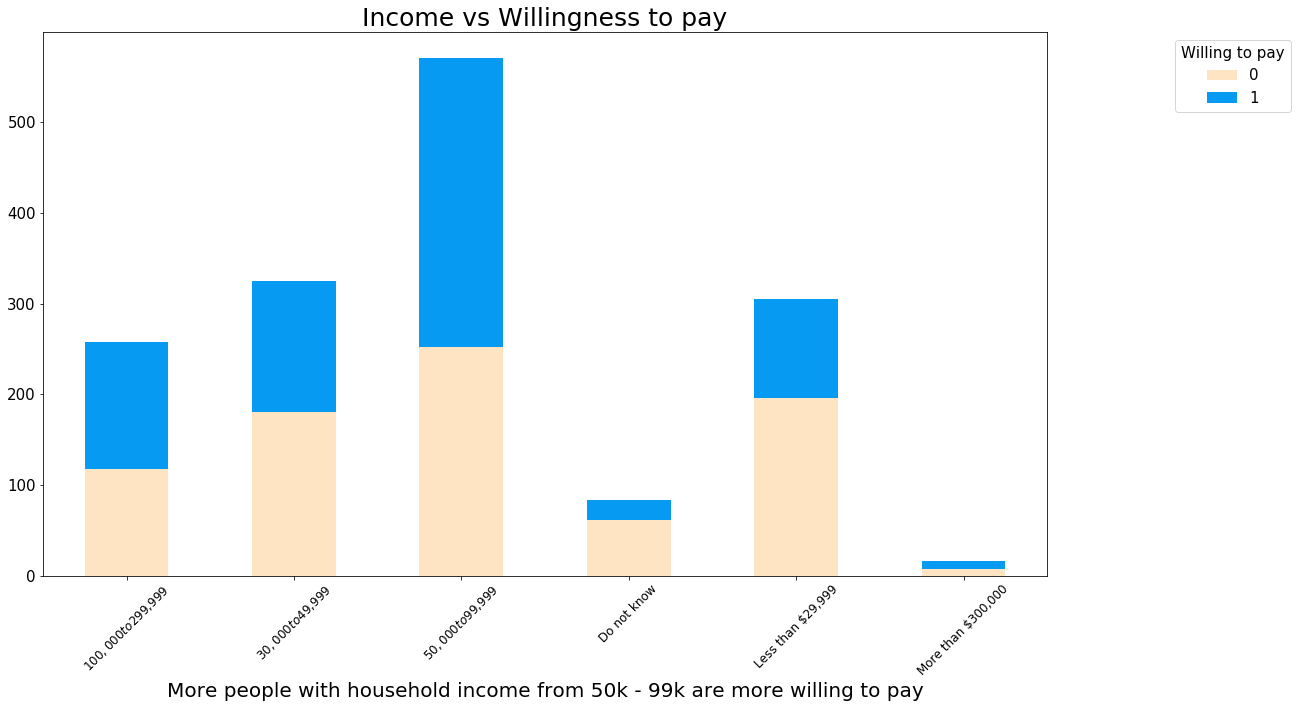

In [129]:
plot_bar(internet_df, 'Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.', internet_df.iloc[:,116,],["#FFE4C4","#069AF3"],True)
plt.legend(title='Willing to pay',loc='upper right',bbox_to_anchor=(1.25, 1))
plt.gcf().set_size_inches(18,10)
plt.xticks(rotation=45)
plt.title('Income vs Willingness to pay', fontsize=25)
plt.xlabel('More people with household income from 50k - 99k are more willing to pay', fontsize=20)
plt.xticks(fontsize=12)
plt.show()

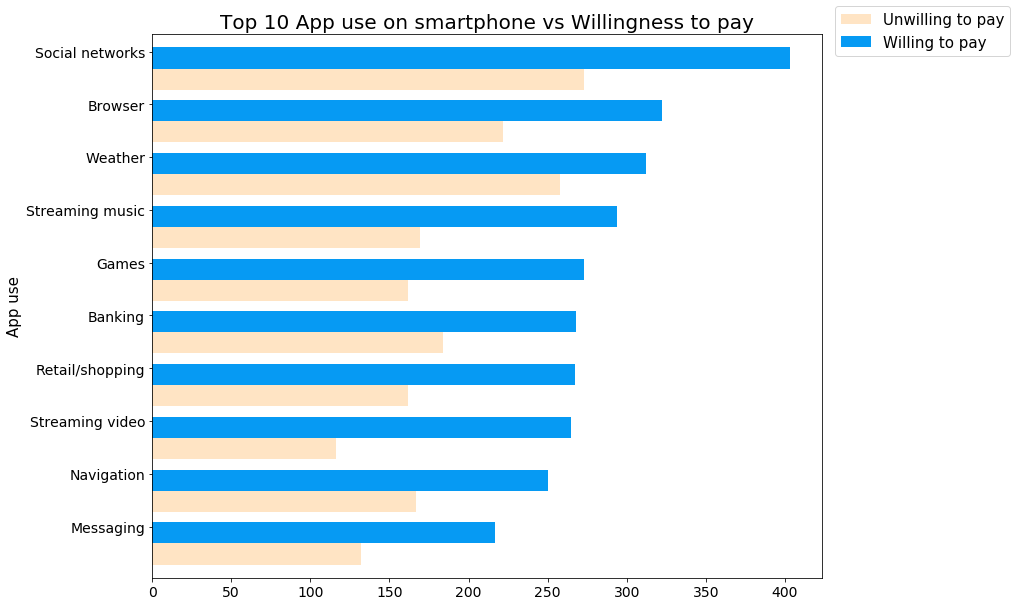

In [130]:
Q22_df = internet_df.iloc[:,65:102]

# renaming the columns
Q22_df.rename(columns=lambda x: x.replace('Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-', ''), inplace=True)

Q22_Q29_df = pd.concat([Q22_df,internet_df.iloc[:,116,]], axis = 1)

# filter out the rows with target variable = 1
df_Q22_Q29_1 = Q22_Q29_df[Q22_Q29_df.iloc[:,-1] == 1]

# checking each row of the data frame by column for rows with target variable = 1
freq_dict1 = {}
for i in range(37):
    freq_dict1[df_Q22_Q29_1.columns[i]] = 0
    for j in range(744):
        if df_Q22_Q29_1.iloc[j, i] == 'Yes':
            freq_dict1[df_Q22_Q29_1.columns[i]] += 1

# creating the dataframe
df_Q22_1 = pd.DataFrame(list(freq_dict1.items()), columns=['App use', 'Willing to pay'])



# filtering out the rows with target variable = 0
df_Q22_Q29_0 = Q22_Q29_df[Q22_Q29_df.iloc[:,-1] == 0]

# checking each row of the data frame by column for rows with target variable = 0
freq_dict0 = {}
for i in range(37):
    freq_dict0[df_Q22_Q29_0.columns[i]] = 0
    for j in range(814):
        if df_Q22_Q29_0.iloc[j, i] == 'Yes':
            freq_dict0[df_Q22_Q29_0.columns[i]] += 1

# creating the dataframe
df_Q22_0 = pd.DataFrame(list(freq_dict0.items()), columns=['App use1', 'Unwilling to pay'])

# concatenate the two data frames
df_union = pd.concat([df_Q22_1,df_Q22_0], axis = 1)

# drop duplicated column
df_union = df_union.drop('App use1', axis=1)

# drop rows that don't add much value: "don't know" and "I do not use ..." as app use categories
df_union = df_union[~df_union['App use'].isin(['I do not use any of the above types of apps on a frequent (everyday/weekly) basis.', 'Don\'t Know'])]

# sorting the data frame
df_union.sort_values(by='Willing to pay', ascending=False, inplace=True)

# plotting the bar chart
df_sorted = df_union.head(10)
df_sorted.sort_values(by='Willing to pay', ascending=True, inplace=True)

df_sorted.plot.barh(x='App use', y=['Unwilling to pay','Willing to pay'], rot=0,fontsize=14, color=["#FFE4C4","#069AF3"]
                   , figsize=(12,10), width=0.8, position=0.9)

# setting title and x label
plt.title('Top 10 App use on smartphone vs Willingness to pay',fontsize=20)


# adjusting the position of the legend
plt.legend(loc=(1.02, 0.96))

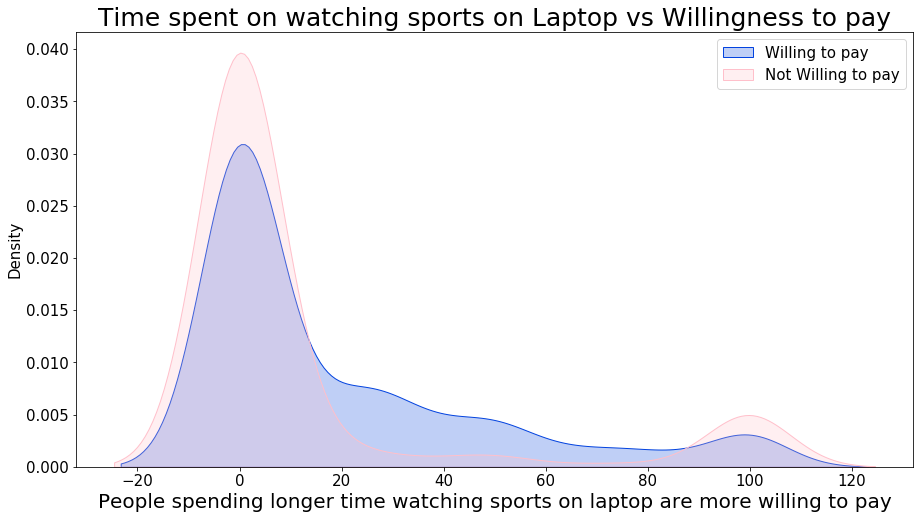

In [131]:
sns.kdeplot(internet_df['Q16r3 - Laptop/Desktop - Of the time you spend watching sports, what percentage of time do you watch on the following devices?'].astype(float)[internet_df.iloc[:,116,] == 1], color="#0343DF", shade=True)
sns.kdeplot(internet_df['Q16r3 - Laptop/Desktop - Of the time you spend watching sports, what percentage of time do you watch on the following devices?'].astype(float)[internet_df.iloc[:,116,] == 0], color="#FFC0CB", shade=True)
plt.legend(['Willing to pay', 'Not Willing to pay'])
plt.gcf().set_size_inches(15,8)
plt.title('Time spent on watching sports on Laptop vs Willingness to pay', fontsize=25)
plt.xlabel('People spending longer time watching sports on laptop are more willing to pay', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

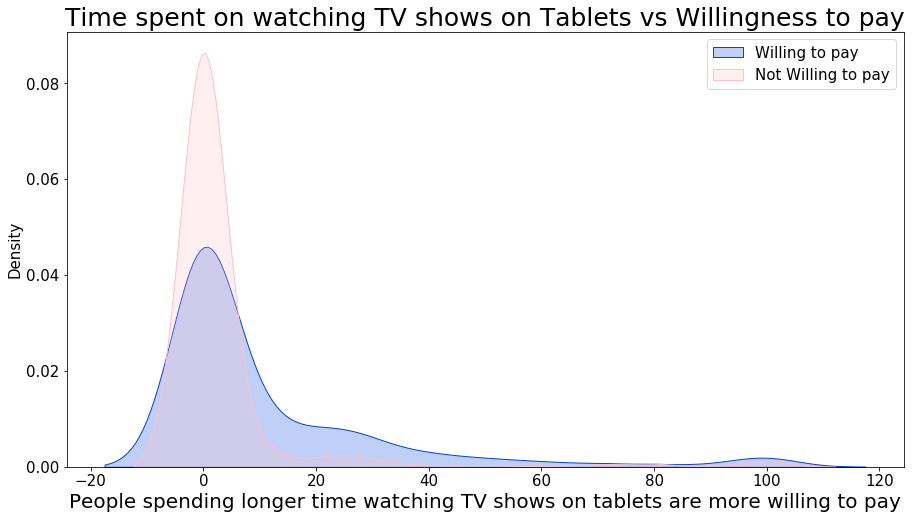

In [132]:
sns.kdeplot(internet_df['Q17r2 - Tablet - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?'].astype(float)[internet_df.iloc[:,116,] == 1], color="#0343DF", shade=True)
sns.kdeplot(internet_df['Q17r2 - Tablet - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?'].astype(float)[internet_df.iloc[:,116,] == 0], color="#FFC0CB", shade=True)
plt.legend(['Willing to pay', 'Not Willing to pay'])
plt.gcf().set_size_inches(15,8)
plt.title('Time spent on watching TV shows on Tablets vs Willingness to pay', fontsize=25)
plt.xlabel('People spending longer time watching TV shows on tablets are more willing to pay', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

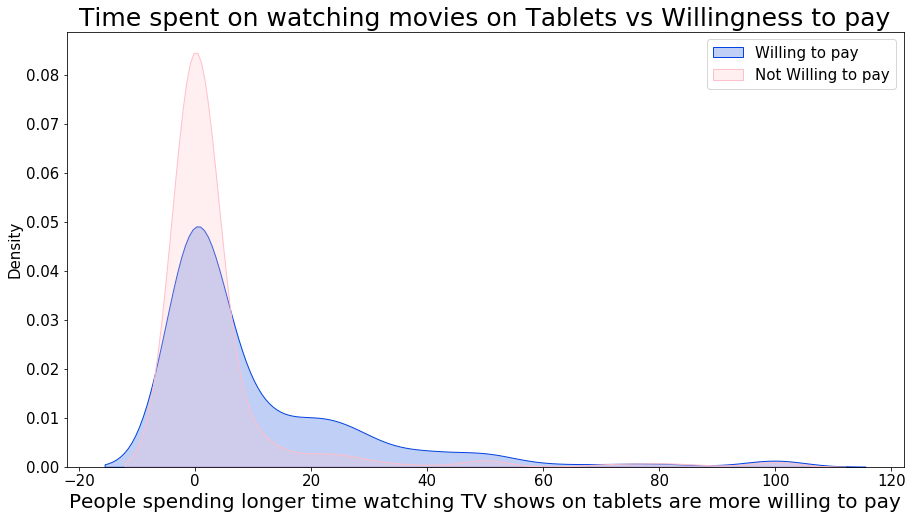

In [133]:
sns.kdeplot(internet_df['Q15r2 - Tablet - Of the time you spend watching movies, what percentage of time do you watch on the following devices?'].astype(float)[internet_df.iloc[:,116,] == 1], color="#0343DF", shade=True)
sns.kdeplot(internet_df['Q15r2 - Tablet - Of the time you spend watching movies, what percentage of time do you watch on the following devices?'].astype(float)[internet_df.iloc[:,116,] == 0], color="#FFC0CB", shade=True)
plt.legend(['Willing to pay', 'Not Willing to pay'])
plt.gcf().set_size_inches(15,8)
plt.title('Time spent on watching movies on Tablets vs Willingness to pay', fontsize=25)
plt.xlabel('People spending longer time watching TV shows on tablets are more willing to pay', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

In [134]:
# replacing Yes with 1 and No with 0
internet_df.replace({'Yes':1,'No':0},inplace=True)
internet_df.head()

Q1r1 - To begin, what is your age? Q4 - What is your gender?  \
1                                 26.0                    Female   
3                                 25.0                    Female   
4                                 28.0                      Male   
9                                 16.0                    Female   
10                                32.0                    Female   

   age - you are... Q2 - In which state do you currently reside?  \
1             20-26                                     New York   
3             20-26                                   California   
4             27-33                                      Indiana   
9             14-19                                  Connecticut   
10            27-33                                     New York   

   region - Region QNEW3 - What is your employment status?  \
1        Northeast         Employed full-time or part-time   
3             West         Employed full-time or part-time   
4          Midwest                                 Student   
9        Northeast                                 Student   
10       Northeast         Employed full-time or part-time   

   Q5 - Which category best describes your ethnicity?  \
1                   White or Caucasian (Non-Hispanic)   
3                   White or Caucasian (Non-Hispanic)   
4                   White or Caucasian (Non-Hispanic)   
9                   White or Caucasian (Non-Hispanic)   
10                  White or Caucasian (Non-Hispanic)   

    QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?  \
1                                                   1                                            
3                                                   1                                            
4                                                   1                                            
9                                                   1                                            
10                                                  1                                            

   Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.  \
1                                  $50,000 to $99,999                                                                                                                                      
3                                   Less than $29,999                                                                                                                                      
4                                  $50,000 to $99,999                                                                                                                                      
9                                $100,000 to $299,999                                                                                                                                      
10                                 $50,000 to $99,999                                                                                                                                      

    Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television  \
1                                                   0                                                                  
3                                                   1                                                                  
4                                                   1                                                                  
9                                                   1                                                                  
10                                                  0                                                                  

    ...  \
1   ...   
3   ...  

In [135]:
# creating a new DataFrame with one-hot encoded columns
one_hot_cols = list(pd.concat([internet_df.iloc[:,1:7],internet_df.iloc[:,8,],internet_df.iloc[:,119:130,],internet_df.iloc[:,131:,]],axis=1).columns)
one_hot_df = pd.get_dummies(internet_df[one_hot_cols])

# combining the original DataFrame with the one-hot encoded DataFrame
new_df = pd.concat([internet_df, one_hot_df], axis=1)

# dropping the original columns that were one-hot encoded
new_df.drop(columns=one_hot_cols, inplace=True)

new_df.head()


Q1r1 - To begin, what is your age?  \
1                                 26.0   
3                                 25.0   
4                                 28.0   
9                                 16.0   
10                                32.0   

    QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?  \
1                                                   1                                            
3                                                   1                                            
4                                                   1                                            
9                                                   1                                            
10                                                  1                                            

    Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television  \
1                                                   0                                                                  
3                                                   1                                                                  
4                                                   1                                                                  
9                                                   1                                                                  
10                                                  0                                                                  

    Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR)  \
1                                                   0                                                                         
3                                                   1                                                                         
4                                                   0                                                                         
9                                                   0                                                                         
10                                                  0                                                                         

    Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box  \
1                                                   0                                                                                    
3                                                   0                                                                                    
4                                                   1                                                                                    
9                                                   0                                                                                    
10                                                  0                                                                                    

    Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob  \
1                                                   1                                                                               
3                                                   1                                                                               
4                                                   0                                                                               
9                                                   0                                                                               
10                                                  0                                                                               

    Q8 - Which of the following media or home ente

In [136]:
# saving the preprocessed data
new_df.to_csv("Preprocessed data.csv", index=None)

In [137]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

import warnings
warnings.filterwarnings("ignore")

# custom color palette
custom_colors = ["#c8e7ff","#deaaff", "#f72585","#d100d1"]

In [138]:
df = pd.read_csv('Preprocessed data.csv')
df

Q1r1 - To begin, what is your age?  \
0                                   26.0   
1                                   25.0   
2                                   28.0   
3                                   16.0   
4                                   32.0   
...                                  ...   
1553                                14.0   
1554                                70.0   
1555                                18.0   
1556                                79.0   
1557                                77.0   

      QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?  \
0                                                     1                                            
1                                                     1                                            
2                                                     1                                            
3                                                     1                                            
4                                                     1                                            
...                                                 ...                                            
1553                                                  1                                            
1554                                                  0                                            
1555                                                  0                                            
1556                                                  0                                            
1557                                                  0                                            

      Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television  \
0                                                     0                                                                  
1                                                     1                                                                  
2                                                     1                                                                  
3                                                     1                                                                  
4                                                     0                                                                  
...                                                 ...                                                                  
1553                                                  1                                                                  
1554                                                  1                                                                  
1555                                                  1                                                                  
1556                                                  1                                                                  
1557                                                  0                                                                  

      Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR)  \
0                                                     0                                                                         
1                                                     1                                                                         
2                                                     0                                                                         
3                                                     0                                                                         
4                                                     0                                                                         
...                                  

# MODELING

Supervised Learning: For understanding the reasons behind customers' interest

In [139]:
target_col = 'Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?'

# dropping a column that is extremely correlated with the target column
df.drop(columns="Q26 - Which of the following subscriptions does your household purchase?-Home internet", inplace=True)

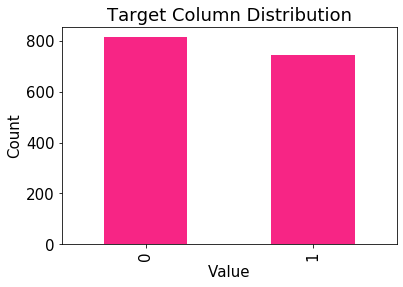

In [140]:
# counting the number of occurrences of each unique value in the target column
counts = df[target_col].value_counts()

# creating a bar plot of the counts
counts.plot(kind='bar', color= custom_colors[2])

# setting the plot title and axis labels
plt.title('Target Column Distribution')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [141]:
# training models
def train_model(X, y, model):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    train_accs = []
    test_accs = []
    predicted_targets = np.array([])
    actual_targets = np.array([])

    for fold, (train_index, test_index) in enumerate(kfold.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        train_acc = accuracy_score(y_train, train_predictions)
        test_acc = accuracy_score(y_test, test_predictions)

        train_accs.append(train_acc)
        test_accs.append(test_acc)

        predicted_targets = np.append(predicted_targets, test_predictions)
        actual_targets = np.append(actual_targets, y_test)

    return train_accs, test_accs, predicted_targets, actual_targets

X = df.drop(target_col, axis=1)
y = df[target_col]

# models to experiment with
models = [
    ("Naive Bayes", GaussianNB()),
    ("Logistic Regression", LogisticRegression()),
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Bagging Decision Tree", BaggingClassifier(base_estimator=DecisionTreeClassifier())),
    ("Boosted Decision Tree", AdaBoostClassifier(base_estimator=DecisionTreeClassifier())),
    ("Random Forest", RandomForestClassifier()),
    ("Voting Classification", VotingClassifier(estimators=[('lr', LogisticRegression()), ('knn', KNeighborsClassifier()), ('svc', SVC()), ('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier())])),
    ("Neural Network", MLPClassifier())
]

for name, model in models:

    train_accs, test_accs, predicted_targets, actual_targets = train_model(X, y, model)

    # calculating the average accuracy over all folds for each model
    train_avg_acc = np.mean(train_accs)
    test_avg_acc = np.mean(test_accs)

    print("\n" + name +  " Accuracy (Train) across all folds: ", train_avg_acc)
    print( name +  " Accuracy (Test) across all folds: ", test_avg_acc)


Naive Bayes Accuracy (Train) across all folds:  0.7439036351770734
Naive Bayes Accuracy (Test) across all folds:  0.7195461291120455

Logistic Regression Accuracy (Train) across all folds:  0.7044298933813543
Logistic Regression Accuracy (Test) across all folds:  0.6887171242476708

KNN Accuracy (Train) across all folds:  0.7865854616086634
KNN Accuracy (Test) across all folds:  0.7002597081375216

SVM Accuracy (Train) across all folds:  0.5738149085896038
SVM Accuracy (Test) across all folds:  0.5738498639624041

Decision Tree Accuracy (Train) across all folds:  1.0
Decision Tree Accuracy (Test) across all folds:  0.6579004864374639

Bagging Decision Tree Accuracy (Train) across all folds:  0.9837937856634413
Bagging Decision Tree Accuracy (Test) across all folds:  0.70797468876247

Boosted Decision Tree Accuracy (Train) across all folds:  1.0
Boosted Decision Tree Accuracy (Test) across all folds:  0.6700737900898672

Random Forest Accuracy (Train) across all folds:  1.0
Random Fore

# MODEL EVALUATION & EVALUATION

NOTE: After evaluating the accuracy of models on both the training and validation sets, it became apparent that many of the models were overfitting. Therefore, we decided to proceed with further analysis using Logistic Regression.

Precision:  0.6924219910846954
Recall:  0.6263440860215054
F1 score:  0.6577275935074101


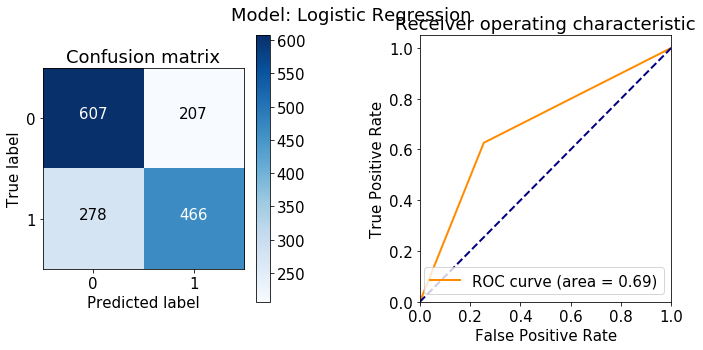

In [142]:
class_names = [0, 1]
train_accs, test_accs, predicted_targets, actual_targets  = train_model(X, y, models[1][1])
cm = confusion_matrix(actual_targets, predicted_targets)

classes = [0,1]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# plotting confusion matrix
im = ax[0].imshow(cm, cmap=plt.get_cmap('Blues'))
ax[0].set_title("Confusion matrix")
fig.colorbar(im, ax=ax[0])

tick_marks = np.arange(len(classes))
ax[0].set_xticks(tick_marks)
ax[0].set_xticklabels(classes)
ax[0].set_yticks(tick_marks)
ax[0].set_yticklabels(classes)
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')

fmt = 'd'
thresh = cm.max() / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    ax[0].text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

# calculating precision, recall, and F1 score, AUC-ROC score
precision = precision_score(actual_targets, predicted_targets)
recall = recall_score(actual_targets, predicted_targets)
f1 = f1_score(actual_targets, predicted_targets)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

# plotting ROC curve
fpr, tpr, _ = roc_curve(actual_targets, predicted_targets)
roc_auc = auc(fpr, tpr)

ax[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver operating characteristic')
ax[1].legend(loc="lower right")

plt.suptitle("Model: Logistic Regression")
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

NOTE:

An ROC area of 0.69 can be considered relatively good or acceptable, since it represents a significant improvement over random guessing (ROC area of 0.5).

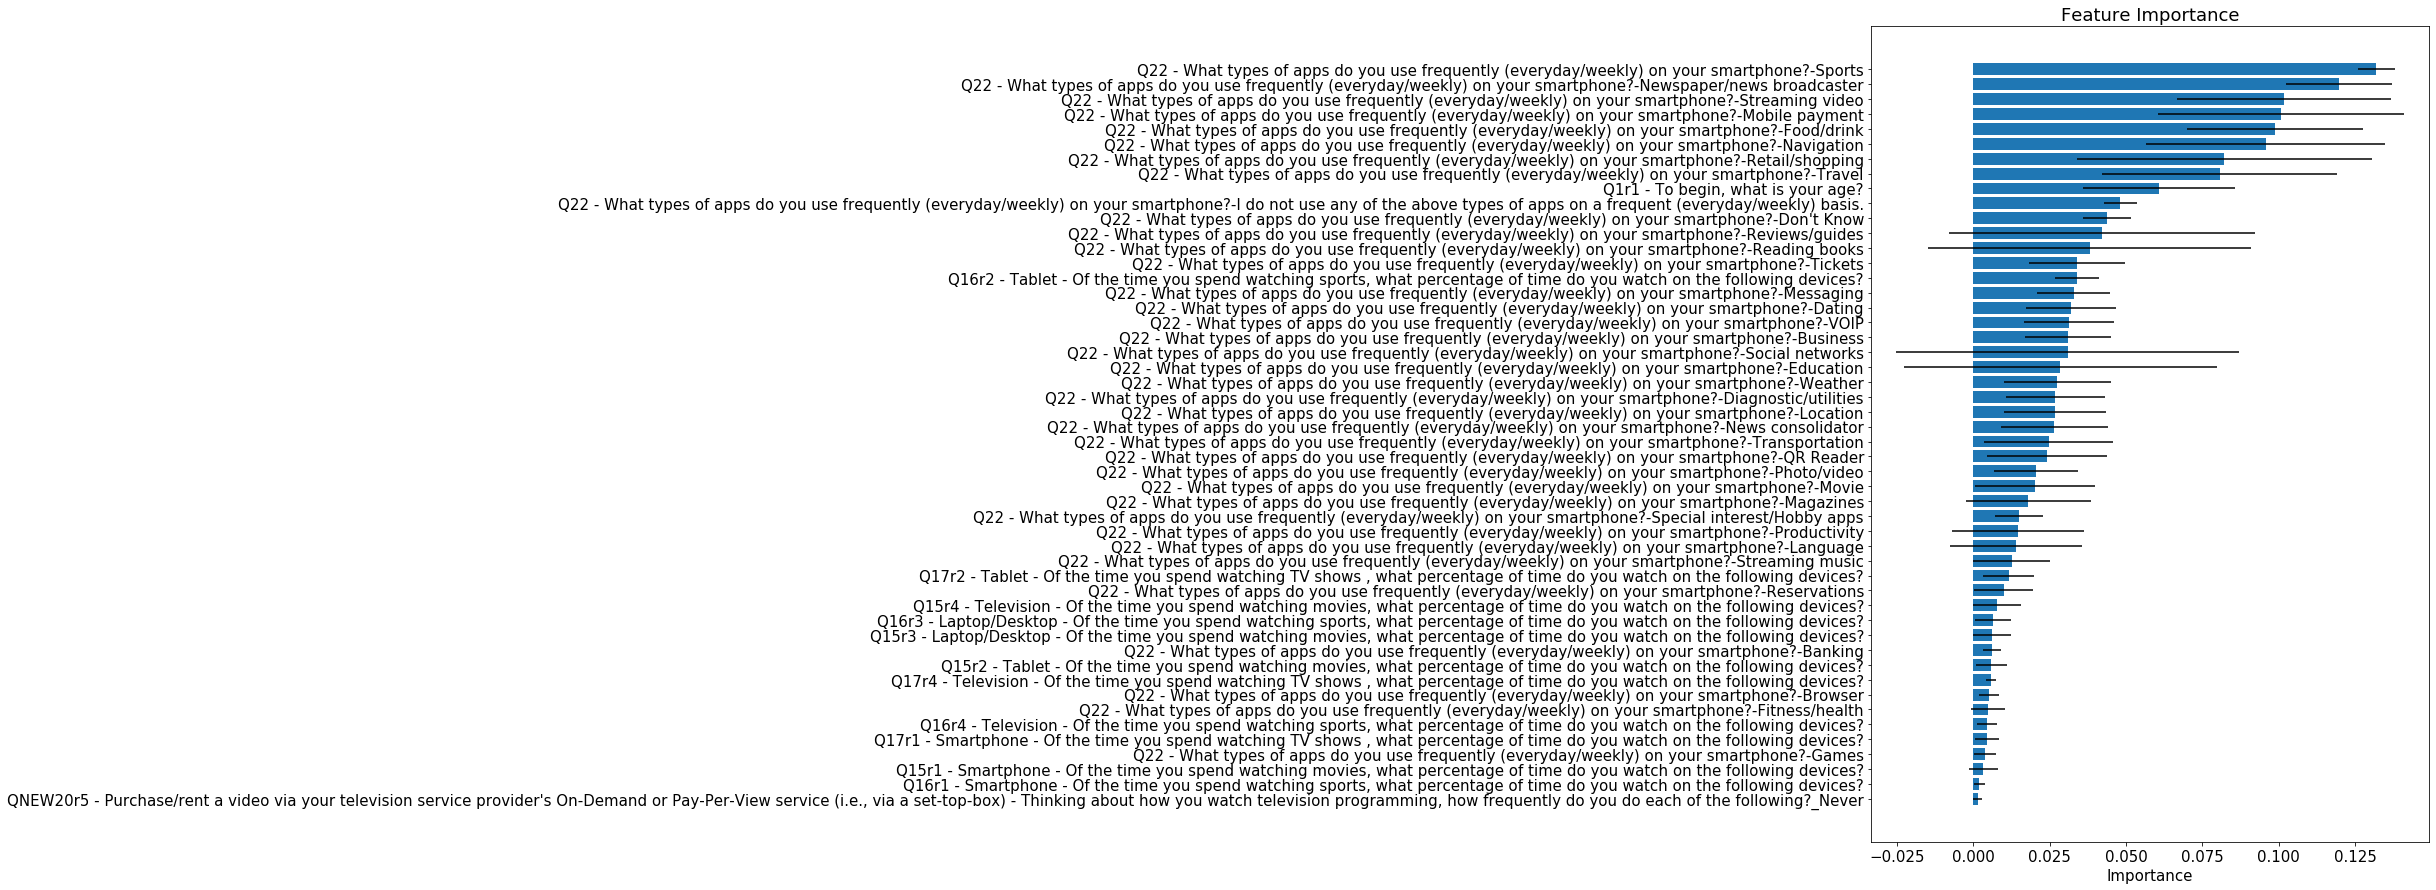

In [143]:
# creating a logistic regression model
lr = LogisticRegression()

# performing k-fold cross-validation with permutation feature importance
cv_results = cross_validate(lr, X, y, cv=5, scoring='accuracy',
                            return_estimator=True, return_train_score=True)

# computing permutation feature importance for each fold
importance_scores = []
for estimator in cv_results['estimator']:
    result = permutation_importance(estimator, X, y, scoring='accuracy',
                                    n_repeats=10, random_state=0)
    importance_scores.append(result.importances_mean)

# aggregating feature importance scores across folds
mean_importance = np.mean(importance_scores, axis=0)
std_importance = np.std(importance_scores, axis=0)

# sorting features by mean importance score
feature_importance = sorted(zip(X.columns, mean_importance, std_importance),
                            key=lambda x: x[1], reverse=True)

# getting feature names and importance scores
features = [f[0] for f in feature_importance[:50]]
importance = [f[1] for f in feature_importance[:50]]
std = [f[2] for f in feature_importance[:50]]

# plotting feature importance as a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,15))
ax.barh(features, importance, xerr=std, align='center')
ax.set_xlabel('Importance')
ax.set_title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

FINAL ANALYSIS:

It appears that the category of frequently used apps and age are two significant factors that influence customers' willingness to pay for higher internet speeds.

# Unsupervised Learning: For identifying patterns in customer demand

Analyzing the subset of customers who are willing to pay for higher internet speeds can provide valuable insights into the key factors that influence customer behavior in this context.

By focusing on this specific group, we can obtain a more targeted understanding of the characteristics and preferences of customers.

This information can be used to inform marketing strategies, as well as to develop targeted product offerings and customer support efforts.

In [144]:
df = df[df != -999].dropna()

# selecting only those customers that are willing to pay
df = df[df[target_col] == 1]

# K-Means
For clustering the data, we implemented K-means algorithm because of its:

Simplicity and speed: K-Means is a simple and computationally efficient algorithm, making it a popular choice for clustering large datasets. The algorithm has a linear time complexity, which means that it can handle datasets with a large number of features or data points.

Interpretable results: K-Means produces clusters that are easy to interpret and can be visualized in two or three dimensions. This makes it possible to understand the structure of the data and identify patterns or anomalies.

# Dimensionality Reduction using PCA
We chose to perform PCA in order to reduce dimensions of the data and make it suitable for clustering.

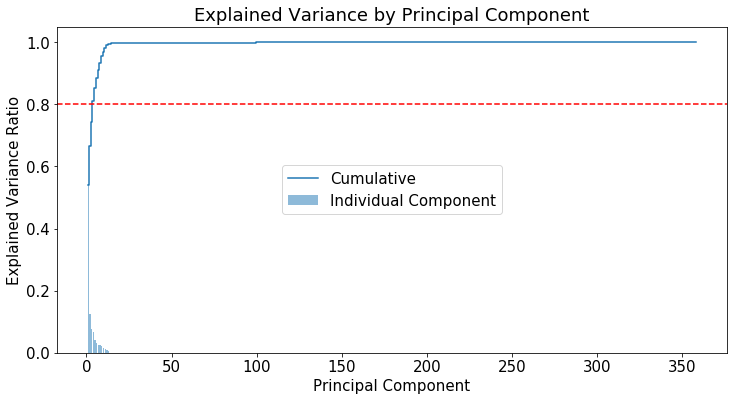

In [145]:
# performing PCA to find optimal number of components 
pca = PCA()
pca.fit(df)

# plotting the explained variance
plt.figure(figsize=(12,6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual Component')
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.legend(loc='center')
plt.title('Explained Variance by Principal Component')
plt.show()


In [146]:
# performing PCA with number of components specified
pca = PCA(n_components=4)
pca.fit(df)
pca_scores = pca.transform(df)

For n_clusters =  2 , the average silhouette_score is:  0.4564126707747319


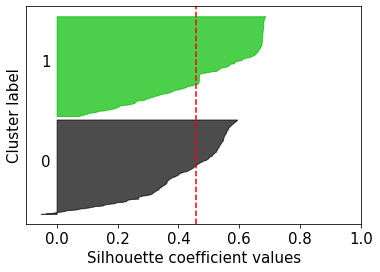

For n_clusters =  3 , the average silhouette_score is:  0.38620356191482275


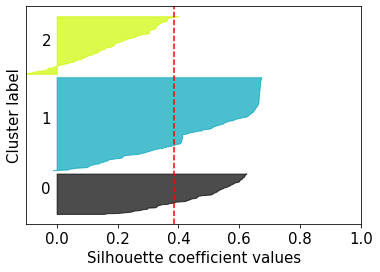

For n_clusters =  4 , the average silhouette_score is:  0.3798986235103309


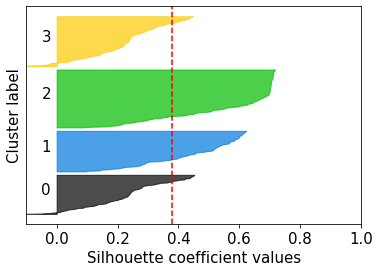

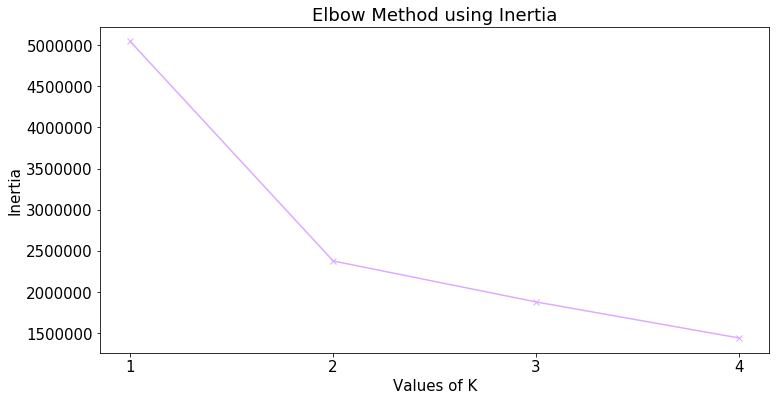

In [147]:
inertias = [] 

for n_clusters in range(1, 5):

    # elbow method
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state= 42)
    kmeans.fit(pca_scores)
    labels = kmeans.labels_ 
    inertias.append(kmeans.inertia_) 

    # silhouette analysis
    if n_clusters!=1:
        # calculating the overall silhouette score
        silhouette_avg = silhouette_score(pca_scores, kmeans.labels_)

        print(
        "For n_clusters = ",
        n_clusters,
        ", the average silhouette_score is: ",
        silhouette_avg)

        # calculating the silhouette scores for each data point
        sample_silhouette_values = silhouette_samples(pca_scores, kmeans.labels_)

        # plotting the silhouette scores as a horizontal bar chart
        fig, ax = plt.subplots()
        y_lower = 10
        for i in range(n_clusters):
            # aggregating the silhouette scores for samples belonging to cluster i
            ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]

            # sorting the silhouette scores for the samples in this cluster
            ith_cluster_silhouette_values.sort()

            # computing the size of the cluster and set the upper y coordinate for this cluster's silhouette plot
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            # creating the color map for the cluster
            color = plt.cm.nipy_spectral(float(i) / n_clusters)

            # plotting the silhouette scores for the samples in this cluster
            ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

            # labelling the silhouette plot with the cluster number
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # computing the new y_lower for the next plot
            y_lower = y_upper + 10

        # setting the plot parameters
        ax.set_xlabel("Silhouette coefficient values")
        ax.set_ylabel("Cluster label")
        ax.axvline(x=silhouette_avg, color="red", linestyle="--")

        # clearing the yaxis labels / ticks
        ax.set_yticks([])  

        ax.set_xlim([-0.1, 1])

        plt.show()

# plotting Elbow method using Inertia
plt.figure(figsize=(12,6))
plt.plot(range(1, 5), inertias, 'bx-',color=custom_colors[1]) 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.xticks(range(1, 5))
plt.title('Elbow Method using Inertia') 
plt.show() 

Silhouette analysis: Silhouette analysis is a technique used to measure how well each data point fits into its assigned cluster. The optimal number of clusters is the one that maximizes the global silhouette score. In this case it is 2.

Elbow method: The elbow method is a technique used to determine the optimal number of clusters by looking at the within-cluster sum of squares, also known as inertia, for different values of k. The elbow point represents the optimal number of clusters. In this case it is 2.

Thus as per the results of both Silhouette Analysis and Elbow method using inertia, the optimal value of k is 2.

K-means clustering with PCA result

In [149]:
# performing k-means with the number of clusters specified as 2
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state= 42)
kmeans.fit(pca_scores)
df['Cluster'] = kmeans.labels_

In [150]:
# combining all the relevant columns
df = pd.concat([df.reset_index(drop=True), pd.DataFrame(pca_scores, columns=[f"PCA{i}" for i in range(1, 5)])], axis=1)
df.head()

Q1r1 - To begin, what is your age?  \
0                                26.0   
1                                25.0   
2                                28.0   
3                                32.0   
4                                38.0   

   QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?  \
0                                                  1                                            
1                                                  1                                            
2                                                  1                                            
3                                                  1                                            
4                                                  1                                            

   Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television  \
0                                                  0                                                                  
1                                                  1                                                                  
2                                                  1                                                                  
3                                                  0                                                                  
4                                                  0                                                                  

   Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR)  \
0                                                  0                                                                         
1                                                  1                                                                         
2                                                  0                                                                         
3                                                  0                                                                         
4                                                  1                                                                         

   Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box  \
0                                                  0                                                                                    
1                                                  0                                                                                    
2                                                  1                                                                                    
3                                                  0                                                                                    
4                                                  0                                                                                    

   Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob  \
0                                                  1                                                                               
1                                                  1                                                                               
2                                                  0                                                                               
3                                                  0                                                                               
4                                                  0                                                                               

   Q8 - Which of the following media or home entertainment equipment does your househ

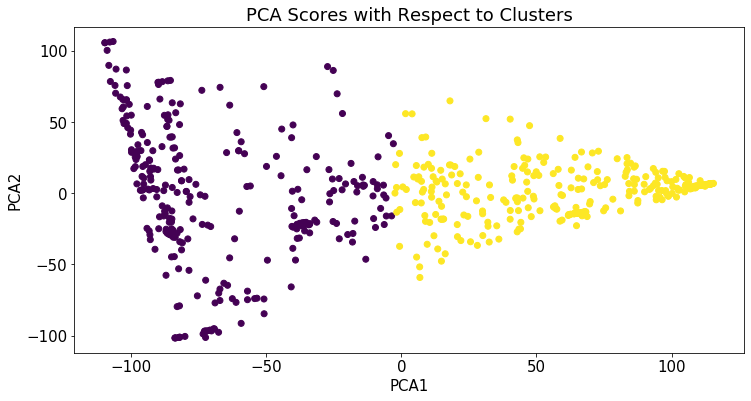

In [151]:
# plotting PCA Scores with Respect to Clusters
plt.figure(figsize=(12,6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'])
plt.title('PCA Scores with Respect to Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

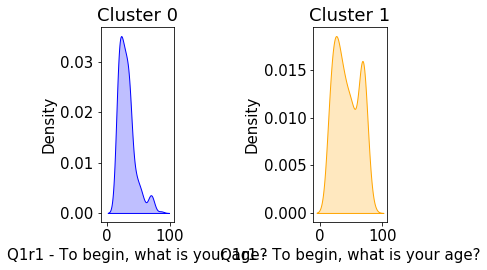

In [152]:
def plot_distribution(col): 
    # creating a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True)

    # plotting the KDE for cluster 0 on the left subplot
    sns.kdeplot(data=df[df['Cluster']==0], x=col, ax=ax1, color='blue', fill=True)

    # plotting the KDE for cluster 1 on the right subplot
    sns.kdeplot(data=df[df['Cluster']==1], x=col, ax=ax2, color='orange', fill=True)

    # setting the labels for the plots
    ax1.set_xlabel(col)
    ax2.set_xlabel(col)
    ax1.set_ylabel('Density')
    ax2.set_ylabel('Density')
    ax1.set_title('Cluster 0')
    ax2.set_title('Cluster 1')

    plt.tight_layout()
    plt.show()

plot_distribution('Q1r1 - To begin, what is your age?')

NOTE: We have mostly younger people in cluster 0 as opposed to cluster 1 which has a more distributed age range.

2.2.1.4 Inspecting the distinguishing factors between clusters
We used a Random Forest classifier trained on cluster labels to identify the distinguishing features between clusters.

This involved selecting the most informative features using the Random Forest algorithm and analyzing their importance scores for each cluster. By examining these features, we were able to gain insights into the key factors that differentiate the clusters and better understand their unique characteristics and behaviors.

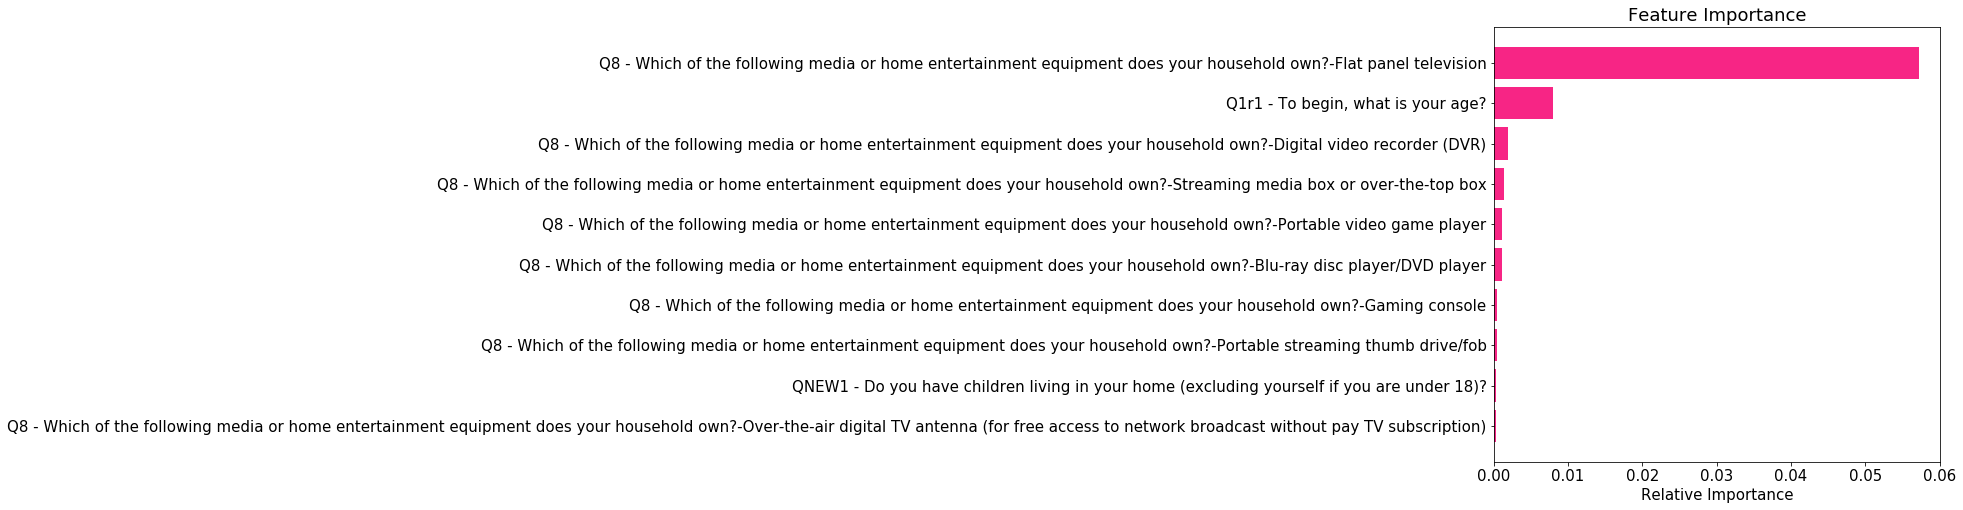

In [153]:
# train random forest classifier on cluster labels
clf = RandomForestClassifier(random_state=1)
X = df.drop('Cluster', axis=1)
y = df['Cluster']
clf.fit(X.values, y.values)

# plot feature importance
def feature_importance(model):
    plt.figure(figsize=(8,8))
    importances = model.feature_importances_[:10]
    indices = np.argsort(importances)[:10]
    features = X.columns
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importances[indices], color=custom_colors[2], align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

feature_importance(clf)

NOTE: Owning a certain media or home entertainment equipment and age seem to be the factors that distinguish clusters.

# Agglomerative Clustering
For clustering the data, we implemented Agglomerative clustering because of its:

Flexibility: Agglomerative clustering allows us to choose from a variety of linkage methods, which specify how to measure the distance between clusters. This makes the algorithm more flexible than K-Means, which uses a fixed distance metric.

No need to specify the number of clusters in advance: Unlike K-Means, which requires us to specify the number of clusters in advance, agglomerative clustering builds a hierarchy of clusters that can be cut at any level to obtain the desired number of clusters. This makes it easier to explore different clustering solutions and find the best fit for the data.

Ability to capture non-convex clusters Agglomerative clustering can capture non-convex clusters, which K-Means is not well-suited to handle. This makes it a good choice for datasets with complex or irregularly-shaped clusters.

In [154]:
df = df.drop('Cluster', axis=1)

 Using Dendrograms to Determine Optimal Number of Clusters

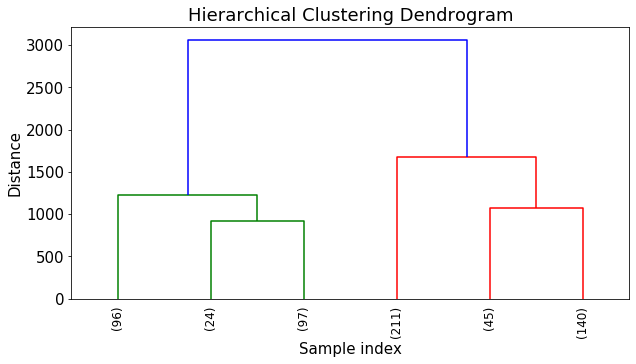

In [155]:
# performing hierarchical clustering using Ward linkage
Z = linkage(df, method='ward')

# plotting dendrogram with truncated branches
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dn = dendrogram(
    Z,
    truncate_mode='lastp',
    p=6,  # specify the number of clusters to display
    leaf_rotation=90.,
    leaf_font_size=12.,
)
plt.show()

Since the dendrogram has two clusters at the top, it means that the hierarchical clustering algorithm has grouped all the data points into two main clusters. Each of these clusters may further have sub-clusters, but at the highest level, the algorithm has identified two distinct groups within the data.

The distance between the two clusters at the top represents the dissimilarity between the two groups. The shorter the distance, the more similar the clusters are to each other. The height of the dendrogram also indicates the level of dissimilarity between the clusters. A taller dendrogram means that there is greater dissimilarity between the clusters, while a shorter dendrogram means that the clusters are more similar.

# Agglomerative Clustering

In [156]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)
df['Cluster'] = cluster.labels_

df['Cluster'].replace(1, 3, inplace=True)
df['Cluster'].replace(0, 4, inplace=True)
df['Cluster'].replace(3, 0, inplace=True)
df['Cluster'].replace(4, 1, inplace=True)

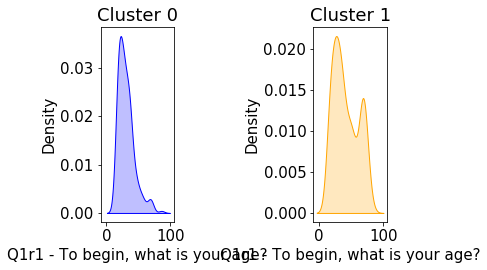

In [157]:
plot_distribution('Q1r1 - To begin, what is your age?')

NOTE: We have mostly younger people in cluster 0 as opposed to cluster 1 which has a more distributed age range.

We used a Random Forest classifier trained on cluster labels to identify the distinguishing features between clusters.

This involved selecting the most informative features using the Random Forest algorithm and analyzing their importance scores for each cluster. By examining these features, we were able to gain insights into the key factors that differentiate the clusters and better understand their unique characteristics and behaviors.

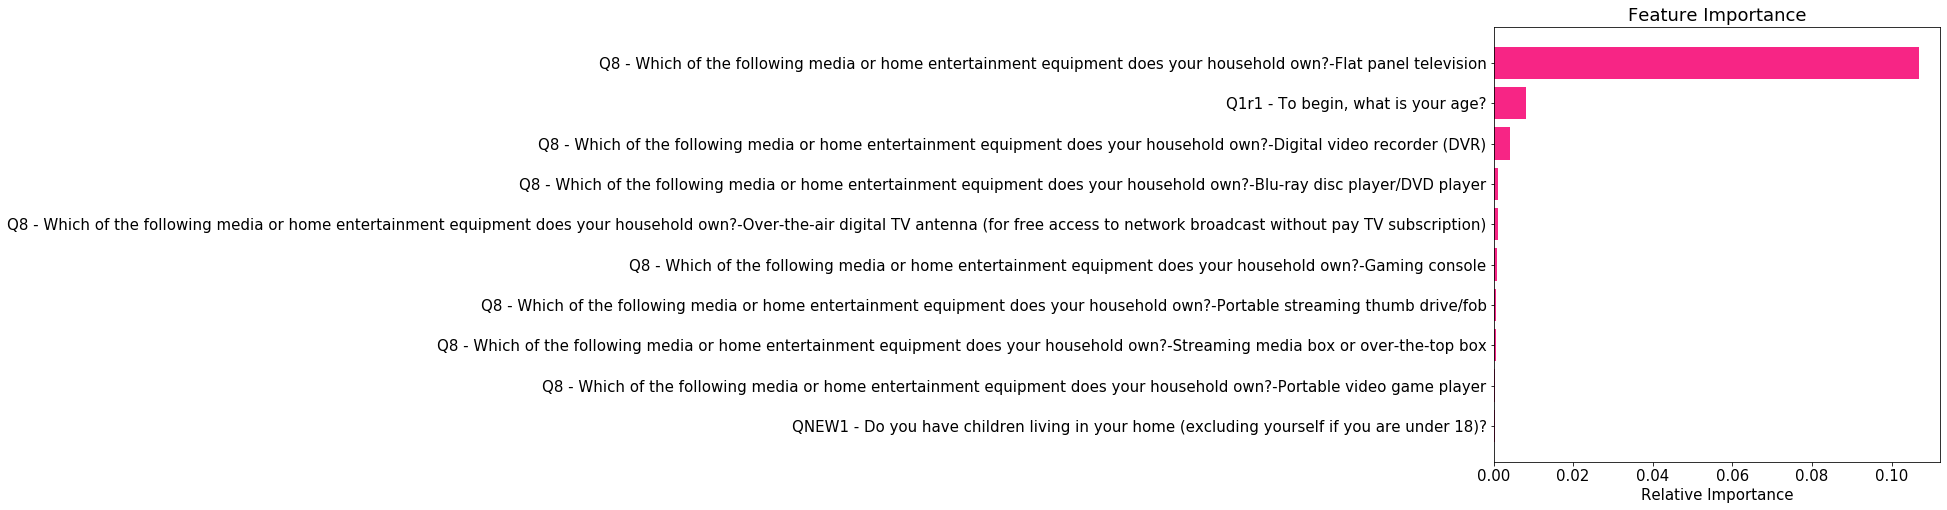

In [158]:
# train random forest classifier on cluster labels
clf = RandomForestClassifier(random_state=1)
X = df.drop('Cluster', axis=1)
y = df['Cluster']
clf.fit(X.values, y.values)

# plot feature importance
def feature_importance(model):
    plt.figure(figsize=(8,8))
    importances = model.feature_importances_[:10]
    indices = np.argsort(importances)[:10]
    features = X.columns
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importances[indices], color=custom_colors[2], align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

feature_importance(clf)

NOTE: Owning a certain media or home entertainment equipment and age seem to be the factors that distinguish clusters.

# FINAL ANALYSIS:

The fact that both K-means and Agglomerative clustering algorithms produced the same number of clusters and identified similar distinguishing columns for clusters indicates that the underlying structure of the data is well-defined and stable. This provides greater confidence in the results and suggests that the identified clusters are meaningful and robust.

The similarity in the distinguishing columns for each cluster provides insights into the segmentation of the customer base and can inform marketing and business strategies. We will be able to tailor our marketing campaigns based on the preferences and demographics of each cluster to improve customer engagement and satisfaction.